### Kelompok 4 - BUSDATA
- Edwin Juan Sugianto
- Nurul Azizah
- Vemby Somadias
- Nurul Fadilah Syahrul
- Nabila Ramadhani Kusuma Putri
- Shally Indhani
- Ardianto
- Syella Dwi Safitri

# Persiapan Library & Package

## EDA & Preprocessing  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (20, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Modelling

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# EDA

## Statistika Deskriptif

In [4]:
df = pd.read_csv('Train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset di atas ada sebanyak 10.999 baris dari 12 variabel yang tersedia dengan tidak terdapat missing values dari masing-masing fitur yang tersedia.

In [6]:
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

Penjelasan dari beberapa variabel adalah sebagai berikut:
- ID : Nomor ID pelanggan.
- Warehouse_block : Warehouse (gudang) besar dari perusahaan yang dibagi menjadi beberapa blok, yaitu A, B, C, D, dan E.
- Mode of Shipment : Cara pengiriman produk, yang meliputi jalur laut (Ship), jalur udara (Flight), dan jalur darat (Road).
- Customer_care_calls : Jumlah panggilan yang dilakukan untuk pelacakan pengiriman.
- Customer_rating : Rating/penilaian dari pelanggan, dimulai dari 1 terendah (terburuk) sampai 5 tertinggi (terbaik).
- Cost_of_the_Product : Biaya produk (dalam US Dollars).
- Prior_purchases : Jumlah pembelian sebelumnya.
- Product_importance : Kategori produk, dari Low (rendah), Medium (sedang), dan High (Tinggi).
- Gender : Jenis kelamin, Male (Laki-laki) dan Female (Perempuan).
- Discount_offered : Banyak diskon yang ditawarkan untuk produk tertentu.
- Weight_in_gms : Berat produk (dalam satuan gram)
- Reached.on.Time_Y.N : Ketepatan produk tiba ke destinasi pelanggan, yaitu angka **1** menunjukkan produk **tidak sampai tepat waktu** dan angka **0** menunjukkan produk **sampai tepat waktu**.

In [7]:
# Pengelompokkan kolom berdasarkan tipe datanya
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

Kolom-kolom dari dataset di atas dikelompokkan berdasarkan tipe datanya sebagai berikut:
- Category : Kolom Warehouse_block, Mode_of_Shipment, Product_importance, Gender
- Numeric : Kolom Customer_care_calls, Customer_rating, Cost_of_the_product, Prior_purchases, Discount_offered, Reached.on.Time_Y.N

Karena kolom **Reached.on.Time_Y.N** sudah **diencode** sehingga kita akan membuat variabel baru yang bertipe data numerik dengan menghilangkan kolom tersebut.

In [8]:
nums2 = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

In [9]:
df[nums2].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     10999.000000      10999.000000   10999.000000  
mean          3.567597         13.373216    3634.016729  
std           1.522860         16.205527    1635.377251  
min           2.000000          1.000000    1001.000000  
25%           3.000000          4.000000    1839.500000  
50%           3.000000          7.000000    4149.000000  
75%           4.000000         10.000000    5050.000000  
max          10.000000         65.000000    7846.000000

Seperti penjelasan sebelumnya, jumlah masing-masing variabel ada sebanyak 10.999 baris. Adapun beberapa ringkasan statistik yang diperoleh sebagai berikut:
- Tidak terdapat penyimpangan nilai pada setiap kolomnya, artinya nilai-nilai yang tersedia pada dataset masih masuk akal.
- Nilai min/max masih berada dalam batas wajar dari mean/median pada variabel setiap kolomnya.
- Pendeteksian outlier berdasarkan output di atas jika menggunakan IQR, yaitu min (Q1 - 1.5 x IQR) dan max (Q3 + 1.5 x IQR), maka prediksi awal kolom yang akan memiliki **outlier** adalah kolom **Prior_purchases** dan **Discount_offered**. Penjelasannya: a). Pada kolom Prior_purchases, batas maxnya adalah 5,5 sedangkan nilai max pada kolom tersebut adalah 10 sehingga kemungkinan pada kolom ini akan ada yang outlier. b). Pada kolom Discount_offered pun juga begitu, batas maxnya adalah 19, sedangkan nilai max pada kolom tersebut adalah 65 sehingga kemungkinan pada kolom ini juga akan ada yang outlier.
- Pendeteksian kemiringan/skewed grafik didasarkan pada perbedaan nilai mean dan median (mean > median), sehingga kolom yang akan skewed adalah Discount_offered dan Prior_purchases (Positively skewed, didasarkan juga pada prediksi outlier yang melebih nilai batas tertinggi dari outlier).
- Kolom Customer_care_calls dan Customer_rating memiliki distribusi yang simetris karena nilai median mendekati nilai mean yang ada.
- Kolom Cost_of_the_Product dan Weight_in_gms memiliki perbedaan nilai mean dan median (mean < median). Akan tetapi, jika diperhatikan lebih seksama, nilai dari setiap pengukuran statistik yang dikeluarkan tidak beda jauh, sehingga tidak dapat disimpulkan kedua kolom ini akan skewed.

In [10]:
df[cats].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

Dari output yang dihasilkan diperoleh:
- Kategori Warehouse_block didominasi oleh blok F, sejumlah 3666.
- Kategori Gender didominasi oleh gender Perempuan, sebanyak 5545.
- Kategori Product_importance didominasi oleh kategori Low, sebanyak 5297.
- Kategori Mode_of_shipment didominasi oleh pengiriman jalur laut (Ship), sejumlah 7462.

In [11]:
rot = df.groupby('Reached.on.Time_Y.N').agg({'ID':'count'}).reset_index()
rot.columns = ['reached_on_time', 'jumlah']
rot

reached_on_time  jumlah
0                0    4436
1                1    6563

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



Output di atas menjelaskan perincian dari setiap kolom yang bertipe kategori selain kolom Reached.on.Time_Y.N. Dari outputnya: 
- Kolom Warehouse_block memiliki value F sedangkan pada penjelasan dataset sebelumnya itu bloknya hanya terdiri dari A, B, C, D, dan E. Kemungkinan blok F ini akan diubah ke blok E yang tidak tersedia pada kolom ini.
- Kolom Mode_of_Shipment melalui pengiriman jalur **laut (Ship)** lebih **banyak** dibandingkan 2 jalur lainnya. 
- Kolom Product_importance yang kategorinya **high** memiliki jumlah lebih **sedikit** dibandingkan dua kategori lainnya.
- Kolom Gender **tidak ada perbedaan** yang signifikan antara Female dan Male dalam pembelian di e-commerce.

# Univariate Analysis

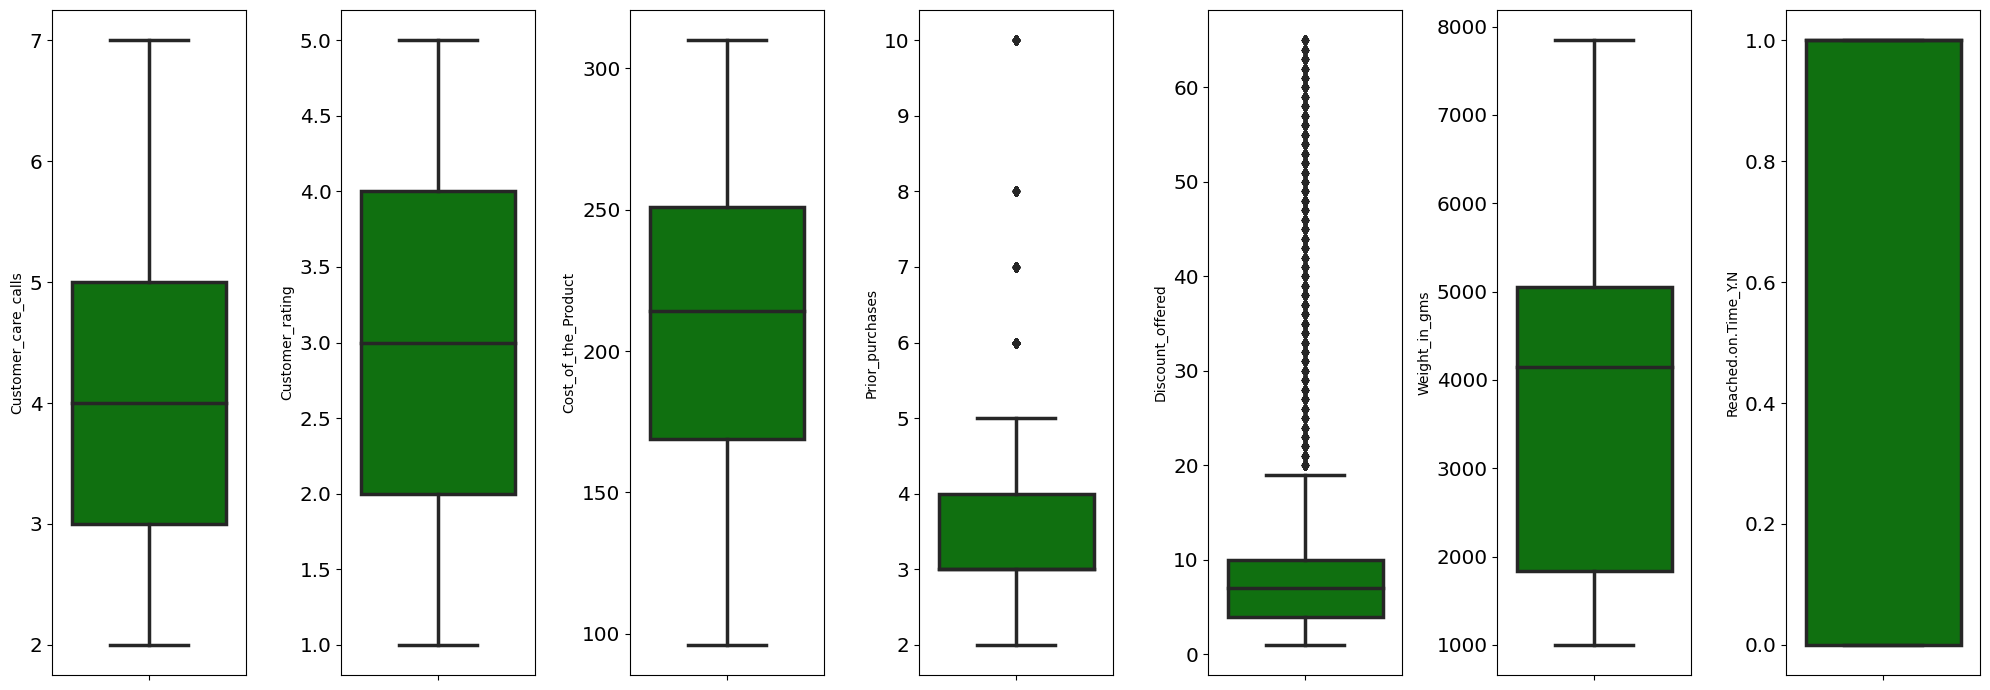

In [13]:
features = nums
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color = 'green', orient ='v')
  plt.tight_layout()

- Pada fitur **Prior_purchase** terdapat outlier yang mencolok dan tidak terlihat garis median di dalam kotak IQR.
- Pada fitur **Discount_offered** terdapat banyak sekali outlier dan berpotensi memiliki probabilitas distribusi **<i>right-skewed</i>**
- Pada fitur **Weight_in_gms** memiliki potensi probabilitas distribusi yang skewed.

***CATATAN UNTUK PRE-PROCESSING***
- Handle outlier dua kolom tersebut.

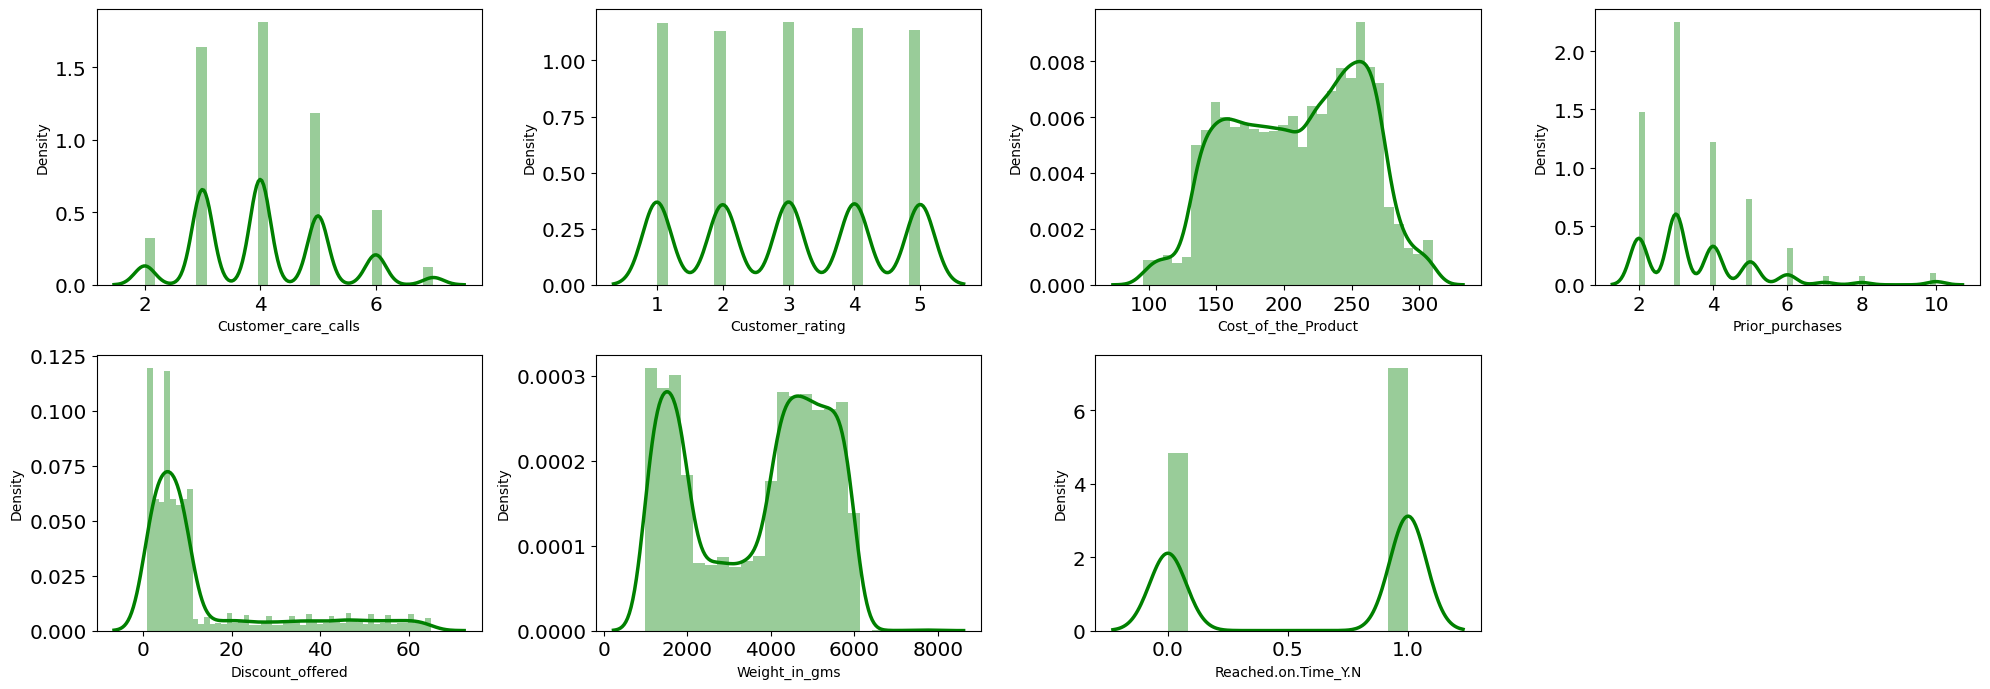

In [14]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.distplot(x=df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

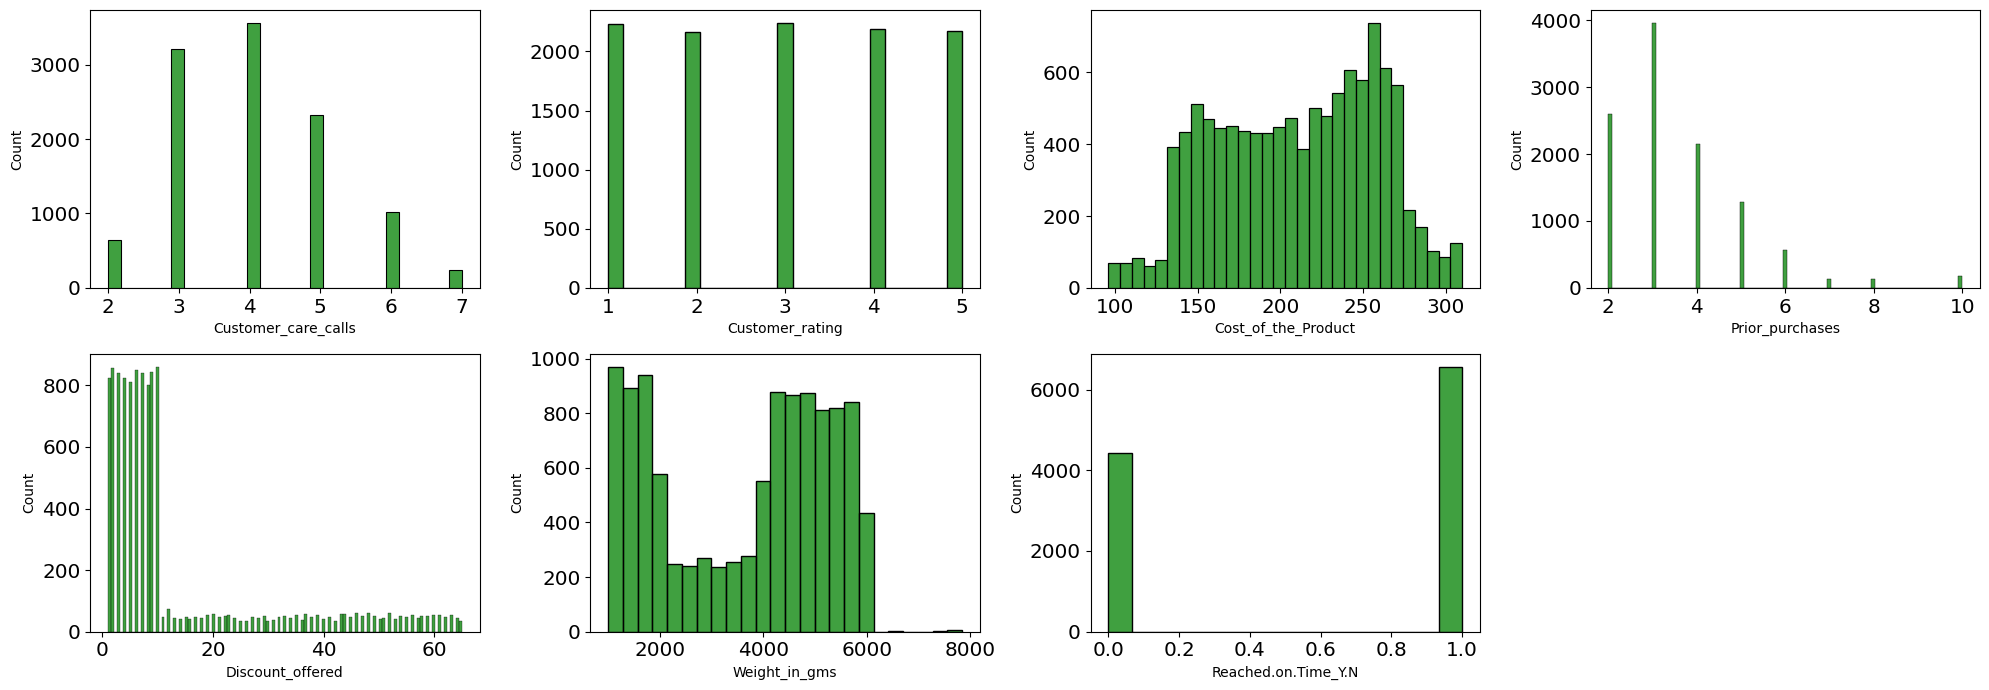

In [15]:
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.histplot(x=df[features[i]], color = 'green')
  plt.xlabel(features[i])
  plt.tight_layout()

**INSIGHT GRAFIK PROBABILITAS DISTRIBUSI - KDEPLOT**
- Distribusi pada fitur **Discount_offered** yang **<i>right-skewed</i>** terkonfirmasi.
- Pada fitur **Wight_in_gms** terdapat dua puncak (pada range 0 - 2000 dan 4000 - 6000). Butuh ditelaah lebih lanjut melalui Multivariate Analysis.

**BUSINESS INSIGHT**
- Pada fitur **Prior_purchase** terlihat grafik yang melandai di jumlah pembelian di atas 3. Hal ini bisa diartikan bahwa pelanggan yang menggunakan jasa shipping E-Commerce masih belum banyak memunculkan engagement yang besar. Perlu ditelaah lebih lanjut apa yang memicu pelanggan tersebut belum memiliki tingkat kepercayaan yang tinggi pada jasa shipping.

In [16]:
for column in nums:
    skewness = stats.skew(df[column])
    print(f"Skewness dari kolom {column}: {skewness}")

Skewness dari kolom Customer_care_calls: 0.3918723238934225
Skewness dari kolom Customer_rating: 0.00435900450181738
Skewness dari kolom Cost_of_the_Product: -0.15709569144775337
Skewness dari kolom Prior_purchases: 1.6816679361740619
Skewness dari kolom Discount_offered: 1.7986837686316186
Skewness dari kolom Weight_in_gms: -0.24971269621623338
Skewness dari kolom Reached.on.Time_Y.N: -0.39420353914024087


In [17]:
std = df[nums].std()
mean = df[nums].mean()

std

Customer_care_calls       1.141490
Customer_rating           1.413603
Cost_of_the_Product      48.063272
Prior_purchases           1.522860
Discount_offered         16.205527
Weight_in_gms          1635.377251
Reached.on.Time_Y.N       0.490584
dtype: float64

In [18]:
mean

Customer_care_calls       4.054459
Customer_rating           2.990545
Cost_of_the_Product     210.196836
Prior_purchases           3.567597
Discount_offered         13.373216
Weight_in_gms          3634.016729
Reached.on.Time_Y.N       0.596691
dtype: float64

In [19]:
# batas-batas yang berjarak 3 standar deviasi dari rata-rata.
# memilih 3 karena tingkat kepercayaan paling tinggi. 
# 1 = memperkirakan bahwa 68,27% data berada dalam rentang ini 
# 2 =  95,45% , 3 = 99,73%

batas_atas = mean + (3*std)
batas_bawah = mean - (3*std)

In [20]:
(df[nums] > batas_atas).sum()

Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases        178
Discount_offered       181
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64

In [21]:
(df[nums] < batas_bawah).sum()

Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [22]:
def batas_minimal(df, column):
    mean = df[column].mean()
    std = df[column].std()
    batas_bawah = mean - 3 * std
    return len(df[df[column] < batas_bawah])

for col in nums:
    count = batas_minimal(df, col)
    print(f"Data dibawah batas minimal {col}: {count}")

Data dibawah batas minimal Customer_care_calls: 0
Data dibawah batas minimal Customer_rating: 0
Data dibawah batas minimal Cost_of_the_Product: 0
Data dibawah batas minimal Prior_purchases: 0
Data dibawah batas minimal Discount_offered: 0
Data dibawah batas minimal Weight_in_gms: 0
Data dibawah batas minimal Reached.on.Time_Y.N: 0


In [23]:
def batas_maks (df, column):
    mean = df[column].mean()
    std = df[column].std()
    batas_atas = mean + 3 * std
    return len(df[df[column] > batas_atas])

for col in nums:
    count = batas_maks  (df, col)
    print(f"Data diatas batas maks {col}: {count}")

Data diatas batas maks Customer_care_calls: 0
Data diatas batas maks Customer_rating: 0
Data diatas batas maks Cost_of_the_Product: 0
Data diatas batas maks Prior_purchases: 178
Data diatas batas maks Discount_offered: 181
Data diatas batas maks Weight_in_gms: 0
Data diatas batas maks Reached.on.Time_Y.N: 0


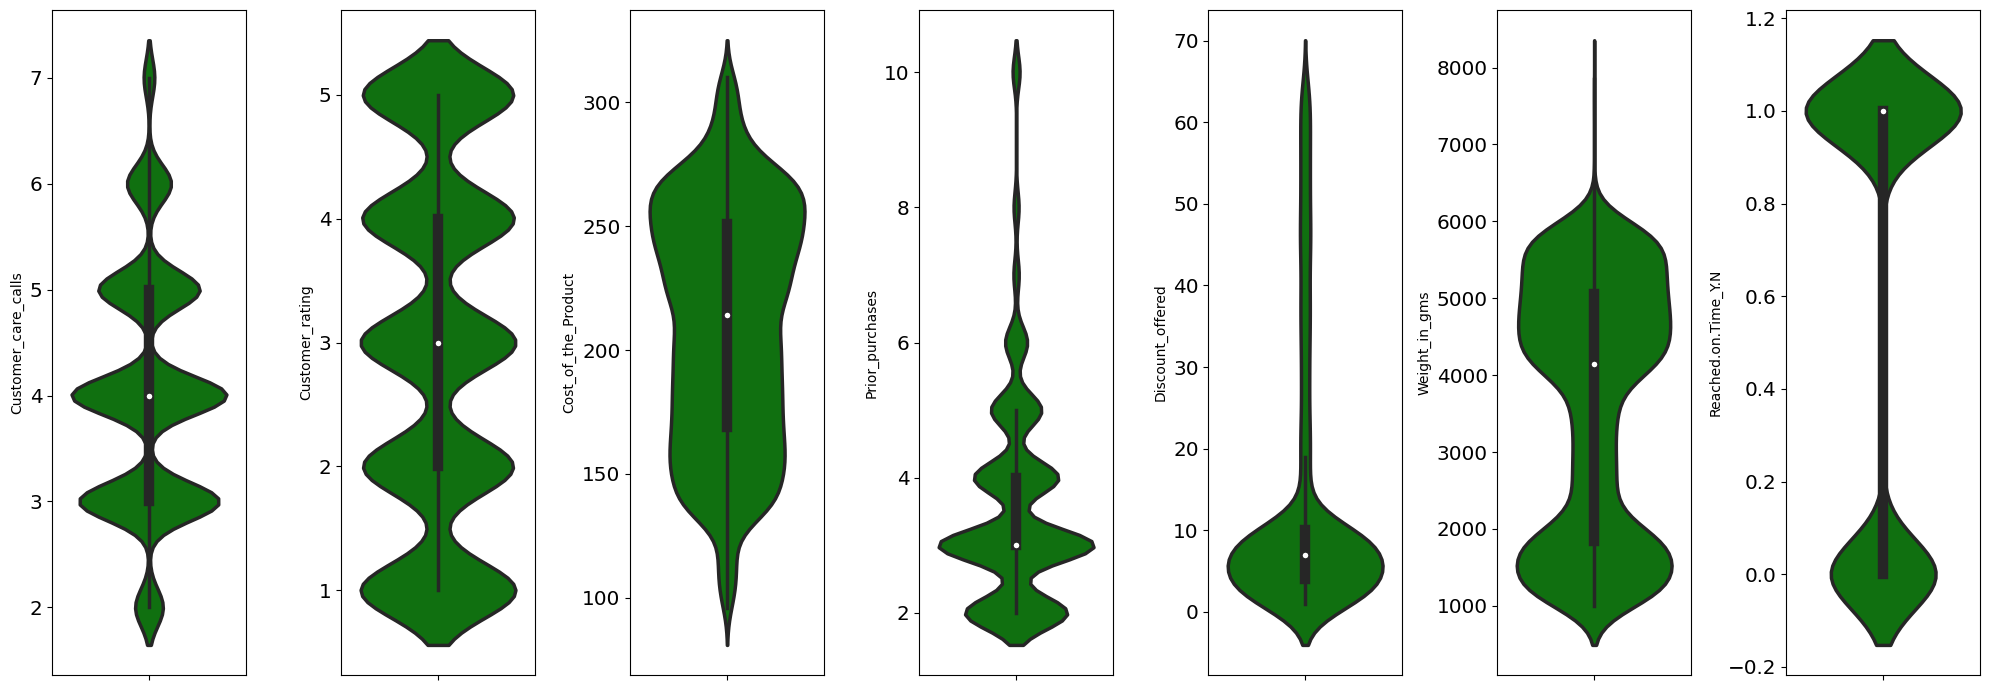

In [24]:
features = nums
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.violinplot(y=df[features[i]], color = 'green')
  plt.tight_layout()

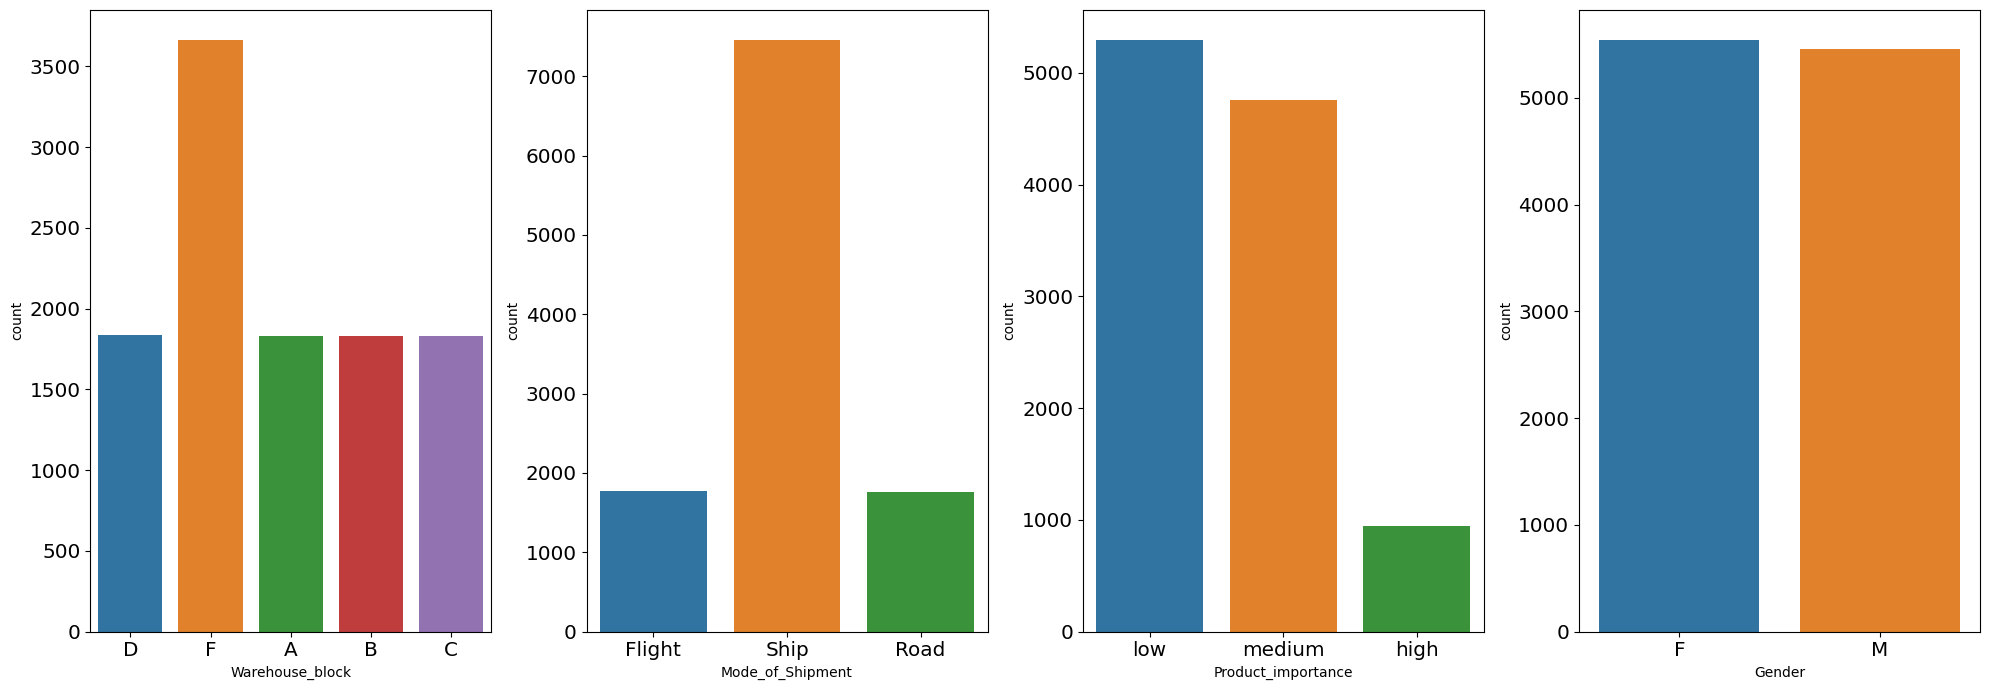

In [25]:
features = cats
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x=df[features[i]])
  plt.tight_layout()

- Dalam barplot **Warehouse_block** terdapat penumpukan barang pada gudang F (Selanjutnya akan diganti menjadi gudang E karena dalam dataset Kaggle tidak disebutkan nama gudang F dalam kolom ini)
- Dalam barplot **Mode_of_Shipment**, pelanggan lebih banyak memilih moda transportasi pengiriman kapal.
- Dalam barplot **Product_importance**, pelanggan lebih memilih prioritas low & medium. Poin ini akan ditelaah lebih lanjut pada blok kode di bawah ini.

## Multivariate Analysis

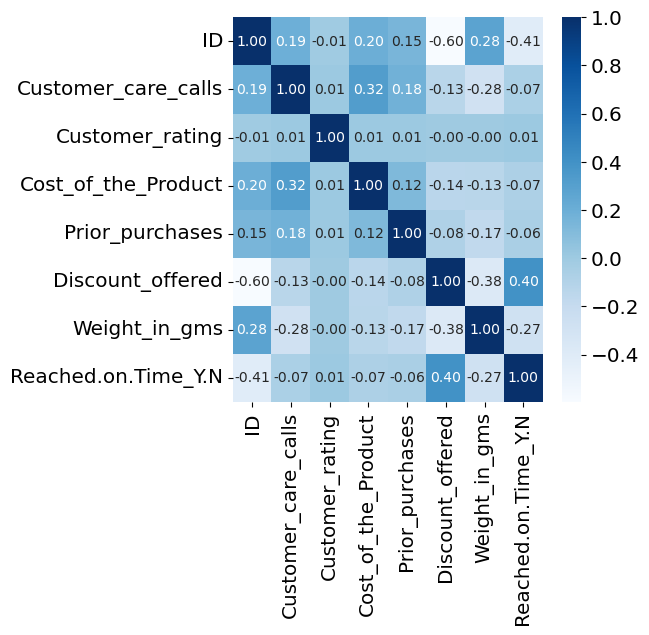

In [26]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Dari heatmap korelasi antar feature diatas, dapat diambil beberapa kesimpulan yaitu:
- **Reached_on_time** memiliki korelasi **positif** dengan **Discount_offered**, sehingga kemungkinan semakin tinggi discount yang diberikan akan semakin memungkinkan untuk paket datang terlambat
- **Reached_on_time** memiliki korelasi **negatif** dengan **Weight_in_gms**, sehingga kemungkinan semakin berat beban yang diangkut maka semakin memungkinkan untuk paket datang tepat waktu
- **Weight_in_gms** memiliki korelasi **negatif** dengan **Discount_offered**, sehingga kemungkinan semakin tinggi discount yang diberikan, maka semakin ringan beban barang yang diangkut
- **Customer_care_calls** memiliki korelasi **positif** dengan **Cost_of_the_product**, sehingga kemungkinan semakin mahal barang yang diantar, maka semakin banyak juga panggilan yang diterima
- **Weight_in_gms** memiliki korelasi **negatif** dengan **Customer_care_calls**, sehingga kemungkinan semakin berat beban barang, maka semakin sedikit panggilan yang diterima

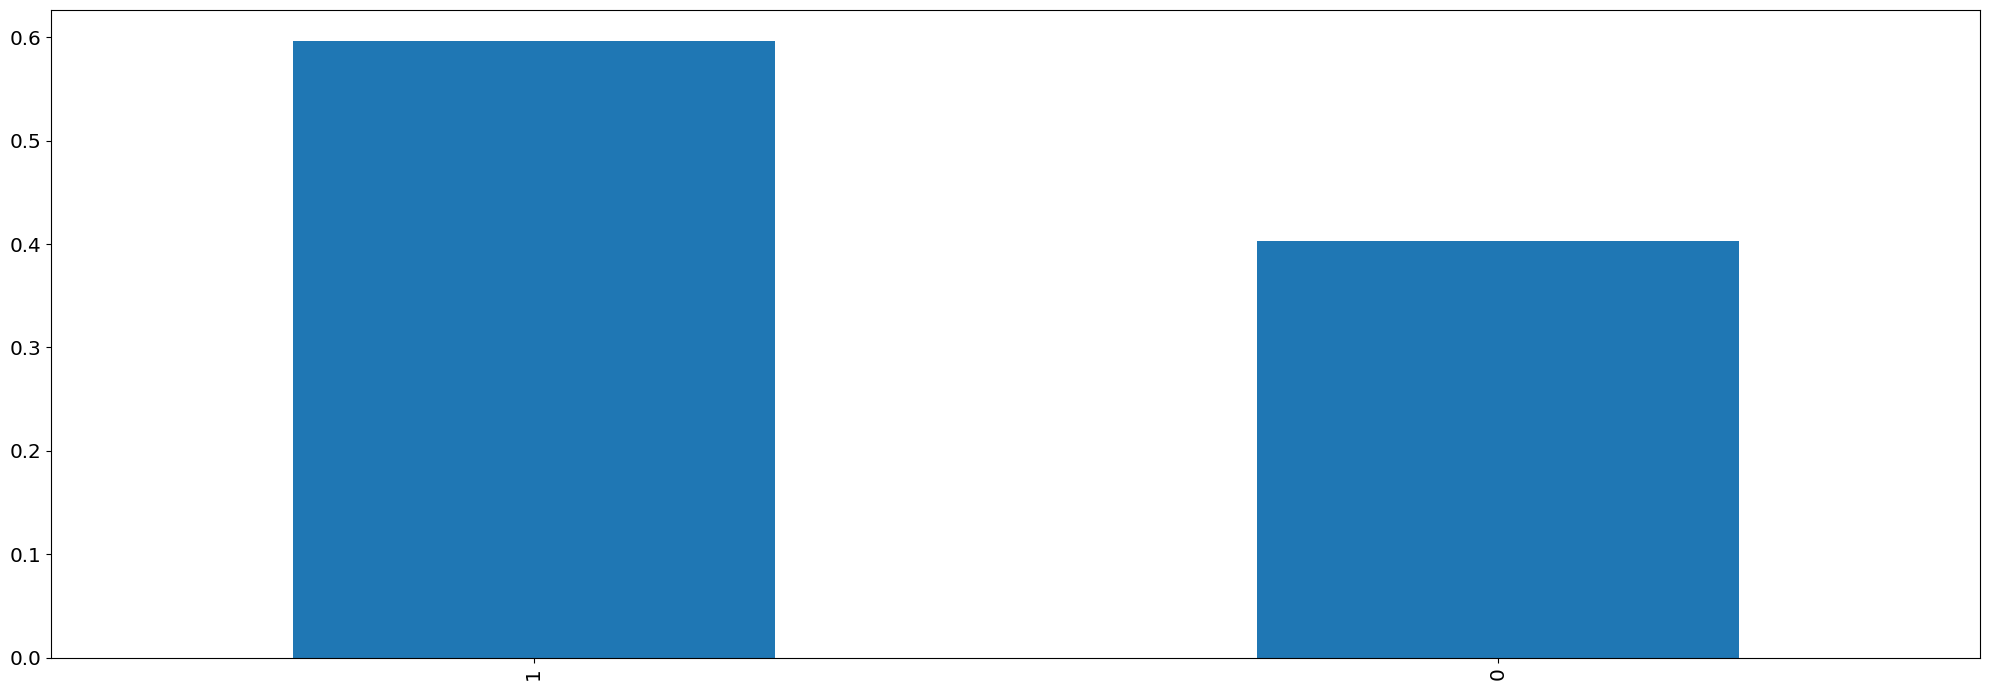

In [27]:
df['Reached.on.Time_Y.N'].value_counts(normalize = True).plot(kind = 'bar')
plt.tight_layout()

In [28]:
df['Reached.on.Time_Y.N'].value_counts(normalize = True)

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

In [29]:
telat = df[df['Reached.on.Time_Y.N'] == 1].copy()
ontime = df[df['Reached.on.Time_Y.N'] == 0].copy()

### Target VS Diskon

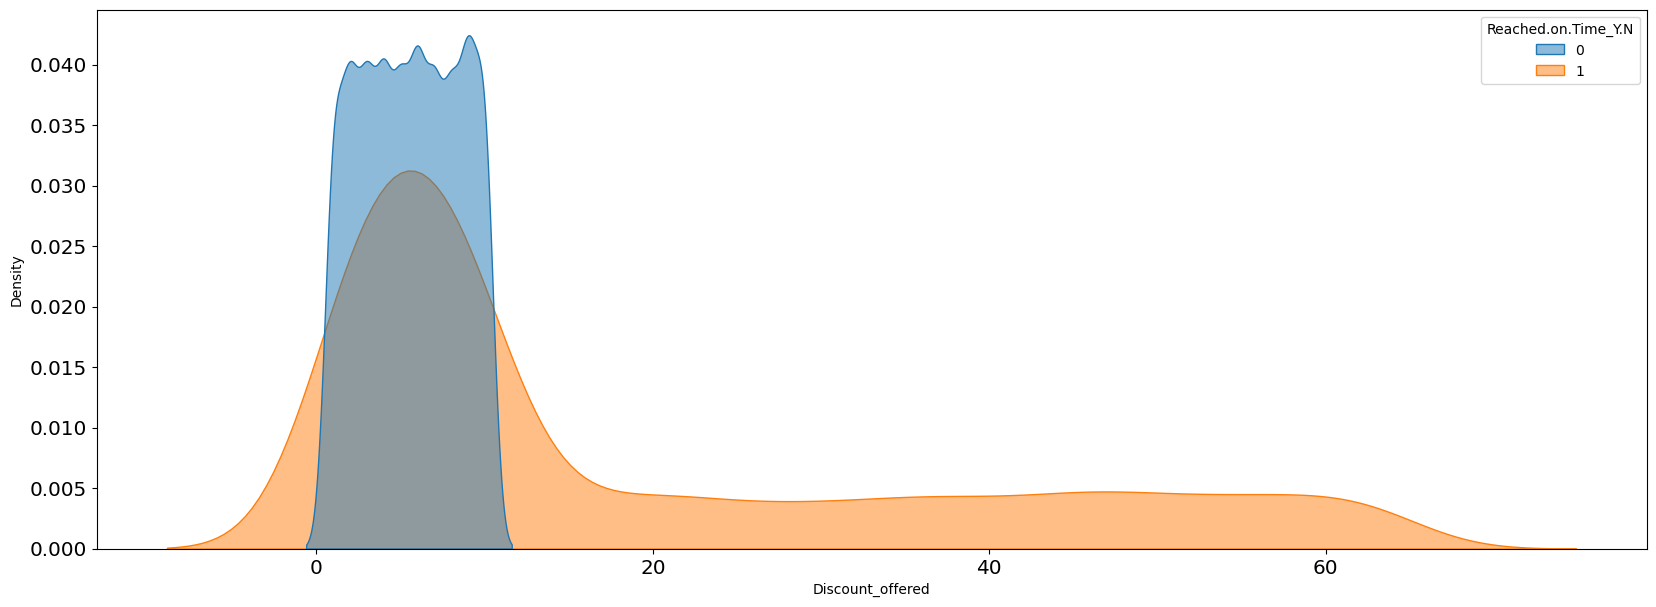

In [30]:
sns.kdeplot(data = df, 
             x = 'Discount_offered',
           hue = 'Reached.on.Time_Y.N',
           fill = True,
           alpha = .5)
plt.show()

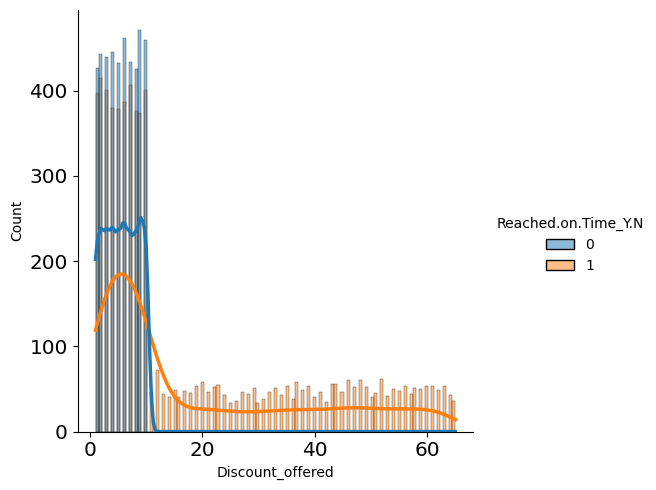

In [31]:
sns.displot(data = df, 
             x = 'Discount_offered',
           hue = 'Reached.on.Time_Y.N',
           fill = True,
           alpha = .5,
           kde = True)
plt.show()

In [32]:
telat.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [33]:
TD_telat = pd.DataFrame()
TD_telat['diskon'] = telat['Discount_offered'].copy()

In [34]:
TD_telat.describe()

diskon
count  6563.000000
mean     18.663721
std      19.108797
min       1.000000
25%       5.000000
50%       9.000000
75%      32.000000
max      65.000000

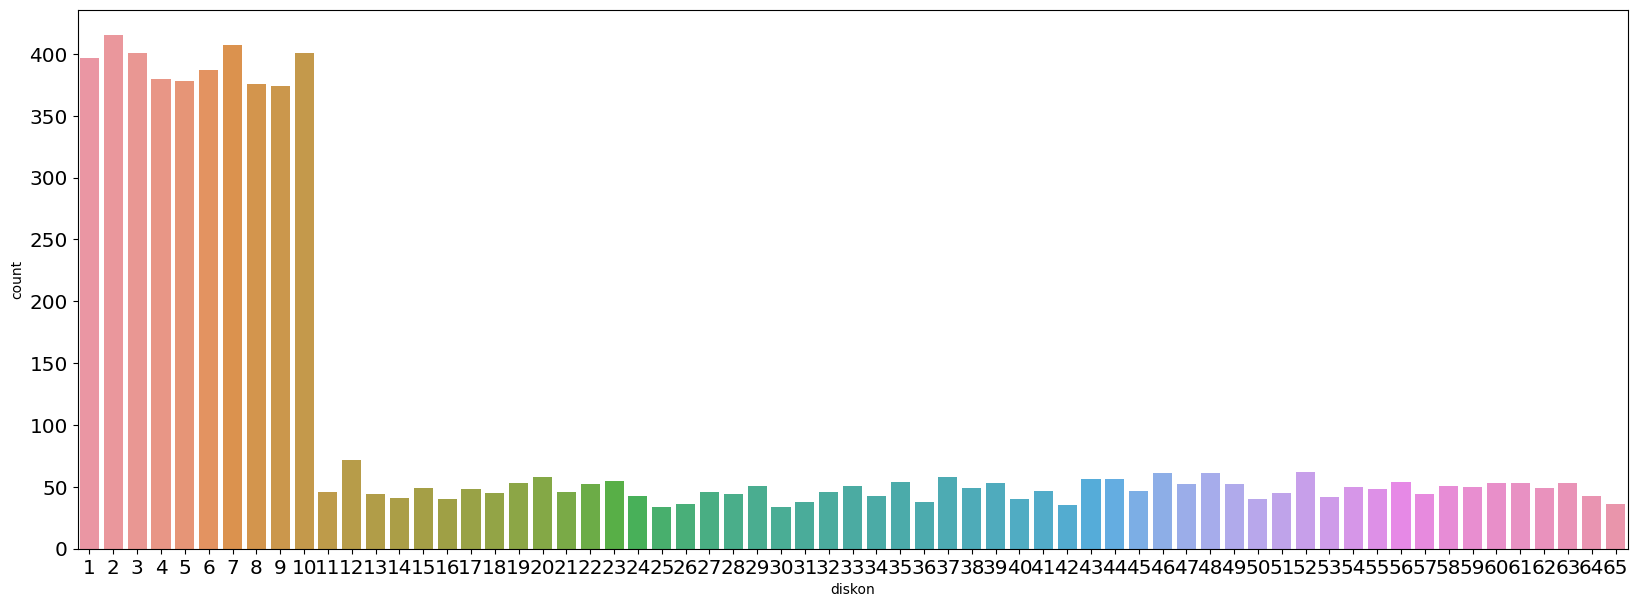

In [35]:
sns.countplot(data = TD_telat, x = 'diskon')
plt.show()

In [36]:
TD_ontime = pd.DataFrame()
TD_ontime['diskon'] = ontime['Discount_offered'].copy()

In [37]:
TD_ontime.describe()

diskon
count  4436.000000
mean      5.545987
std       2.877727
min       1.000000
25%       3.000000
50%       6.000000
75%       8.000000
max      10.000000

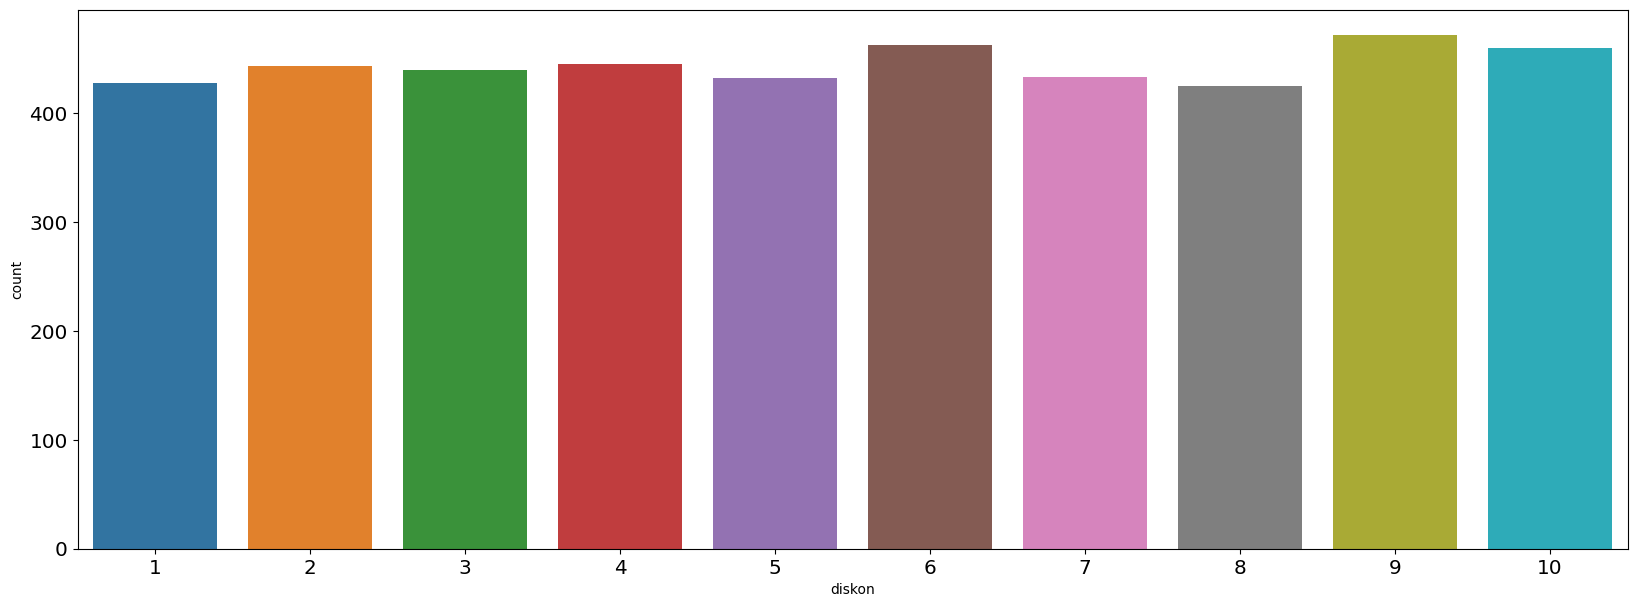

In [38]:
sns.countplot(data = TD_ontime, x = 'diskon')
plt.show()

In [39]:
#buat segmentasi diskon di bawah dan di atas 10%
TD = df.copy()
TD['kelas_diskon'] = np.where(TD['Discount_offered'] < 11, '1-10', '>10')

In [40]:
TD.groupby(['Reached.on.Time_Y.N', 'kelas_diskon'])['Discount_offered'].describe()

count       mean        std   min   25%  \
Reached.on.Time_Y.N kelas_diskon                                             
0                   1-10          4436.0   5.545987   2.877727   1.0   3.0   
1                   1-10          3916.0   5.463483   2.887317   1.0   3.0   
                    >10           2647.0  38.192293  15.931983  11.0  24.0   

                                   50%   75%   max  
Reached.on.Time_Y.N kelas_diskon                    
0                   1-10           6.0   8.0  10.0  
1                   1-10           5.0   8.0  10.0  
                    >10           39.0  52.0  65.0

In [41]:
TD.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'kelas_diskon'],
      dtype='object')

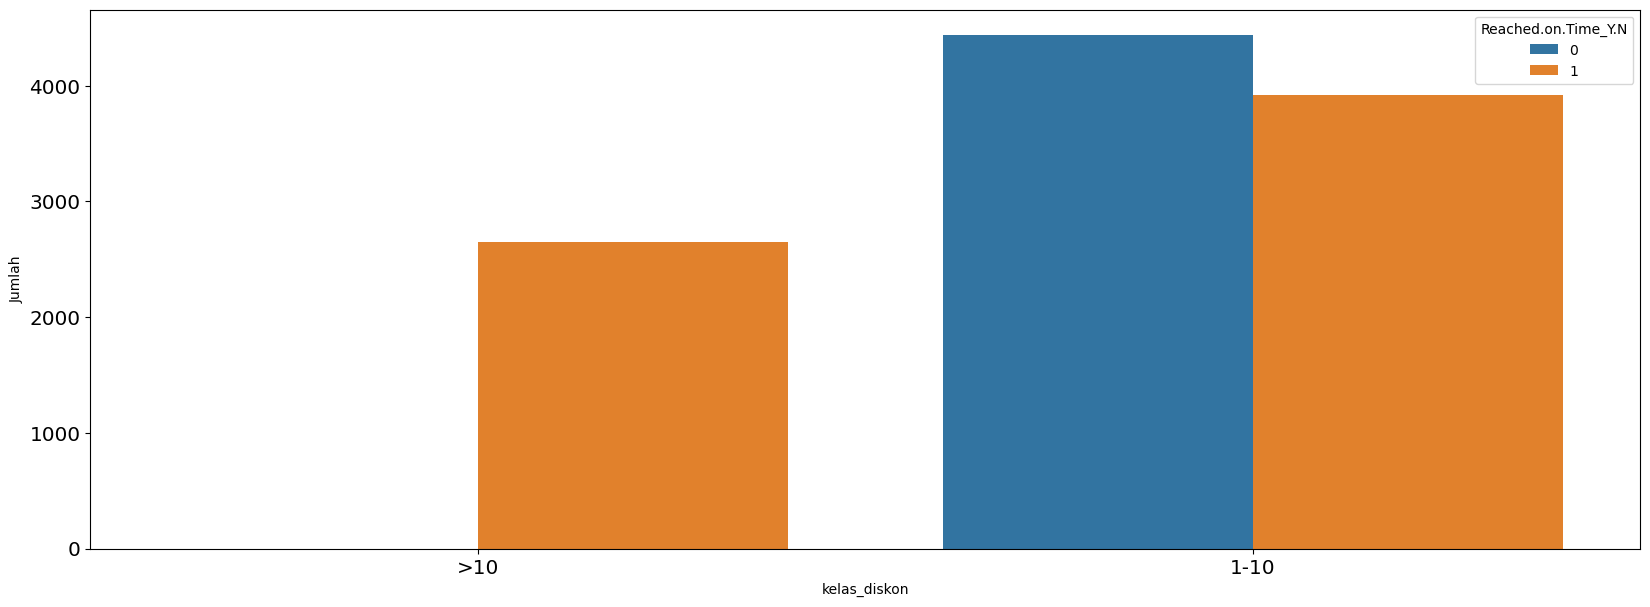

In [42]:
sns.countplot(data = TD,
           x = 'kelas_diskon',
           hue = 'Reached.on.Time_Y.N')
plt.ylabel('Jumlah')
plt.show()

### Target vs Berat

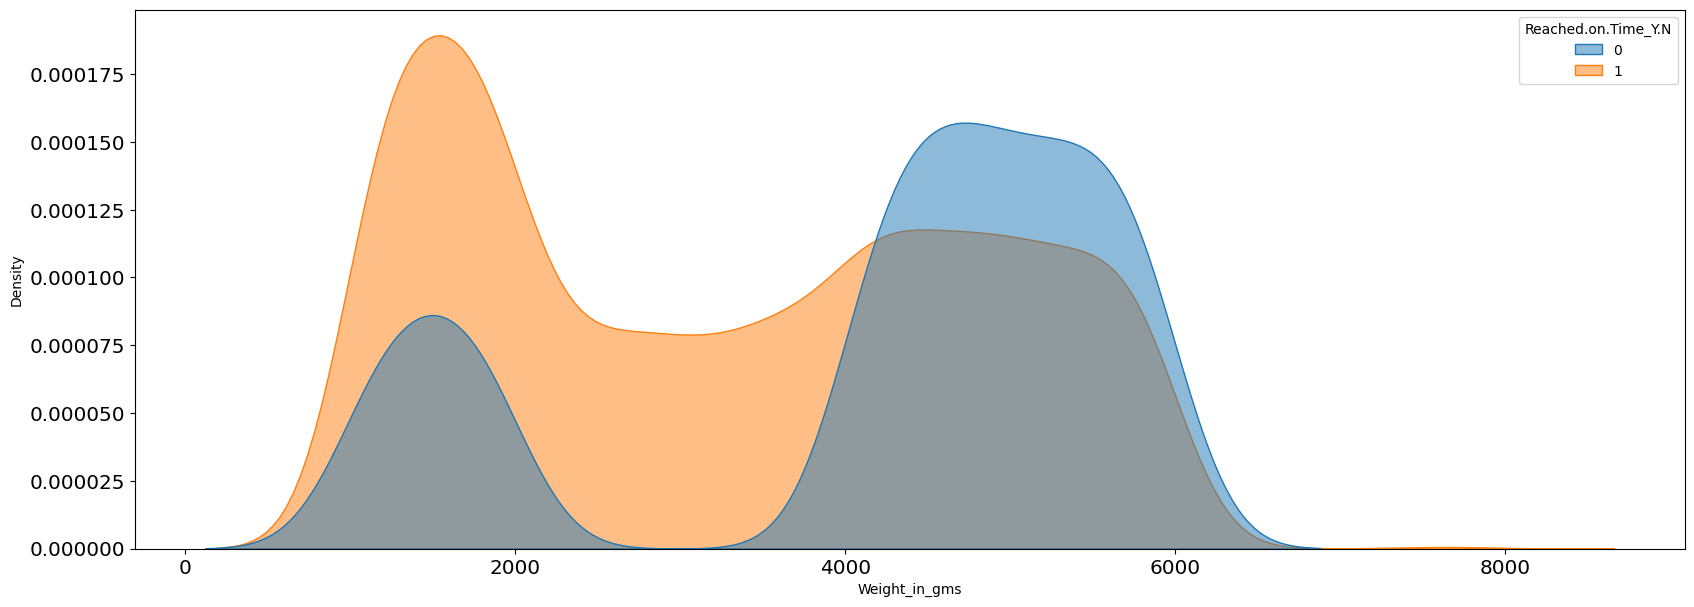

In [43]:
sns.kdeplot(data = df, 
             x = 'Weight_in_gms',
           hue = 'Reached.on.Time_Y.N',
           fill = True,
           alpha = .5)
plt.show()

In [44]:
#buat dataframe berdasarkan kelas berat
TB = pd.DataFrame()
TB = df.copy()
TB['kelas_berat'] = np.where(TB['Weight_in_gms'] < 2000, '0-2000',
                            np.where(TB['Weight_in_gms'] < 4001, '2000 - 4000', '>4000'))

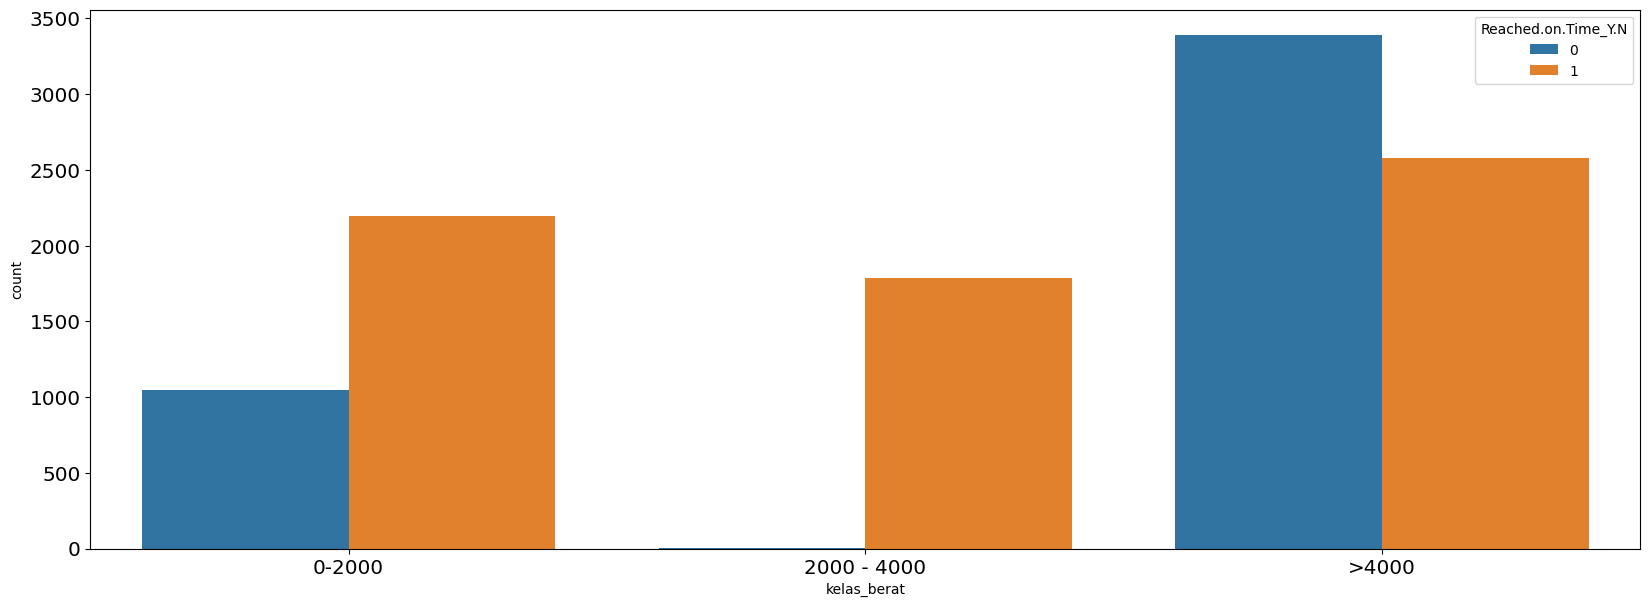

In [45]:
sns.countplot(data = TB, 
             x = 'kelas_berat',
           hue = 'Reached.on.Time_Y.N')
plt.show()

### Berat vs Diskon

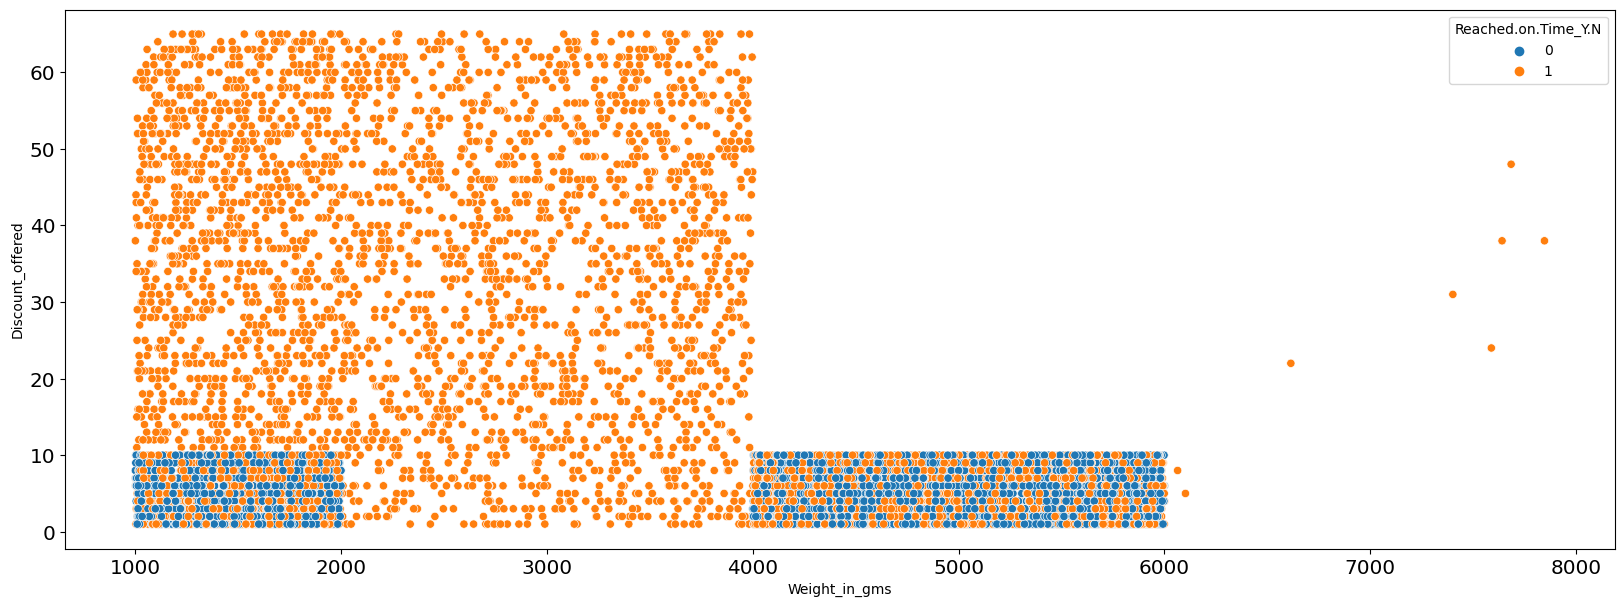

In [46]:
sns.scatterplot(data = df,
               x = 'Weight_in_gms',
               y = 'Discount_offered',
               hue = 'Reached.on.Time_Y.N')
plt.show()

In [224]:
BD = df[df['Weight_in_gms'] < 6000]

In [225]:
BD

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10988 rows x 12 columns]

In [226]:
BD_w = pd.DataFrame()
BD_w['kelas_berat'] = np.where(BD['Weight_in_gms'] < 2000 , '0-2000',
                            np.where(BD['Weight_in_gms'] < 4000, '2000 - 4000', '> 4000'))
BD_w['telat'] = BD['Reached.on.Time_Y.N'].copy()

In [227]:
BD_w['diskon'] = BD['Discount_offered'].copy()

In [228]:
BD_w_max = BD_w.groupby(['telat', 'kelas_berat']).agg({'diskon':'max'}).reset_index()

In [229]:
BD_w_max

telat  kelas_berat  diskon
0    0.0       0-2000    10.0
1    0.0  2000 - 4000     6.0
2    0.0       > 4000    10.0
3    1.0       0-2000    65.0
4    1.0  2000 - 4000    65.0
5    1.0       > 4000    58.0

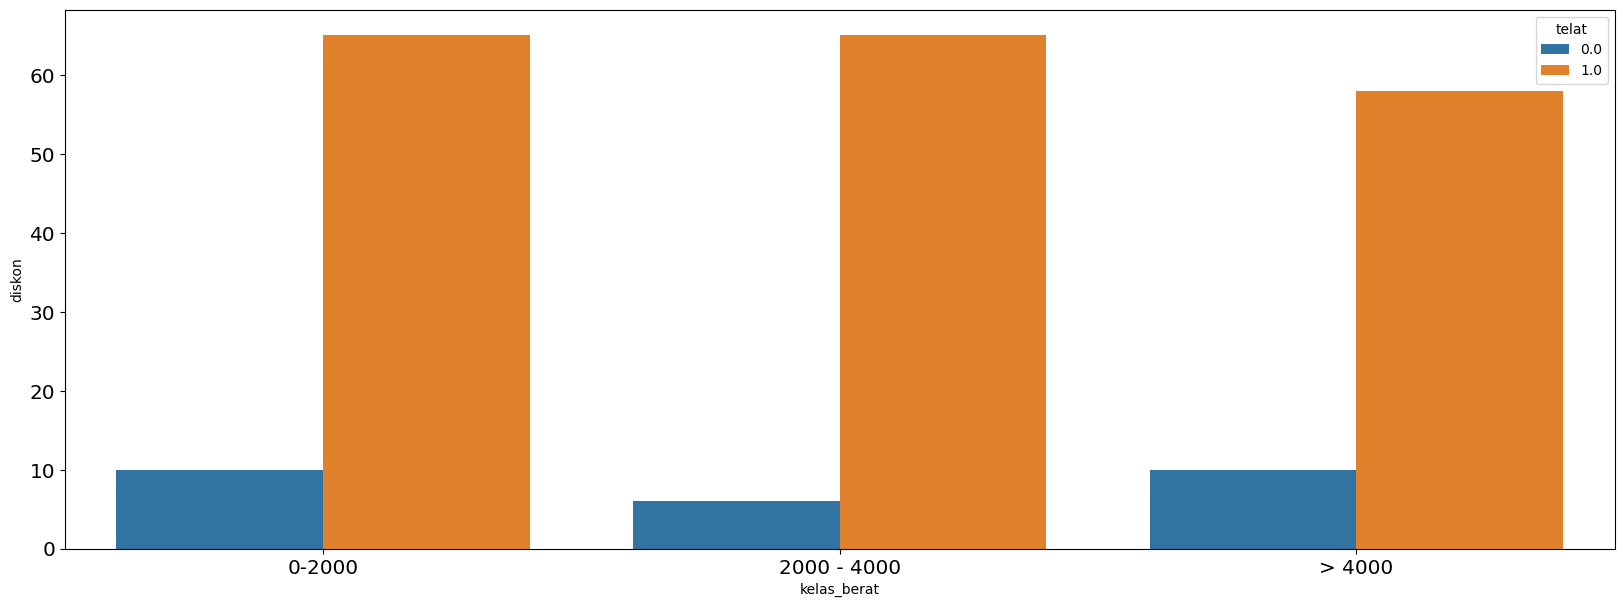

In [230]:
sns.barplot(data = BD_w_max, x = 'kelas_berat', y = 'diskon', hue = 'telat')
plt.show()

### Berat vs Harga

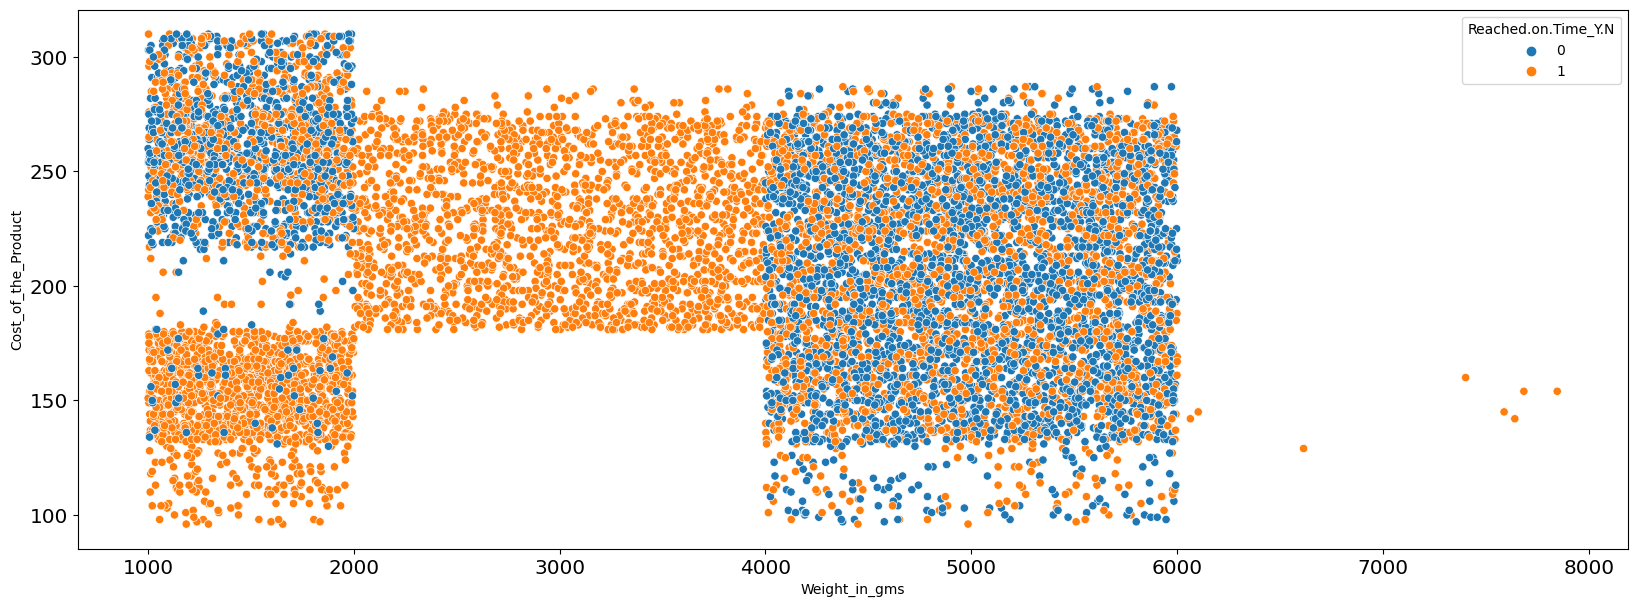

In [54]:
sns.scatterplot(data = df,
               y = 'Cost_of_the_Product',
               x = 'Weight_in_gms',
               hue = 'Reached.on.Time_Y.N')
plt.show()

### Customer Care Call vs Cost of Product

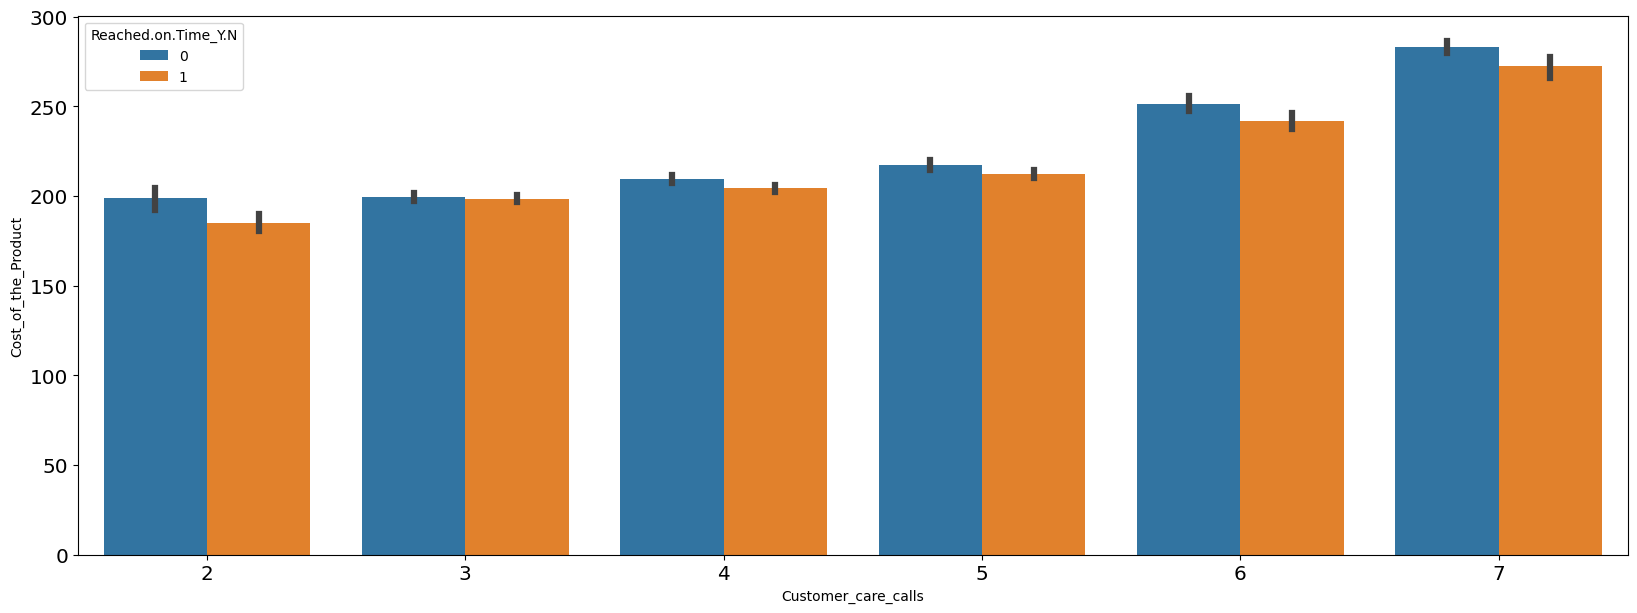

In [55]:
sns.barplot(data = df,
               x = 'Customer_care_calls',
               y = 'Cost_of_the_Product',
               hue = 'Reached.on.Time_Y.N')
plt.show()

In [56]:
#buat dataframe khusus customer care call yg telat
CC = df[df['Reached.on.Time_Y.N'] == 1].copy()

In [57]:
CC = CC

### Berat vs Customer Care Calls

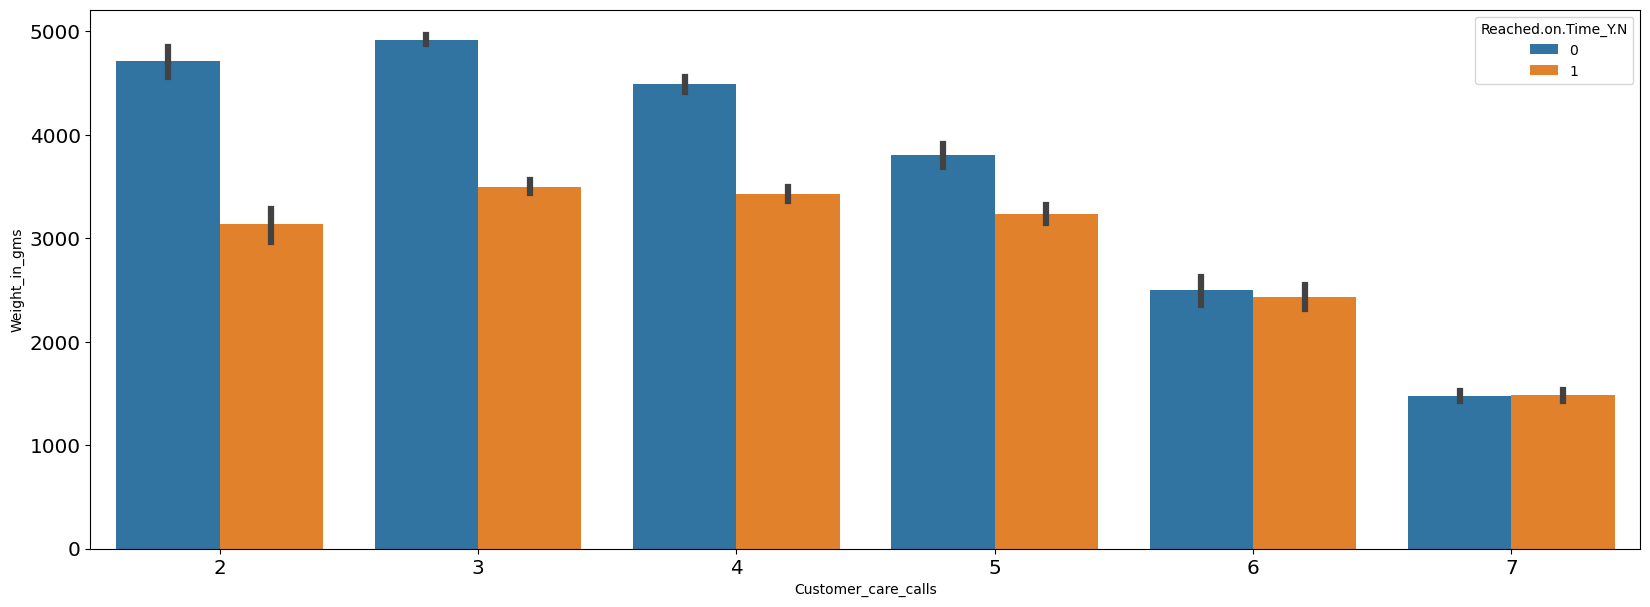

In [58]:
sns.barplot(data = df,
               x = 'Customer_care_calls',
               y = 'Weight_in_gms',
               hue = 'Reached.on.Time_Y.N')
plt.show()

In [59]:
#hitung yg telat aja
BCC_telat = pd.DataFrame()
BCC_telat['Berat'] = telat['Weight_in_gms'].copy()
BCC_telat['CC'] = telat['Customer_care_calls'].copy()

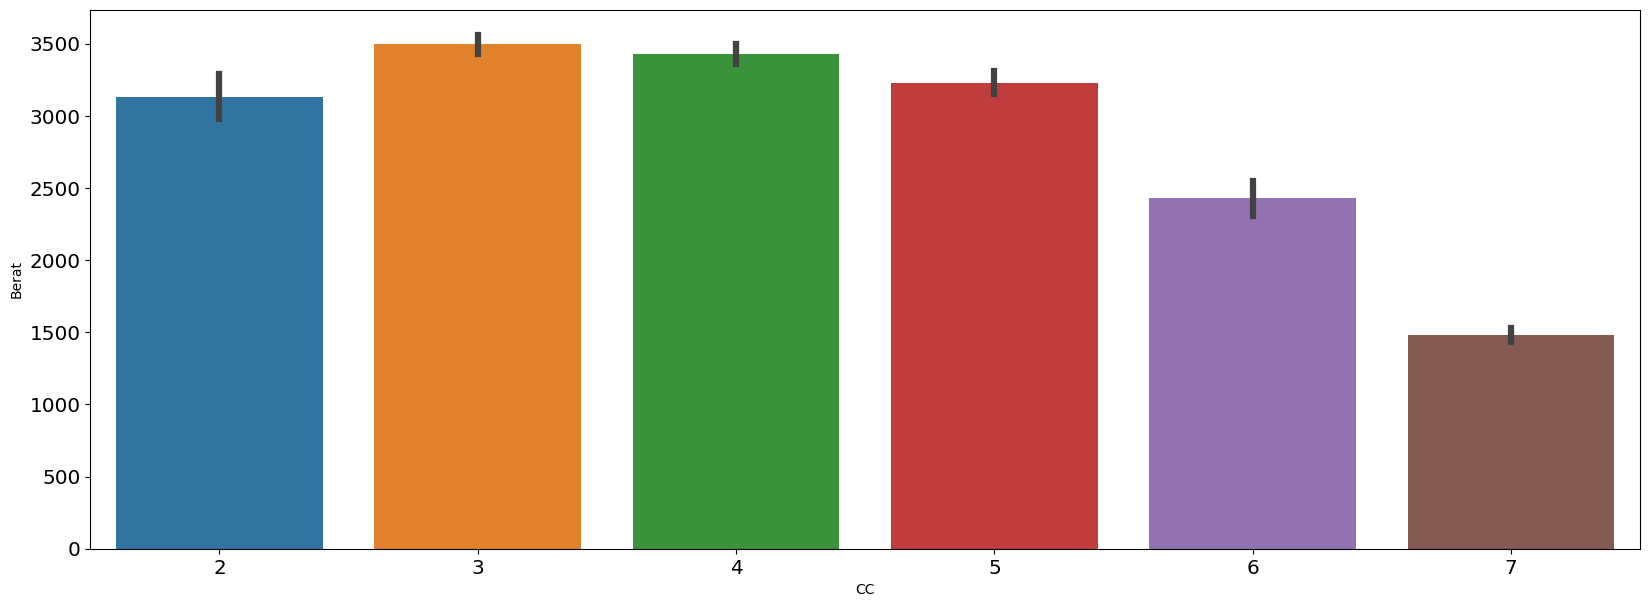

In [60]:
sns.barplot(data = BCC_telat,
               x = 'CC',
               y = 'Berat')
plt.show()

In [61]:
#buat df dengan membuat kelompok berat


### Harga vs Diskon

In [62]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

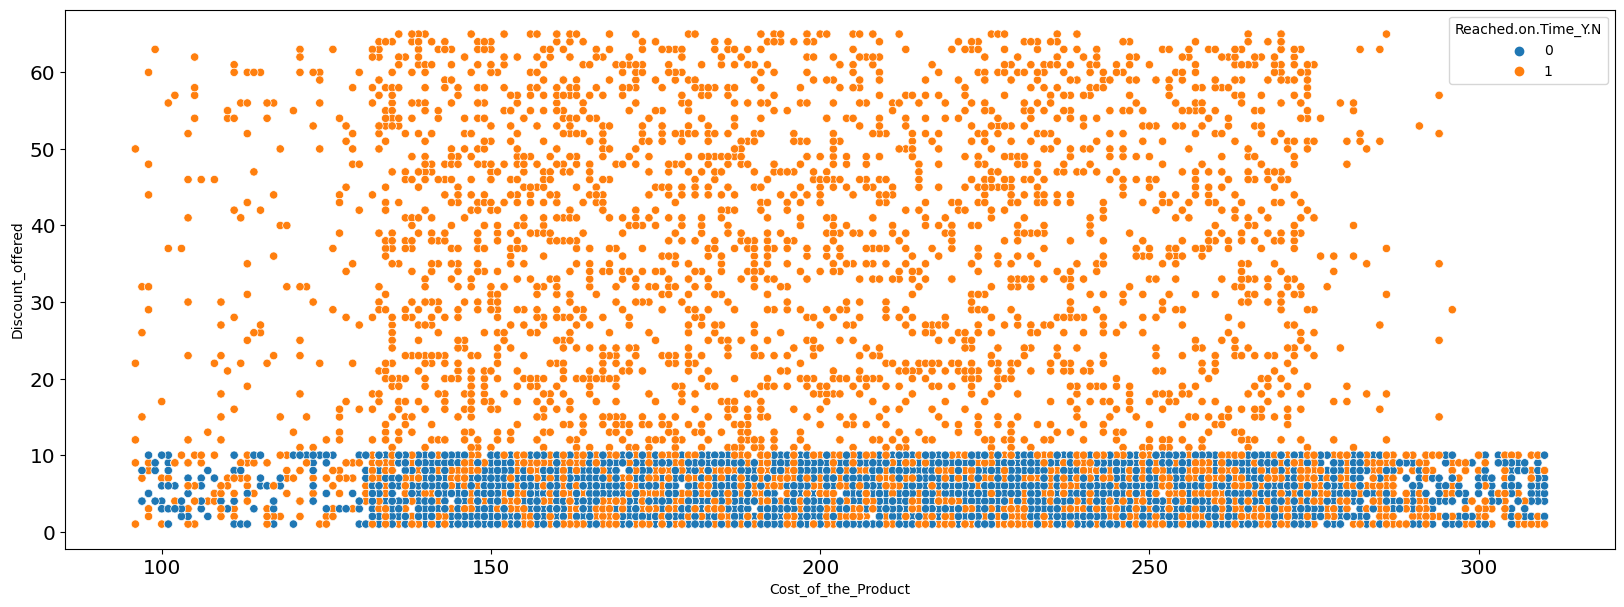

In [63]:
sns.scatterplot(data = df,
               x = 'Cost_of_the_Product',
               y = 'Discount_offered',
               hue = 'Reached.on.Time_Y.N')
plt.show()

In [64]:
#cek statistik jika digroupby berdasarkan value reach on time
df.groupby(['Reached.on.Time_Y.N'])['Cost_of_the_Product', 'Discount_offered'].describe().reset_index()

Reached.on.Time_Y.N Cost_of_the_Product                                      \
                                    count        mean        std   min    25%   
0                   0              4436.0  214.498647  47.757432  97.0  174.0   
1                   1              6563.0  207.289197  48.054876  96.0  167.0   

                       Discount_offered                                       \
     50%    75%    max            count       mean        std  min  25%  50%   
0  222.0  254.0  310.0           4436.0   5.545987   2.877727  1.0  3.0  6.0   
1  209.0  249.0  310.0           6563.0  18.663721  19.108797  1.0  5.0  9.0   

               
    75%   max  
0   8.0  10.0  
1  32.0  65.0

In [65]:
#bikin df khusus diskon di atas 10%
HD10 = df[df['Discount_offered'] > 10].copy()

In [66]:
HD10.groupby(['Reached.on.Time_Y.N'])['Cost_of_the_Product', 'Discount_offered'].describe().reset_index()

Reached.on.Time_Y.N Cost_of_the_Product                                      \
                                    count        mean        std   min    25%   
0                   1              2647.0  196.196071  45.536872  96.0  158.0   

                       Discount_offered                                    \
     50%    75%    max            count       mean        std   min   25%   
0  192.0  234.0  296.0           2647.0  38.192293  15.931983  11.0  24.0   

                     
    50%   75%   max  
0  39.0  52.0  65.0

In [67]:
#bikin df khusus diskon di bawah 10%
HD10_below = df[df['Discount_offered'] < 10].copy()

In [68]:
HD10_below.groupby(['Reached.on.Time_Y.N'])['Cost_of_the_Product', 'Discount_offered'].describe().reset_index()

Reached.on.Time_Y.N Cost_of_the_Product                                      \
                                    count        mean        std   min    25%   
0                   0              3977.0  214.498366  47.738010  97.0  174.0   
1                   1              3515.0  214.632717  48.372325  96.0  174.0   

                       Discount_offered                                     \
     50%    75%    max            count      mean       std  min  25%  50%   
0  221.0  254.0  310.0           3977.0  5.031934  2.585118  1.0  3.0  5.0   
1  221.0  255.0  310.0           3515.0  4.945946  2.582929  1.0  3.0  5.0   

             
   75%  max  
0  7.0  9.0  
1  7.0  9.0

In [69]:
#dataframe khusus segmentasi diskon di atas dan di bawah 10%
HD = df.copy()
HD['kelas_diskon'] = np.where(HD['Discount_offered'] < 10, '<10', '>10')

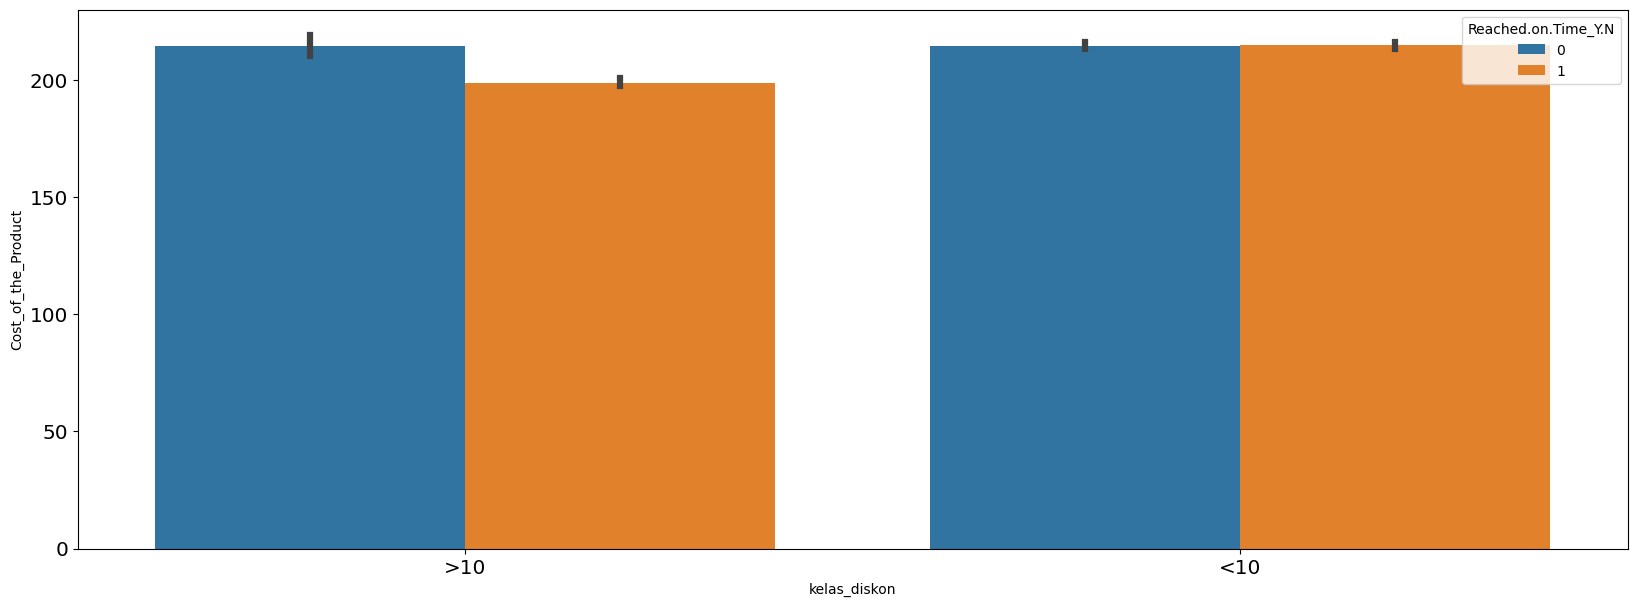

In [70]:
sns.barplot(data = HD,
           x = 'kelas_diskon',
           y = 'Cost_of_the_Product',
           hue = 'Reached.on.Time_Y.N')
plt.show()

In [71]:
HD.groupby(['Reached.on.Time_Y.N', 'kelas_diskon'])['Cost_of_the_Product'].describe().reset_index()

Reached.on.Time_Y.N kelas_diskon   count        mean        std   min  \
0                    0          <10  3977.0  214.498366  47.738010  97.0   
1                    0          >10   459.0  214.501089  47.977632  98.0   
2                    1          <10  3515.0  214.632717  48.372325  96.0   
3                    1          >10  3048.0  198.820538  46.268508  96.0   

     25%    50%    75%    max  
0  174.0  221.0  254.0  310.0  
1  174.0  225.0  254.0  310.0  
2  174.0  221.0  255.0  310.0  
3  160.0  196.5  238.0  309.0

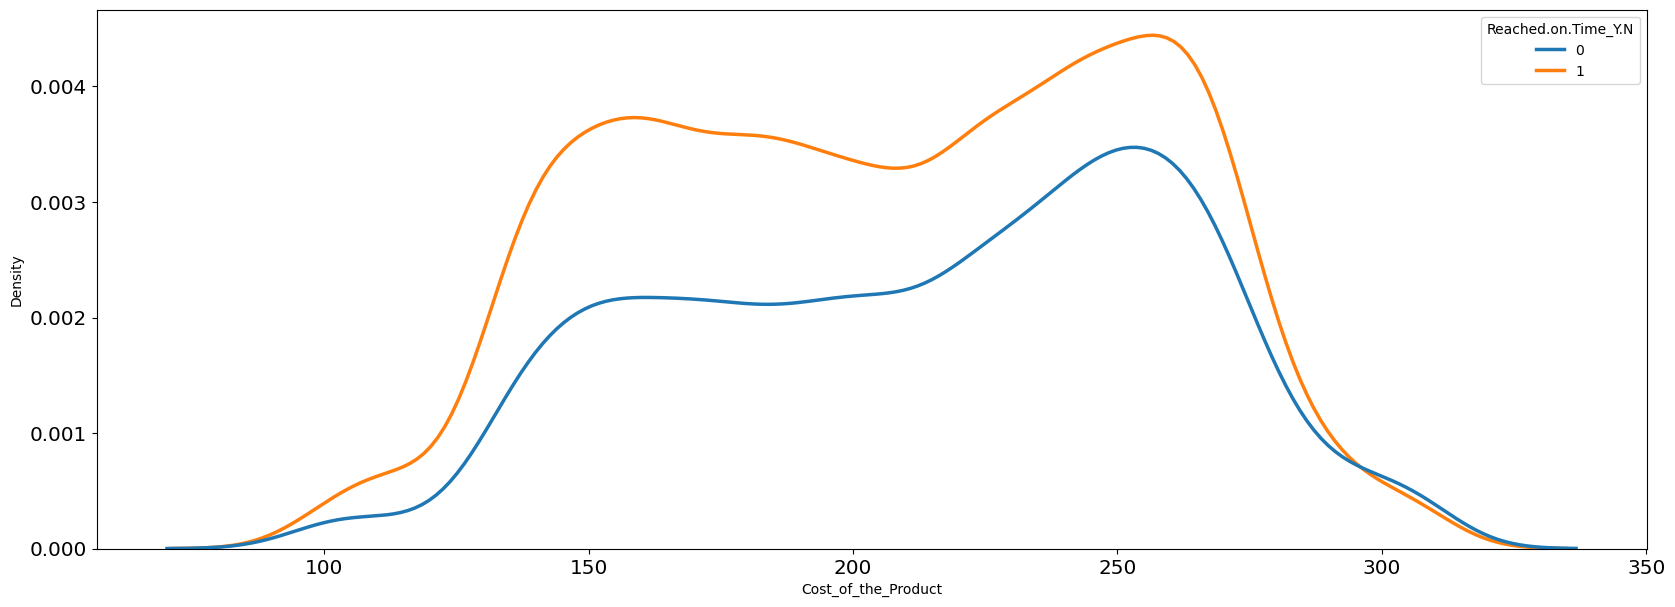

In [72]:
sns.kdeplot(data = df,
           x = 'Cost_of_the_Product',
           hue = 'Reached.on.Time_Y.N')
plt.show()

In [73]:
df['Cost_of_the_Product'].describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

In [74]:
#dataframe untuk segmentasi harga dari 90 - 100, 100 - 200, 200 - 300, >300
COD = df.copy()
COD['kelas_harga'] = np.where(COD['Cost_of_the_Product'] < 100, '<100',
                             np.where(COD['Cost_of_the_Product'] < 200, '100<x<200',
                                     np.where(COD['Cost_of_the_Product'] < 300, '200<x<300', '>300')))

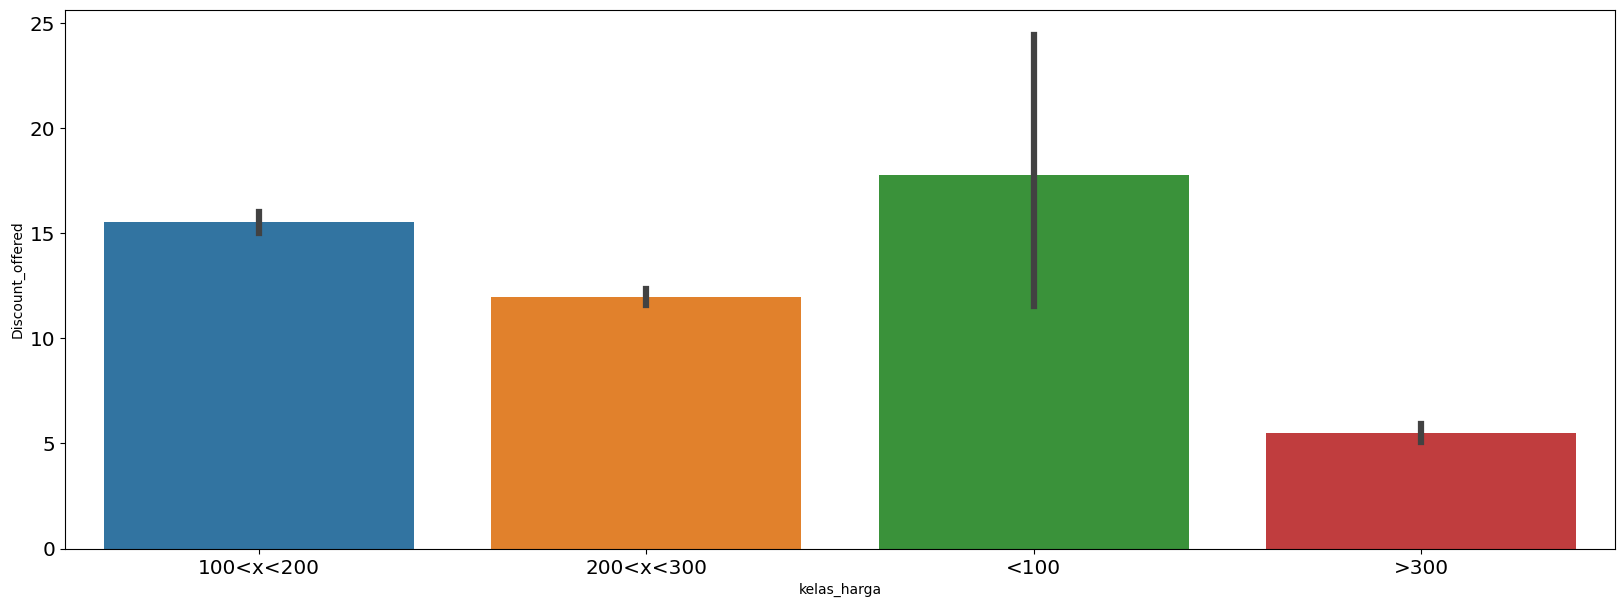

In [75]:
sns.barplot(data = COD,
           x = 'kelas_harga',
           y = 'Discount_offered')
plt.show()

In [76]:
COD.groupby(['kelas_harga'])['Discount_offered'].describe()

count       mean        std  min  25%  50%   75%   max
kelas_harga                                                         
100<x<200    4583.0  15.539821  17.677037  1.0  4.0  8.0  20.5  65.0
200<x<300    6220.0  11.963183  15.008164  1.0  4.0  7.0  10.0  65.0
<100           31.0  17.774194  18.073387  1.0  5.0  9.0  27.5  63.0
>300          165.0   5.521212   2.773102  1.0  3.0  6.0   8.0  10.0

In [77]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

### Apakah ada hubungan antara product importance, harga, dan berat pada keterlambatan barang?

In [78]:
COP = df.copy()
COP['kelas_harga'] = np.where(COP['Cost_of_the_Product'] < 100, '0-100 USD',
                             np.where(COP['Cost_of_the_Product'] < 200, '100-200 USD',
                                     np.where(COP['Cost_of_the_Product'] < 300, '200-300 USD', '>300 USD')))
COP['kelas_berat'] = np.where(COP['Weight_in_gms'] < 2000, '0-2000',
                            np.where(COP['Weight_in_gms'] < 4001, '2000 - 4000', '>4000'))

In [79]:
COP.groupby(['kelas_harga', 'kelas_berat', 'Product_importance']).agg({'ID':'count'})

ID
kelas_harga kelas_berat Product_importance      
0-100 USD   0-2000      high                   2
                        low                    6
                        medium                 4
            >4000       high                   3
                        low                    9
                        medium                 7
100-200 USD 0-2000      high                 131
                        low                  683
                        medium               556
            2000 - 4000 high                  44
                        low                  165
                        medium               188
            >4000       high                 260
                        low                 1301
                        medium              1255
200-300 USD 0-2000      high                  27
                        low                 1017
                        medium               650
            2000 - 4000 high                 137
                        low                  634
                        medium               624
            >4000       high                 342
                        low                 1383
                        medium              1406
>300 USD    0-2000      high                   2
                        low                   99
                        medium                64

In [80]:
#groupby df berdasarkan 2 kolom kategorik dan diagregat dengan menghitung jumlah ID
pi = df.groupby(['Product_importance', 'Mode_of_Shipment']).agg({'ID':'count'}).reset_index()
pi

Product_importance Mode_of_Shipment    ID
0               high           Flight   163
1               high             Road   158
2               high             Ship   627
3                low           Flight   838
4                low             Road   857
5                low             Ship  3602
6             medium           Flight   776
7             medium             Road   745
8             medium             Ship  3233

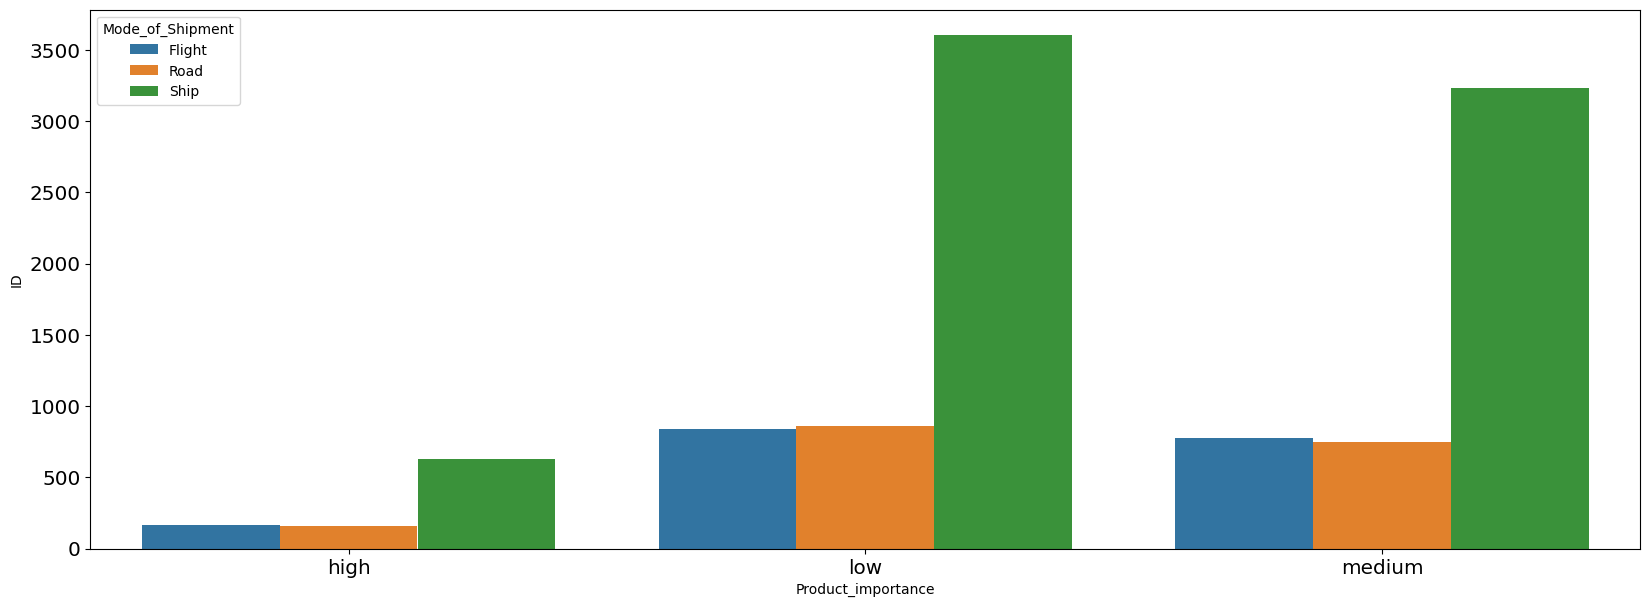

In [81]:
sns.barplot(data = pi, hue='Mode_of_Shipment', x= 'Product_importance', y='ID')
plt.show()

- Plot bar di atas menunjukkan bahwa walaupun secara kolektif moda transportasi kapal lebih dominan, moda transportasi pesawat lebih dipilih jika masuk ke dalam kategori ***high***. Hal yang sama juga ditemukan pada kategori ***medium*** dimana moda transportasi yang lebih banyak dipilih pelanggan adalah kendaraan darat (motor, truk, bus cargo, dll).

In [82]:
PIWB = df.groupby(['Product_importance', 'Warehouse_block']).agg({'ID':'count'}).reset_index()
PIWB

Product_importance Warehouse_block    ID
0                high               A   165
1                high               B   146
2                high               C   168
3                high               D   166
4                high               F   303
5                 low               A   909
6                 low               B   855
7                 low               C   874
8                 low               D   883
9                 low               F  1776
10             medium               A   759
11             medium               B   832
12             medium               C   791
13             medium               D   785
14             medium               F  1587

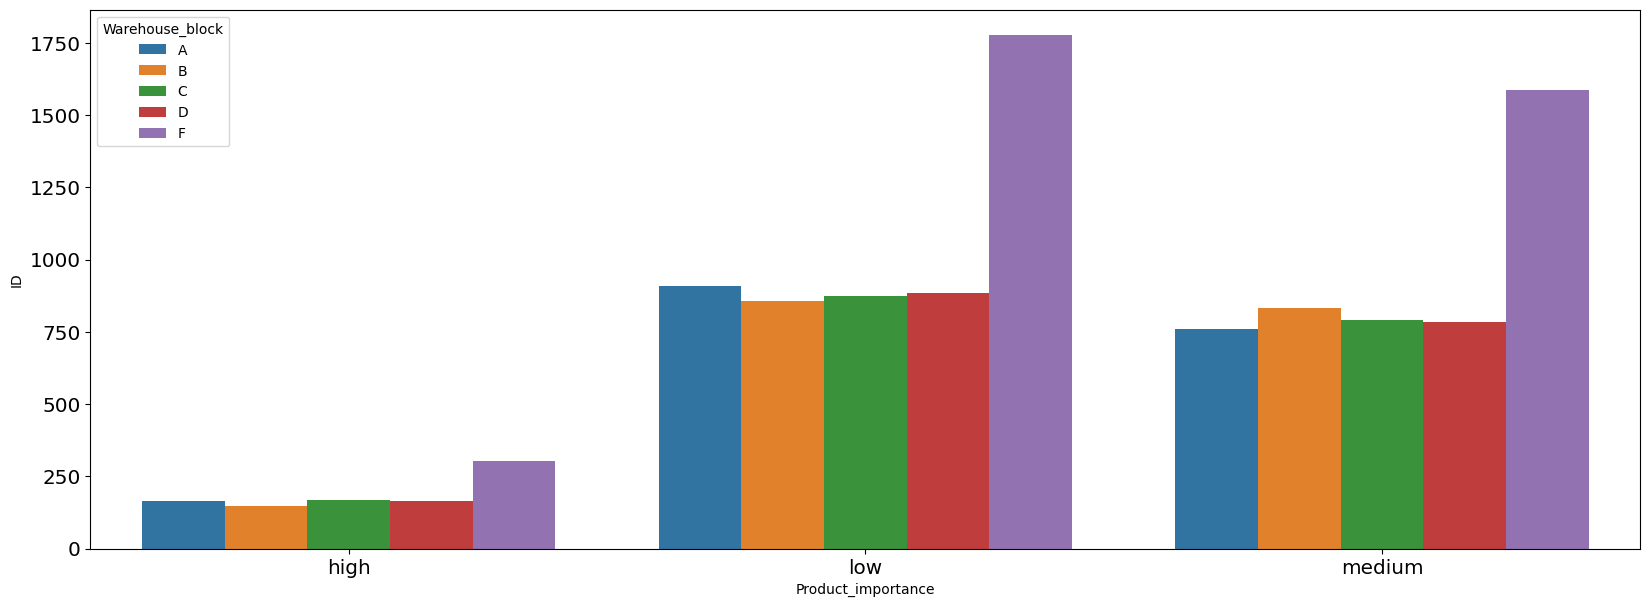

In [83]:
sns.barplot(data = PIWB, hue='Warehouse_block', x= 'Product_importance', y='ID')
plt.show()

In [84]:
WBMS= df.groupby(['Warehouse_block', 'Mode_of_Shipment']).agg({'ID':'count'}).reset_index()
WBMS

Warehouse_block Mode_of_Shipment    ID
0                A           Flight   297
1                A             Road   294
2                A             Ship  1242
3                B           Flight   296
4                B             Road   294
5                B             Ship  1243
6                C           Flight   295
7                C             Road   294
8                C             Ship  1244
9                D           Flight   297
10               D             Road   292
11               D             Ship  1245
12               F           Flight   592
13               F             Road   586
14               F             Ship  2488

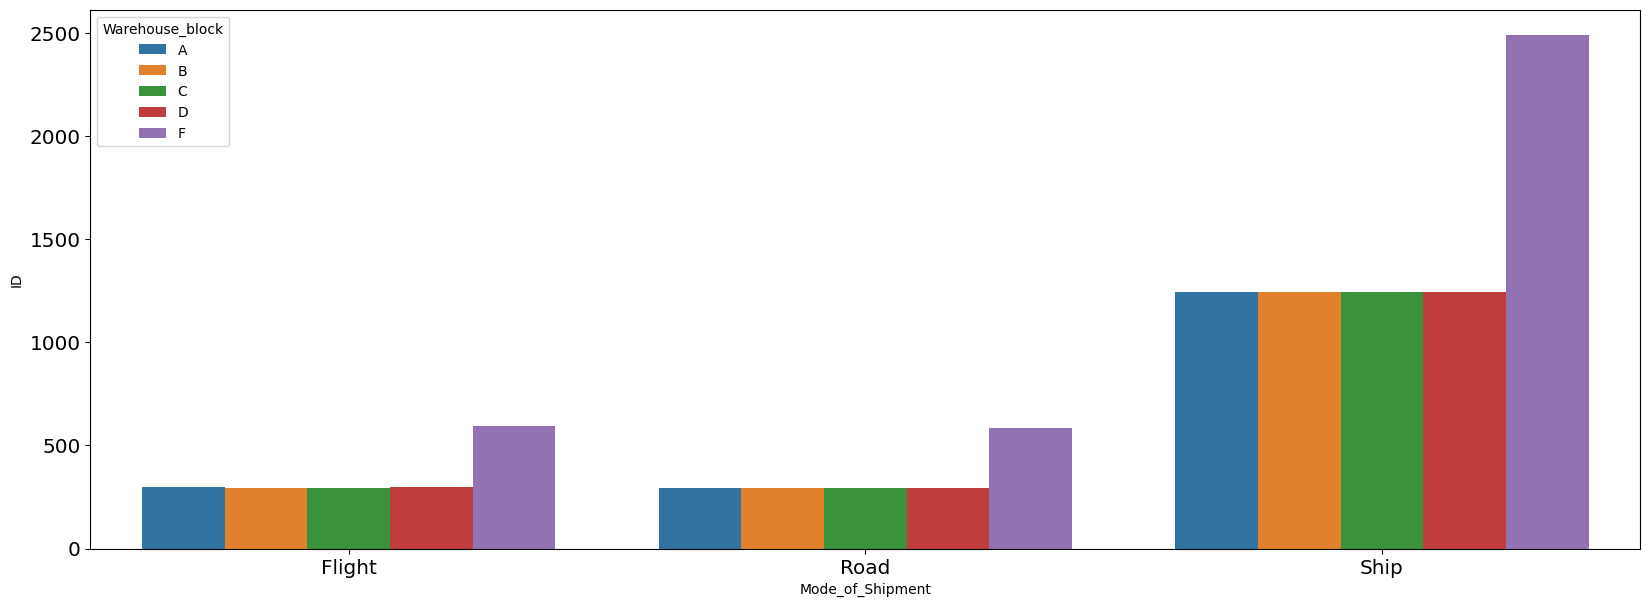

In [85]:
sns.barplot(data = WBMS, hue='Warehouse_block', x= 'Mode_of_Shipment', y='ID')
plt.show()

<Figure size 1500x1500 with 0 Axes>

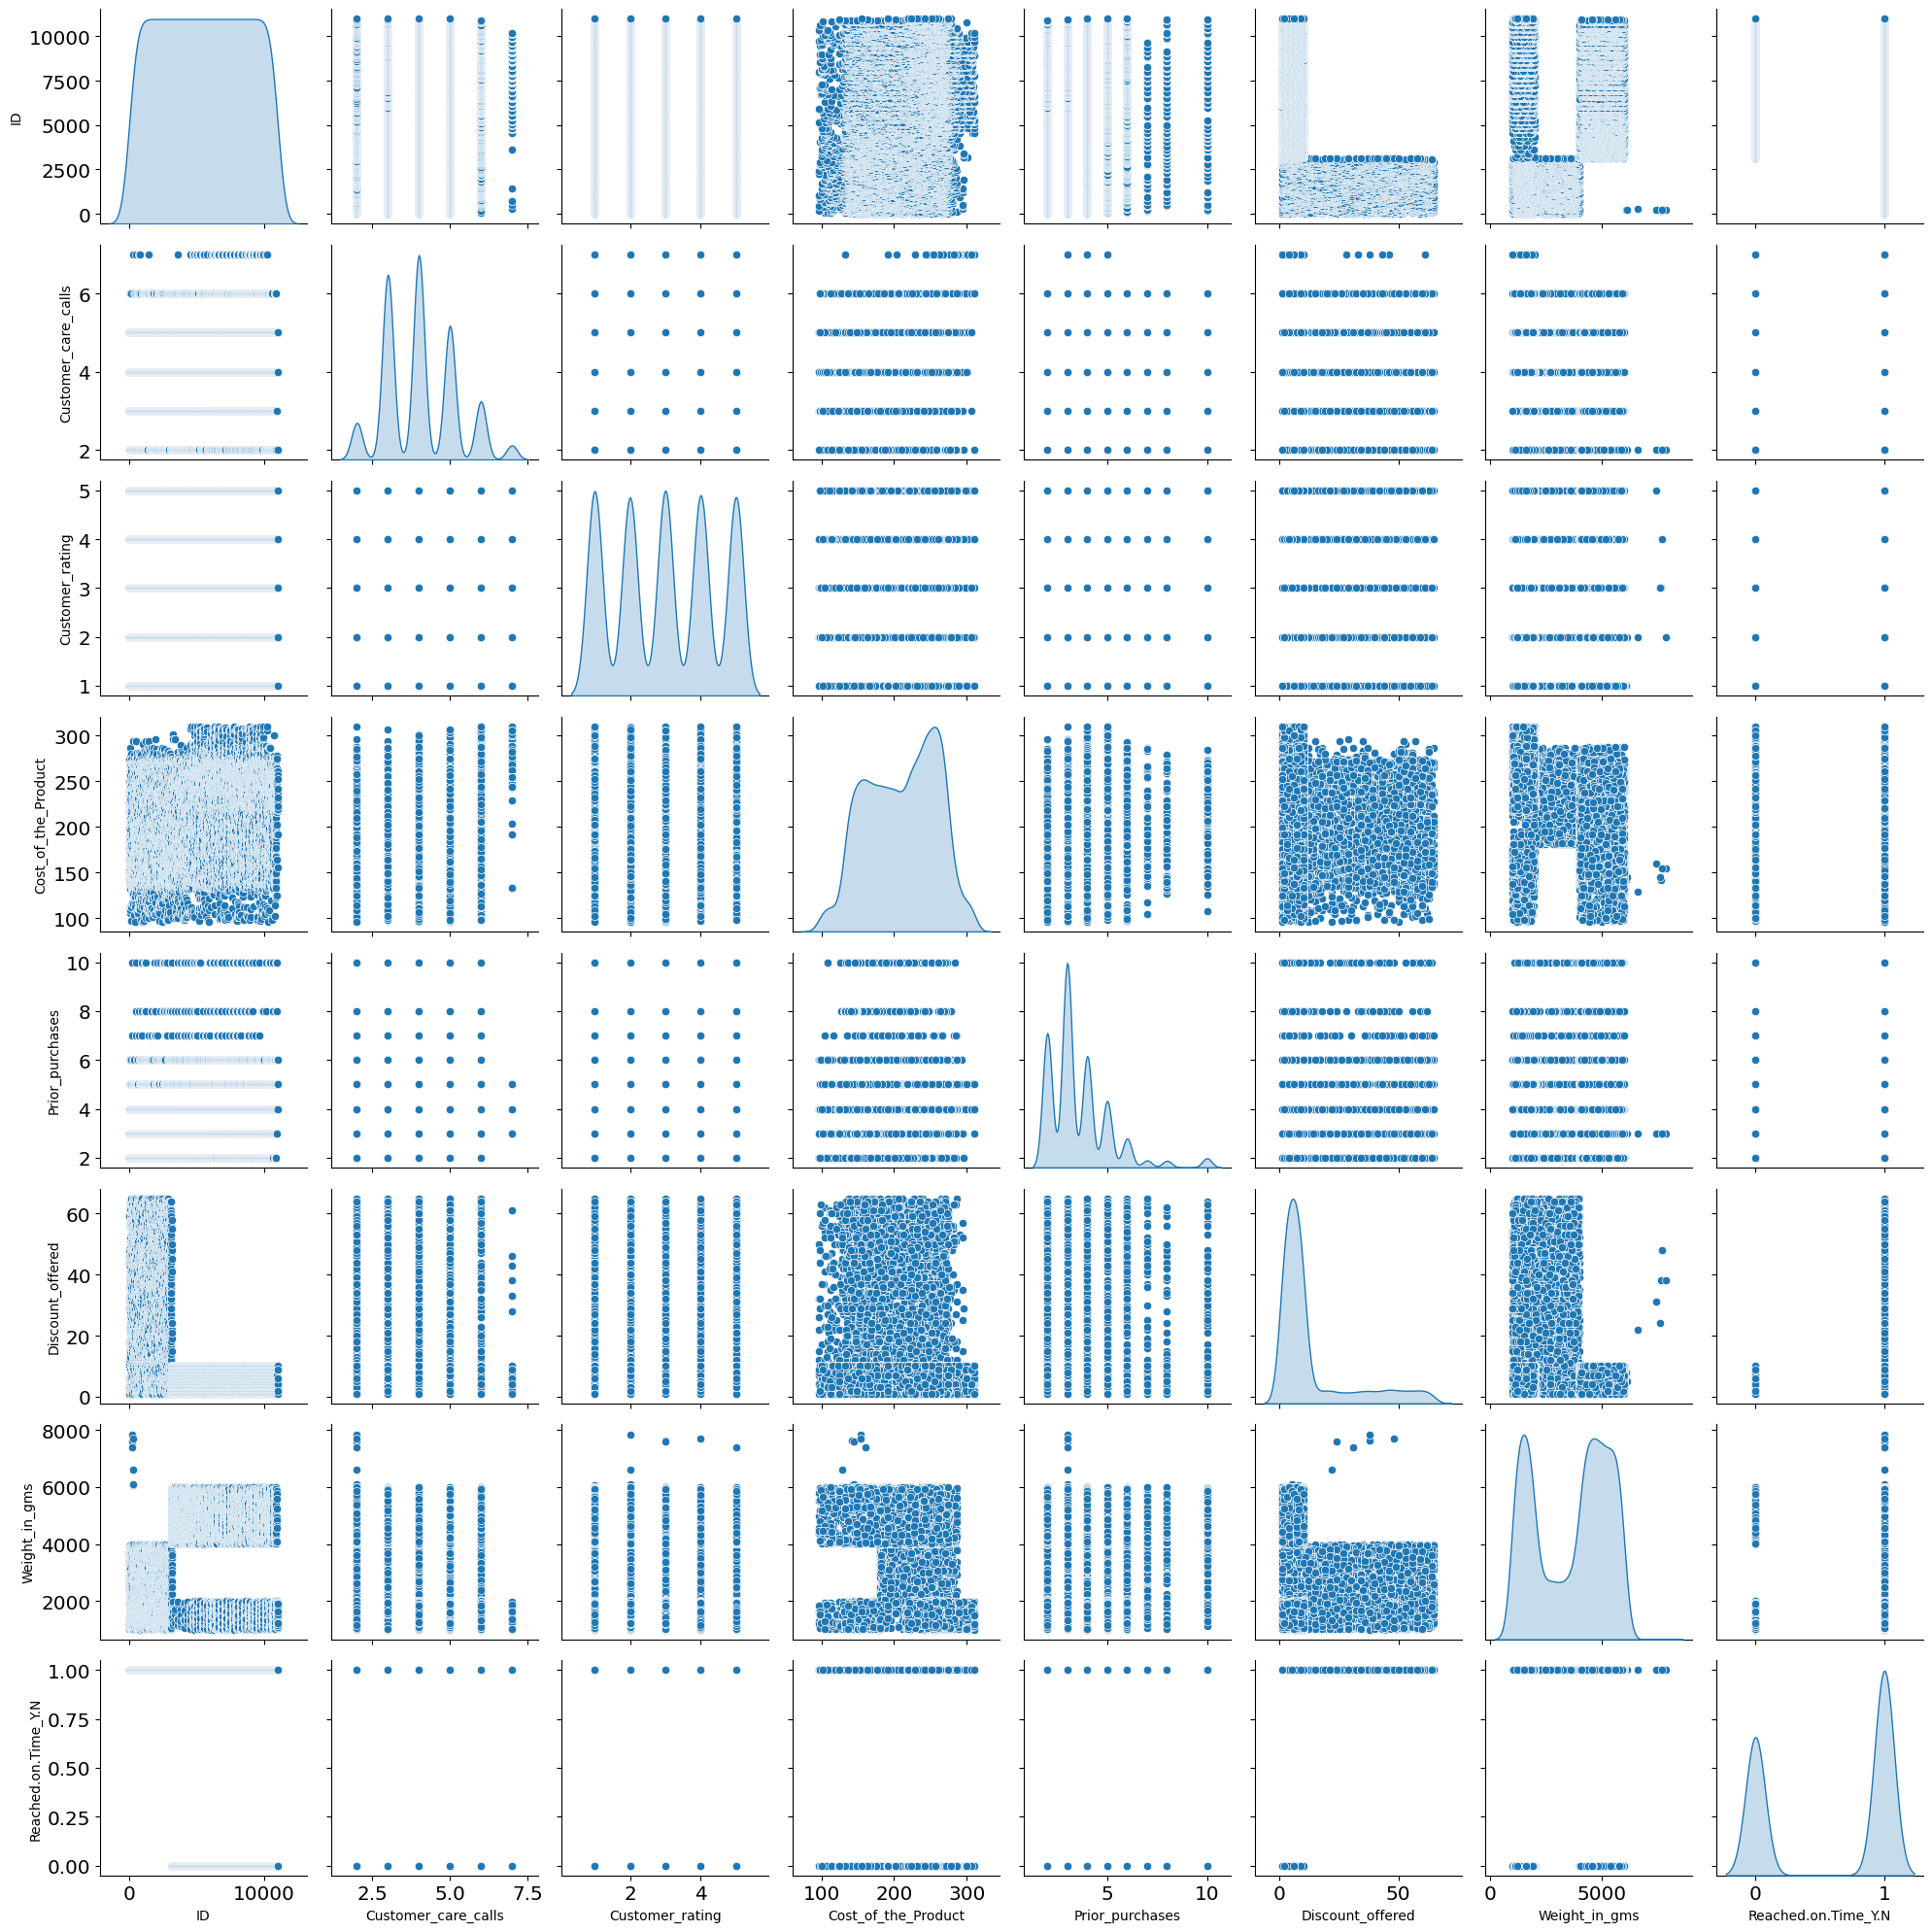

In [86]:
plt.figure(figsize=(15,15))
sns.pairplot(df,  diag_kind='kde')
plt.tight_layout()

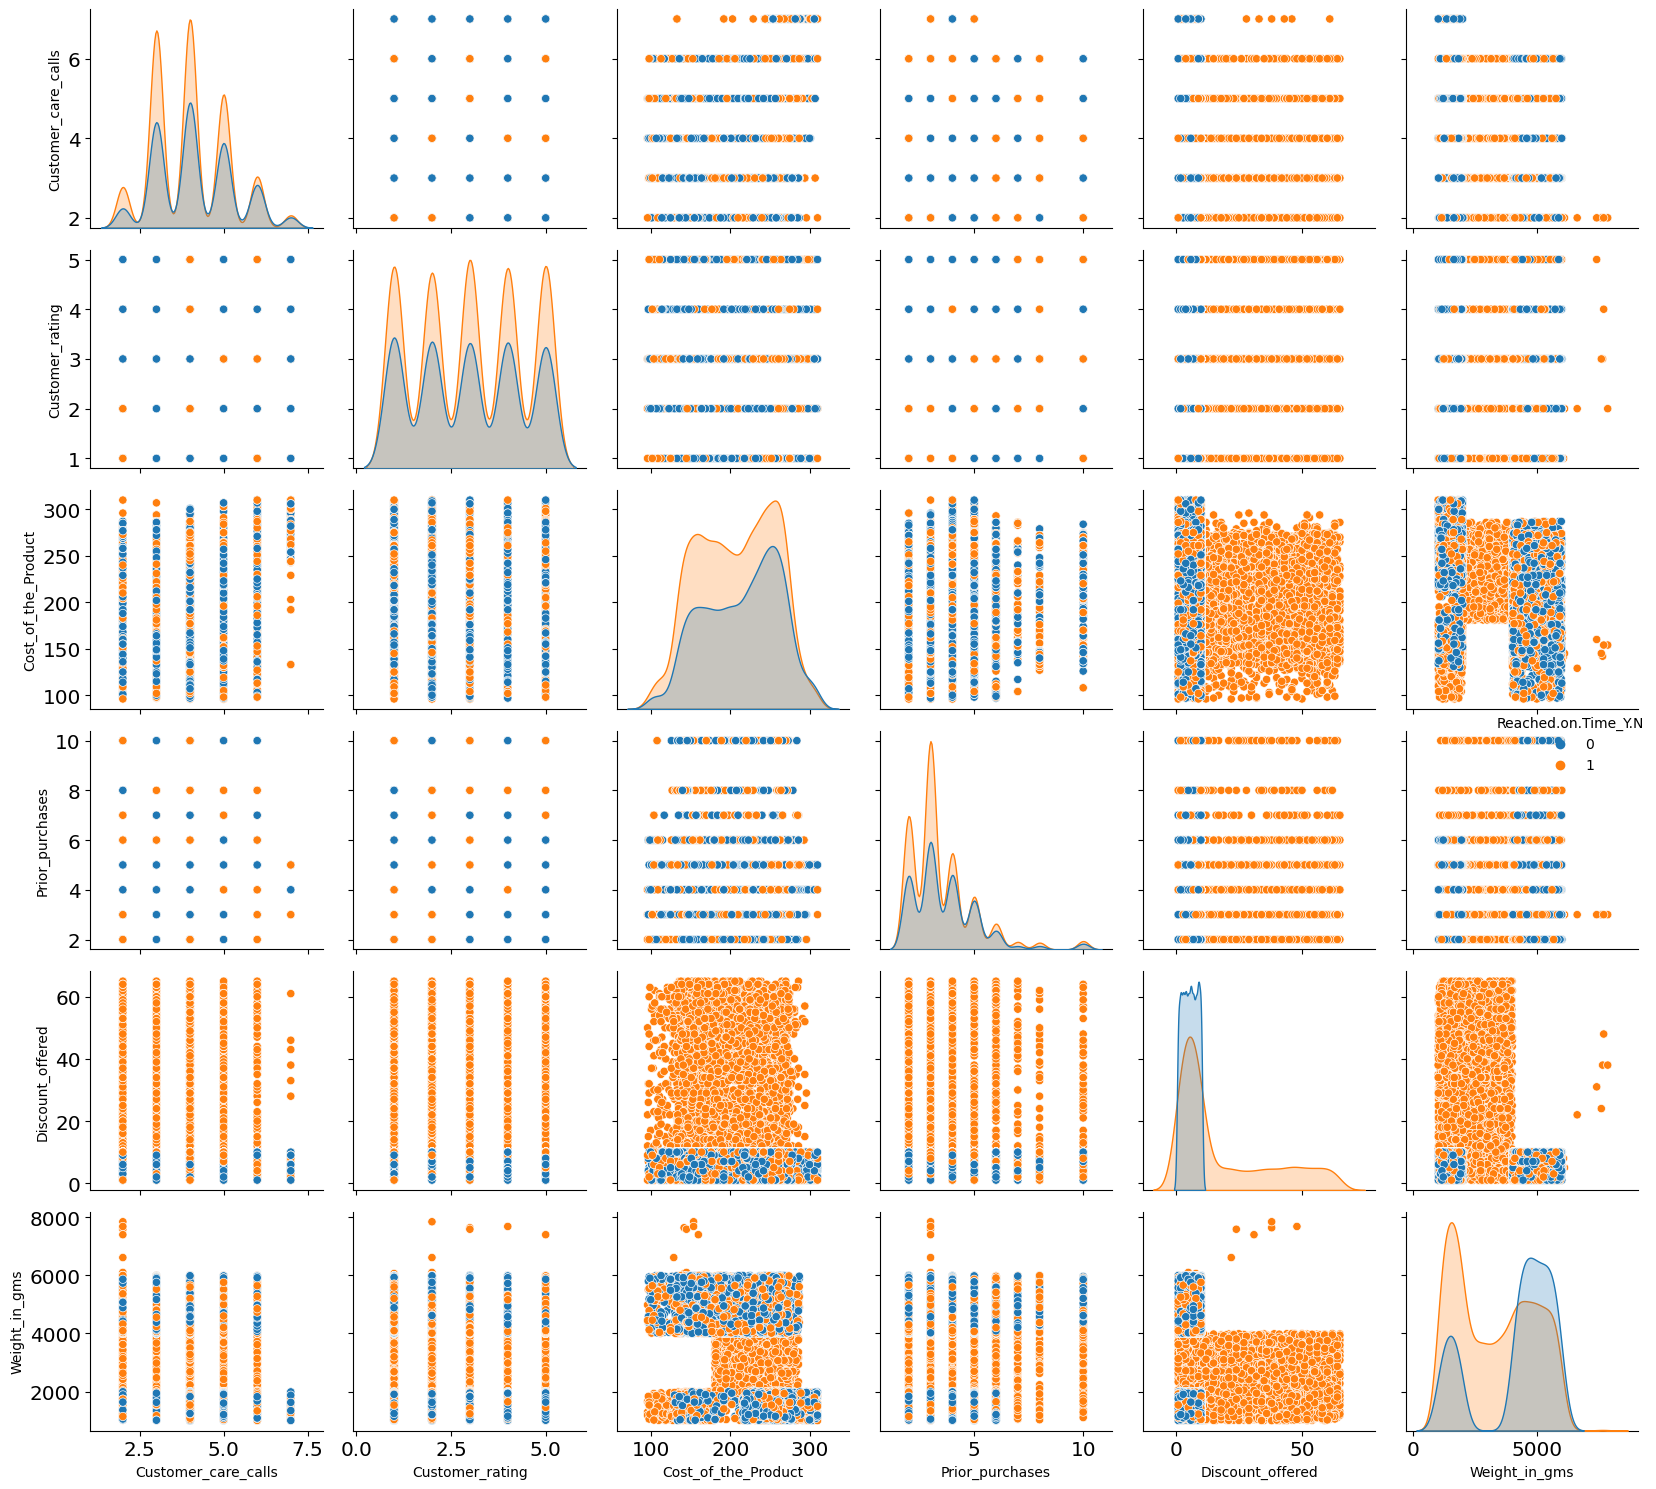

In [87]:
sns.pairplot(df[nums], diag_kind = 'kde', hue='Reached.on.Time_Y.N')
plt.tight_layout()

Dari kumpulan grafik diatas, ada beberapa grafik yang terlihat menarik, diantaranya:
- Hubungan antara **Reached.on.time** dengan **Discount_offered**, terlihat sebagian besar data berada pada nilai Reached.on.time 1 yang artinya terlambat dan hanya barang yang di discount dibawah sekitar 10% yang tidak mengalami keterlambatan
- **Weight_in_gms** dengan **Discount_offered**, dimana terlihat barang-barang yang diberi discount kebanyakan dibawah beban 4000, dan beban pada 4001-6000 hanya mendapat discount maksimal 10% padahal memiliki frekuensi (jumlah barang) yang paling tinggi
- **Weight_in_gms**, **Reached.on.time**, dan **Cost_of_the_Product**. Pada area sekitar median **Weight_in_gms** dimana memiliki frekuensi terendah, data **Reached.on.time** tercatat terlambat semua dan data **Cost_of_the_Product** relatif sangat tinggi

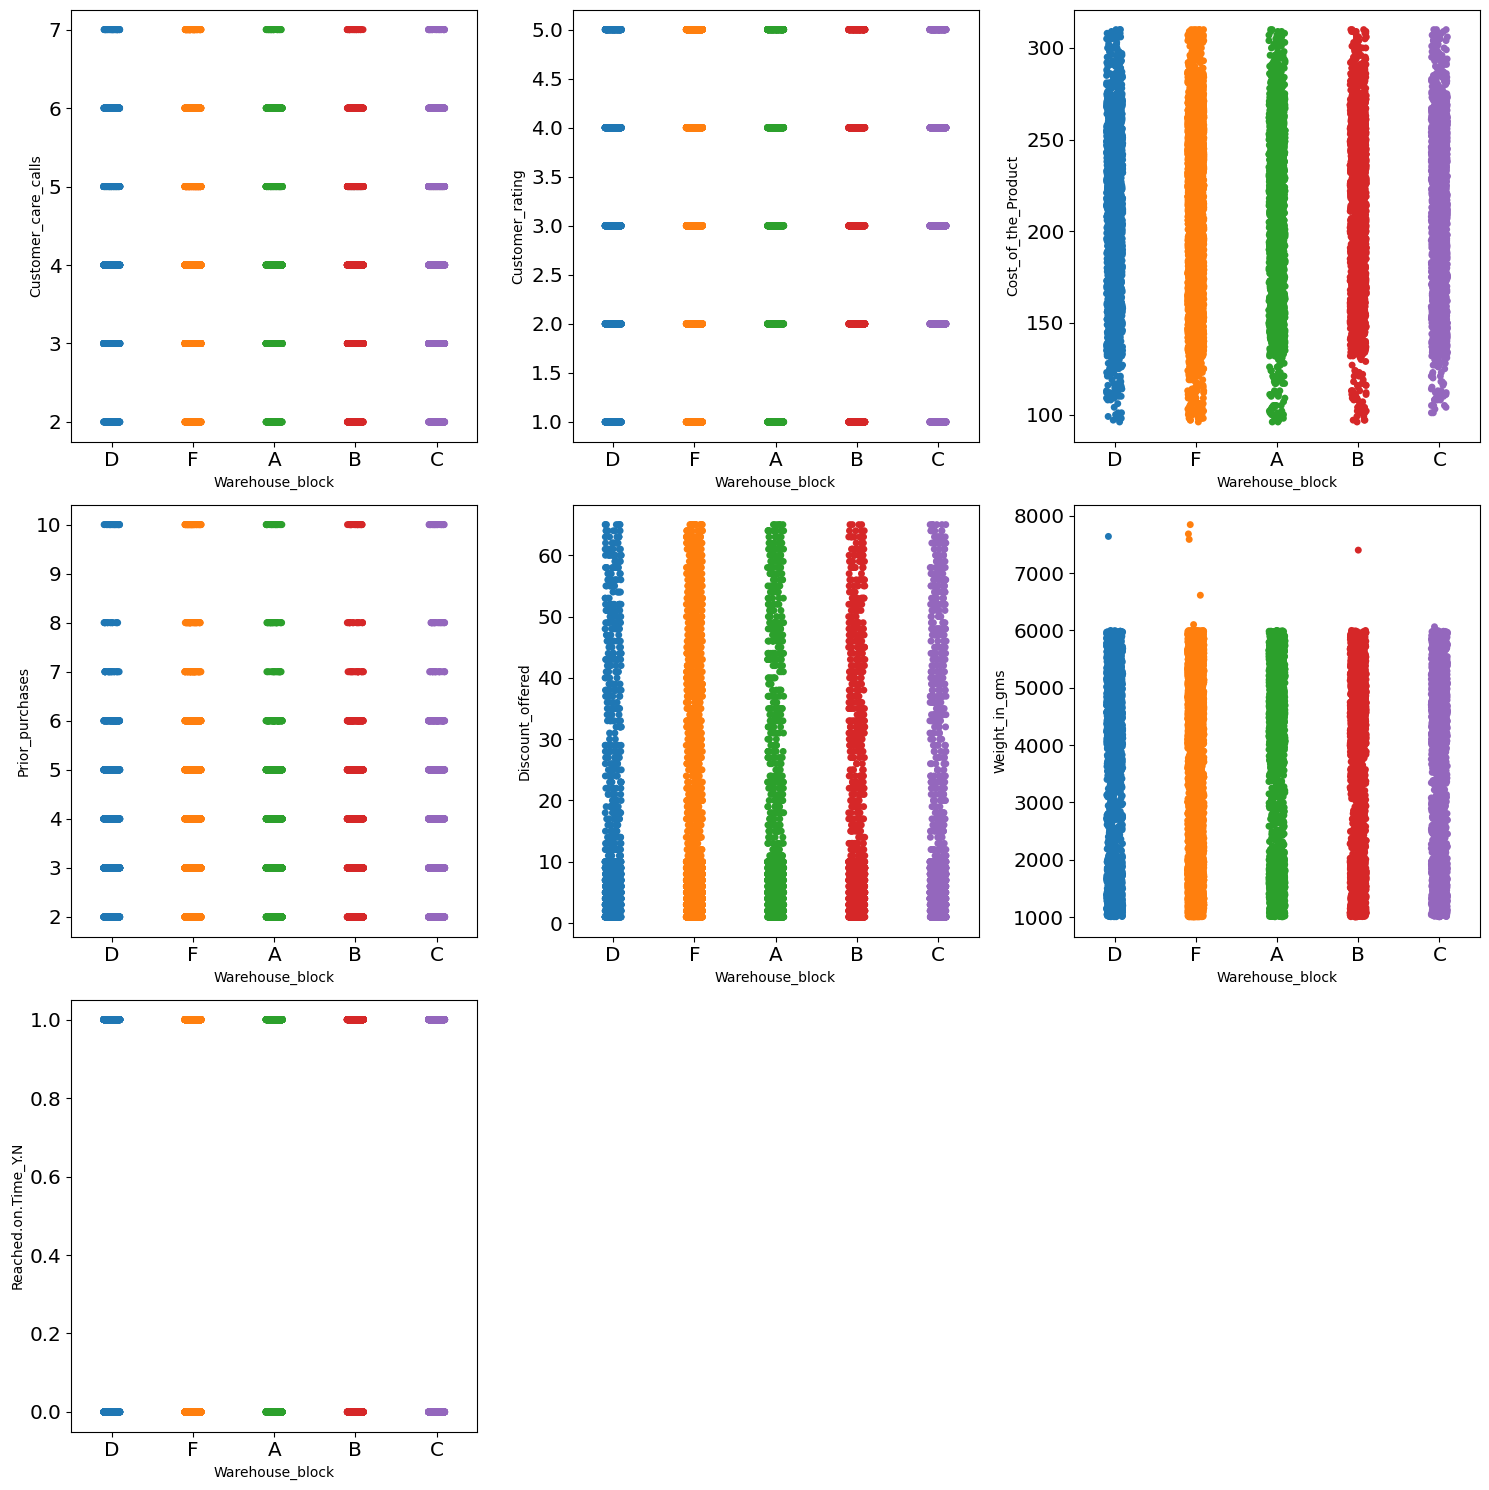

In [88]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=df, x='Warehouse_block', y=nums[i])
    plt.tight_layout()

Dari diagram diatas, beberapa kesimpulan yang dapat diambil:
- Outlier pada hubungan antara **Weight_in_gms** dengan **Warehouse_block** berada pada warehouse E, D, dan B

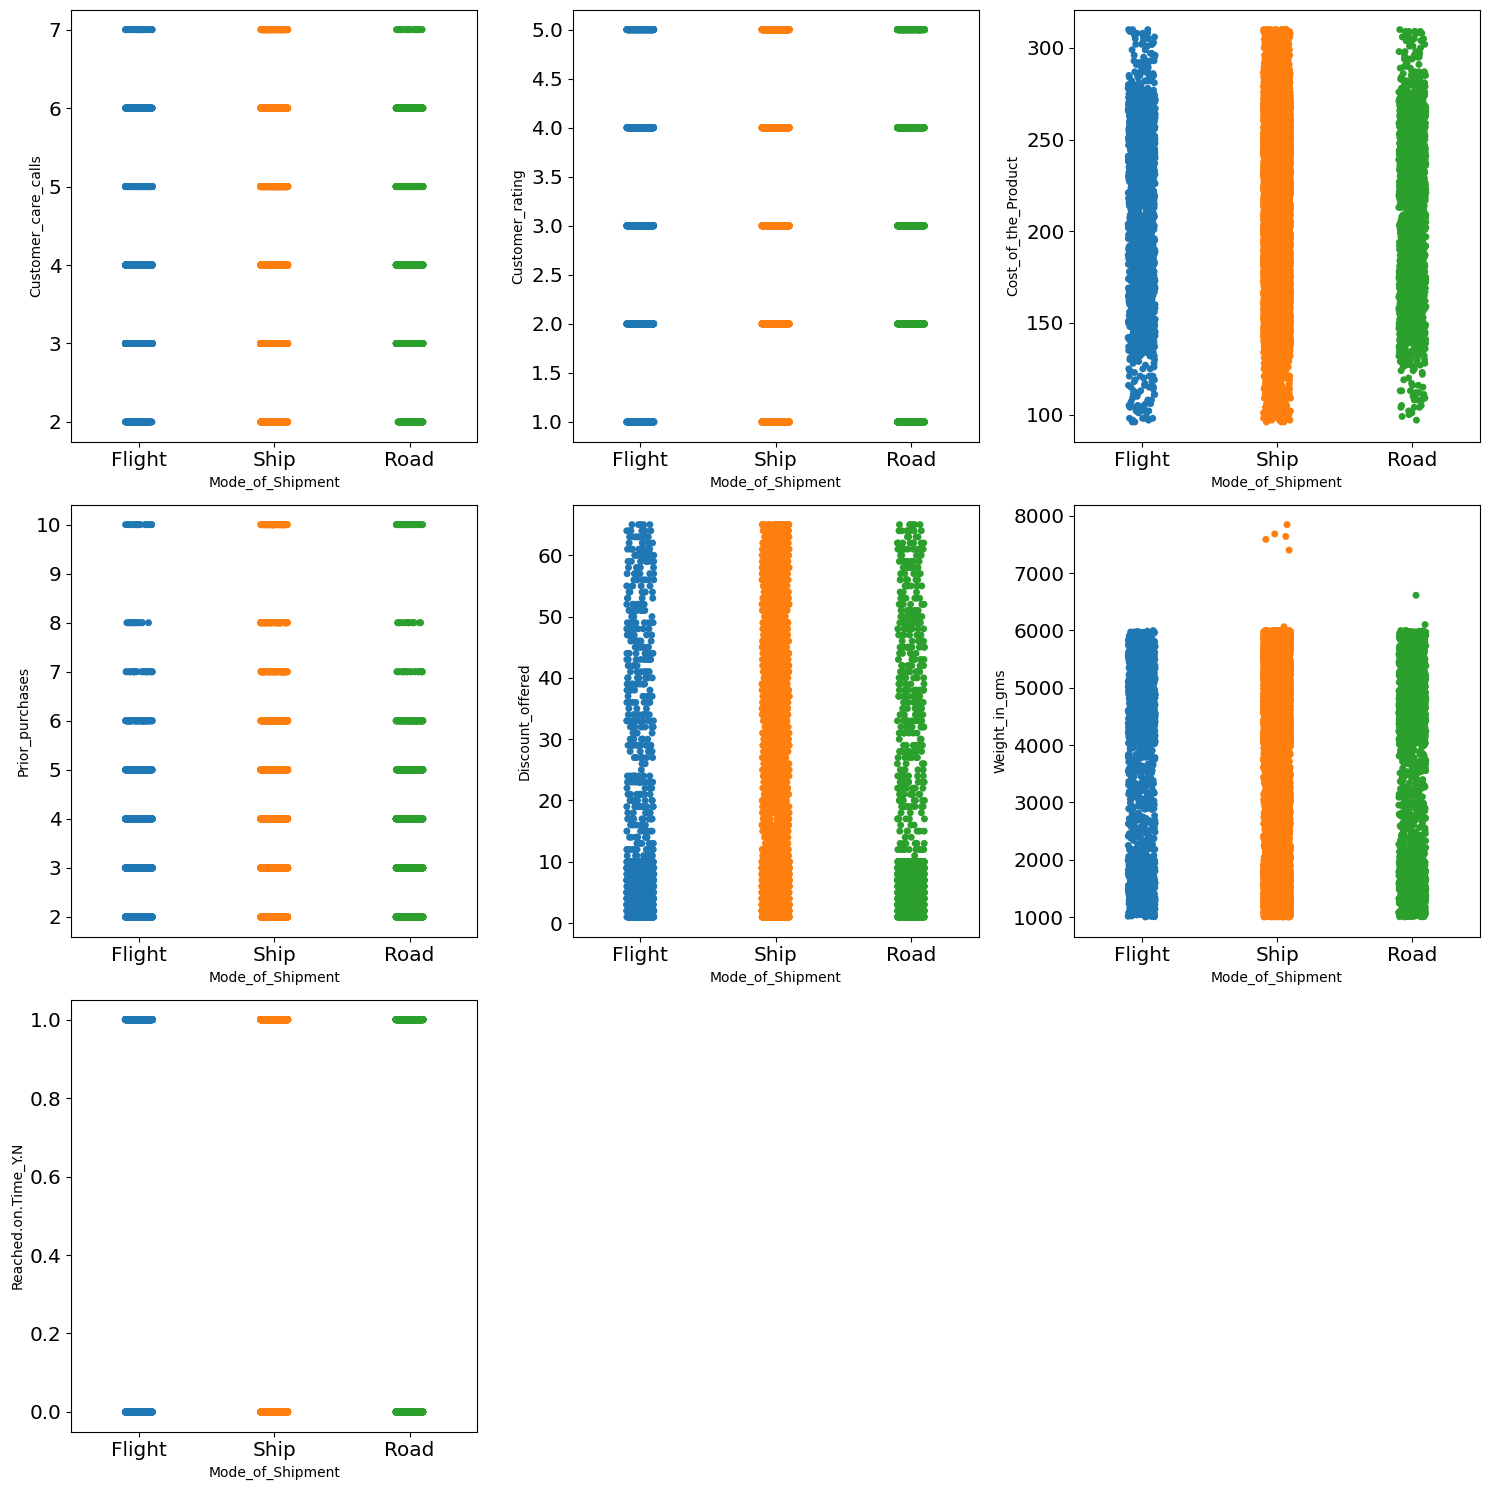

In [89]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=df, x='Mode_of_Shipment', y=nums[i])
    plt.tight_layout()

Sebaran data **Mode_of_shipment** dengan **discount_offered** dan **cost_of_the_product** terpusat pada kategori Ship, namun ini dapat dimaklumi mengingat kategori ship memiliki jumlah data yang jauh lebih tinggi dibanding yang lain

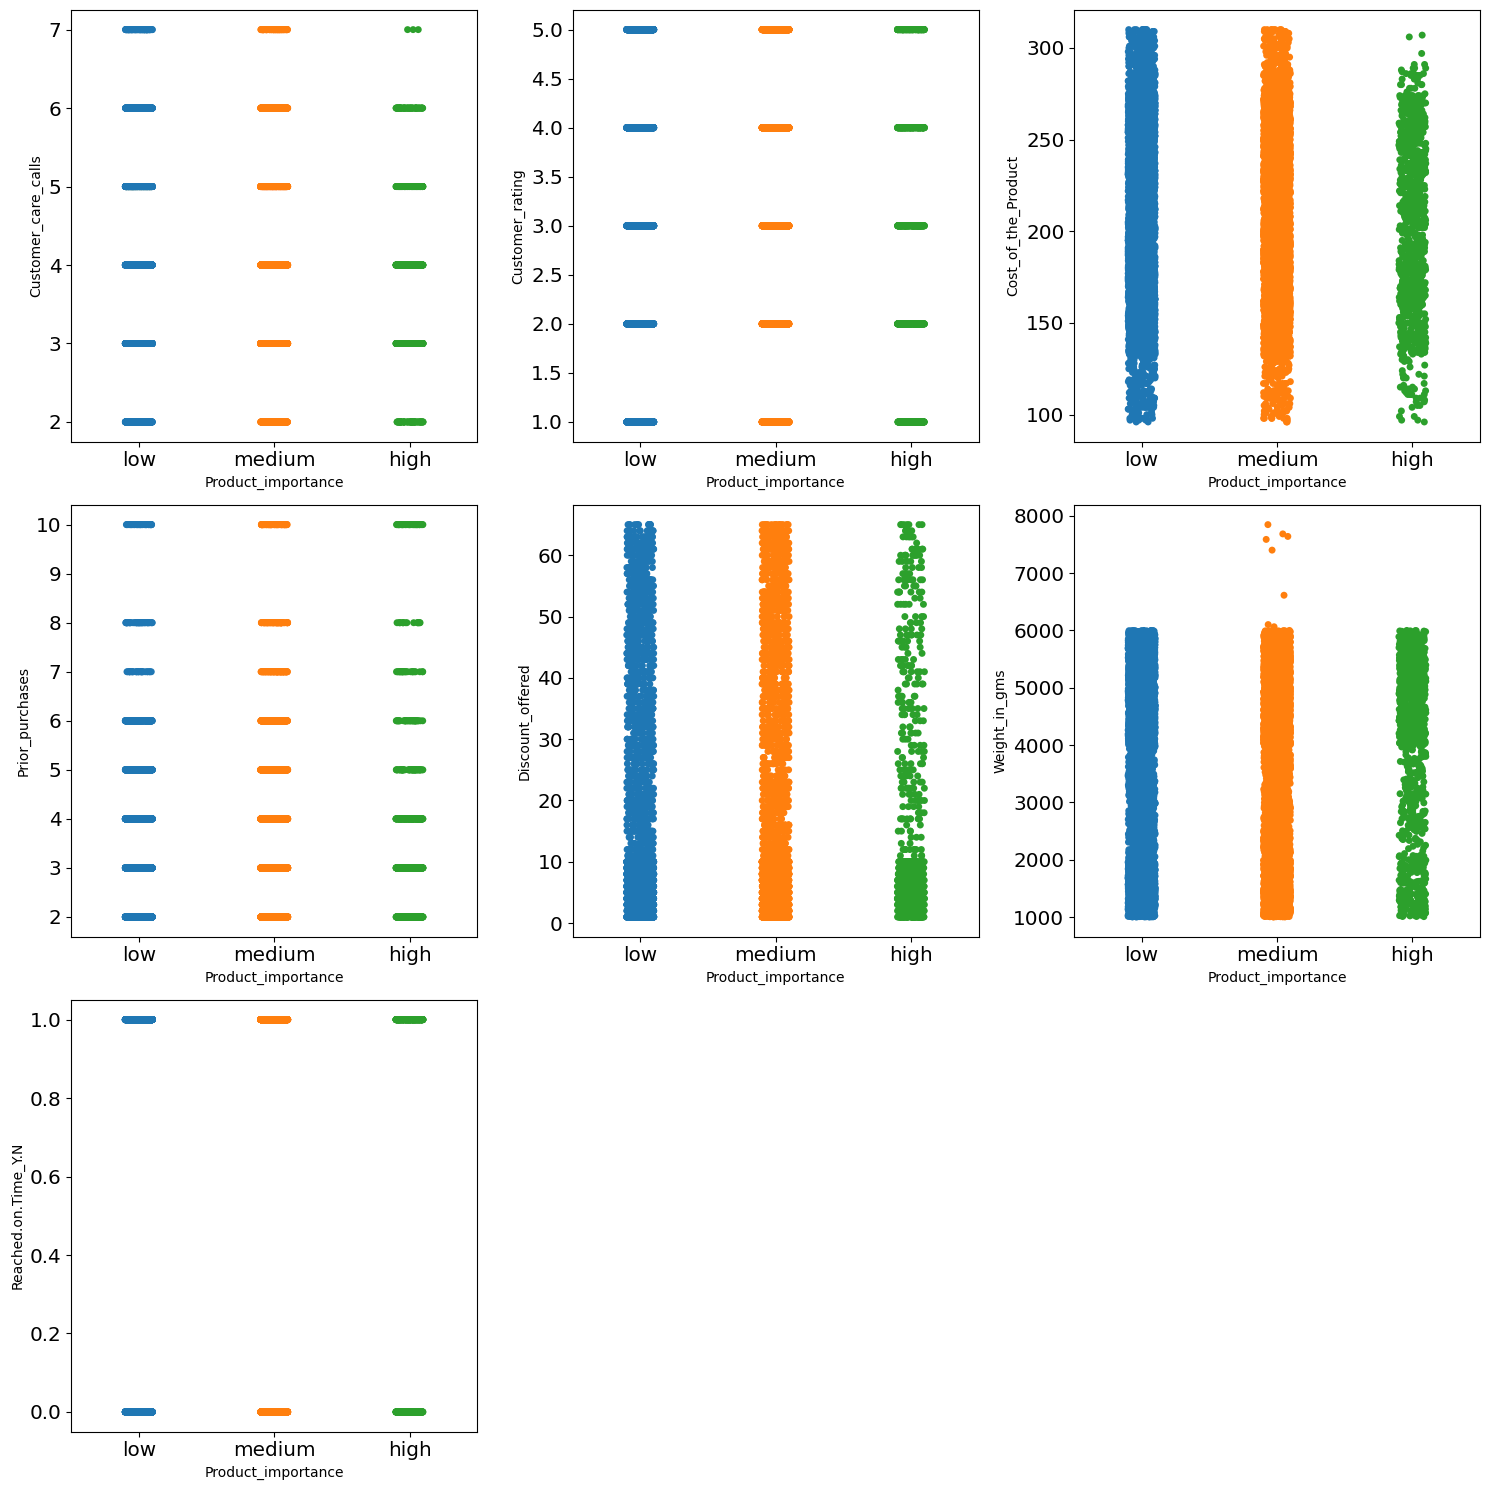

In [90]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    sns.stripplot(data=df, x='Product_importance', y=nums[i])
    plt.tight_layout()

- Semua outlier pada **Weight_in_gms** berada di kategori medium dari **Product_importance**
- **Product_importance** high memiliki panggilan **customer_calls** yang lebih sedikit dibanding medium dan low

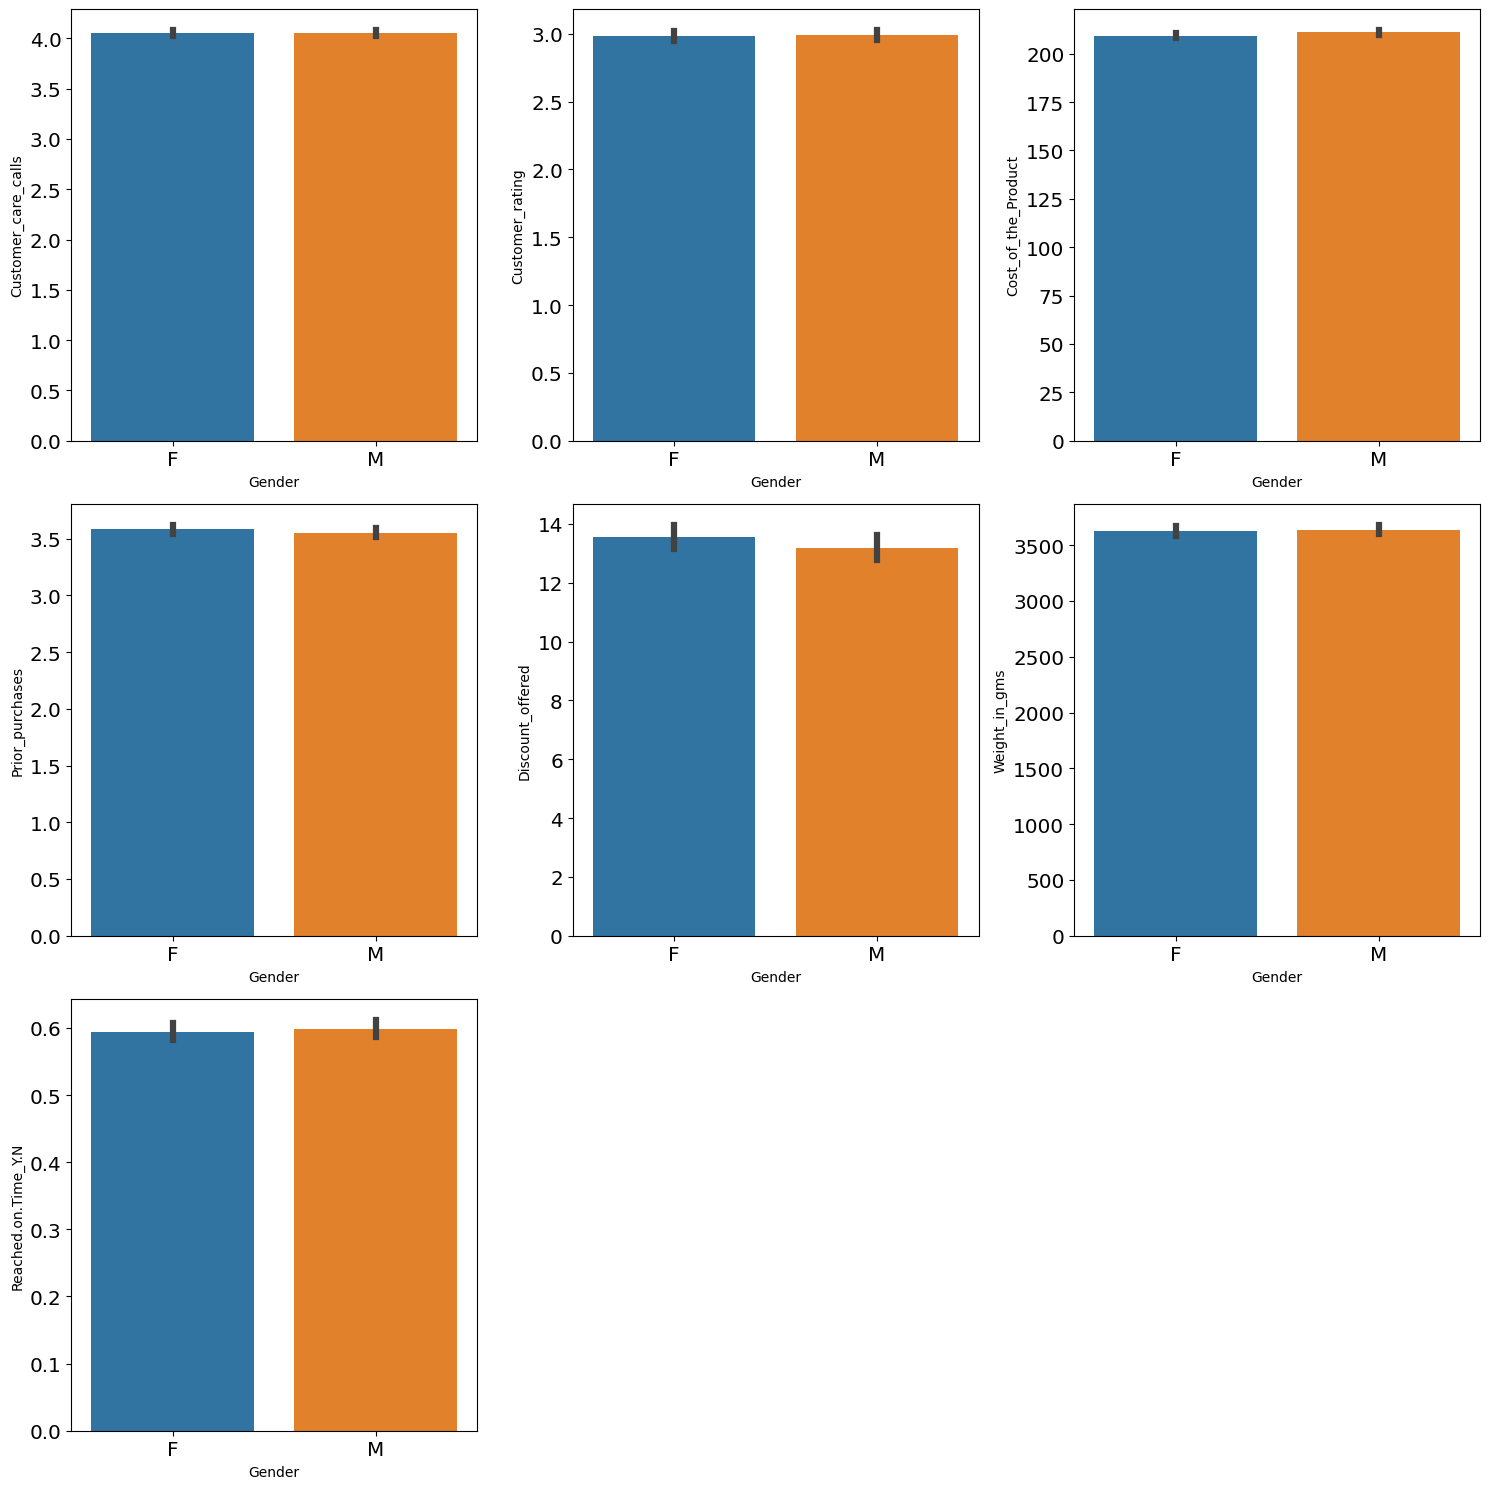

In [91]:
plt.figure(figsize=(15,15))
for i in range(len(nums)):
    plt.subplot(3, 3, i+1)
    #sns.stripplot(data=df, x='Gender', y=nums[i])
    sns.barplot(data=df, x='Gender', y=nums[i], )
    plt.tight_layout()

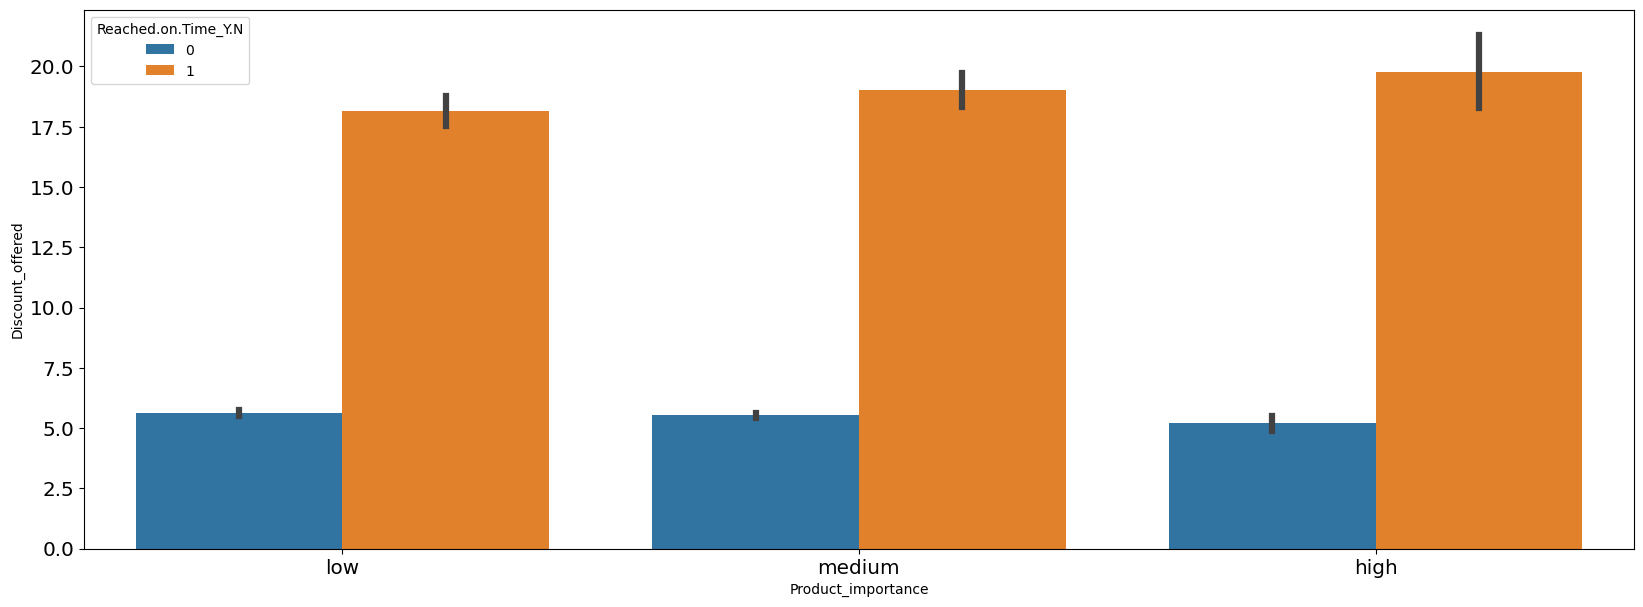

In [92]:
#Hubungan discount, product importance dengan ketepatan waktu
#hue='Reached.on.Time_Y.N' 'Product_importance'
sns.barplot(data=df, x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N')
plt.show()

- Dapat dilihat bahwa tidak peduli tingkat kepentingan produknya, hanya discount maksimum 5% yang dapat diantar tepat waktu, selebihnya datang terlambat
- Produk dengan kepentingan High memiliki discount yang sedikit lebih tinggi dibanding yang lain

# Data Preprocessing

Step:
1. Split train & test 
2. Handling Outlier (Winsorize di **Discount_offered** dan IQR di **Prior_purchases**)
3. Feature Scaling (normalisasi MinMaxScaler)
4. Encoding
5. Cek Class Imbalance

### Missing Value dan Duplicate

In [93]:
# Cek Missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [94]:
# Cek Duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat

## Split data & Pembenaran Value Warehouse_block

In [95]:
X = df.copy().drop(['Reached.on.Time_Y.N', 'ID'], axis=1)
Y = df['Reached.on.Time_Y.N'].copy()

In [96]:
X['Warehouse_block'] = X['Warehouse_block'].replace('F', 'E')
X

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0                   D           Flight                    4                2   
1                   E           Flight                    4                5   
2                   A           Flight                    2                2   
3                   B           Flight                    3                3   
4                   C           Flight                    2                2   
...               ...              ...                  ...              ...   
10994               A             Ship                    4                1   
10995               B             Ship                    4                1   
10996               C             Ship                    5                4   
10997               E             Ship                    5                2   
10998               D             Ship                    2                5   

       Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                      177                3                low      F   
1                      216                2                low      M   
2                      183                4                low      M   
3                      176                4             medium      M   
4                      184                3             medium      F   
...                    ...              ...                ...    ...   
10994                  252                5             medium      F   
10995                  232                5             medium      F   
10996                  242                5                low      F   
10997                  223                6             medium      M   
10998                  155                5                low      F   

       Discount_offered  Weight_in_gms  
0                    44           1233  
1                    59           3088  
2                    48           3374  
3                    10           1177  
4                    46           2484  
...                 ...            ...  
10994                 1           1538  
10995                 6           1247  
10996                 4           1155  
10997                 2           1210  
10998                 6           1639  

[10999 rows x 10 columns]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 19, test_size = 0.2, stratify = Y)

In [98]:
print('jumlah x train: ', len(X_train))
print('Jumlah y train: ', len(y_train))
print('jumlah x test: ', len(X_test))
print('Jumlah y test: ', len(y_test))

jumlah x train:  8799
Jumlah y train:  8799
jumlah x test:  2200
Jumlah y test:  2200


## Outliers

In [99]:
# Penghapusan outlier berdasar IQR

Q1 = X_train['Prior_purchases'].quantile(0.25)
Q3 = X_train['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((X_train['Prior_purchases'] >= low_limit) & 
                    (X_train['Prior_purchases'] <= high_limit))
X_train = X_train[filtered_entries]
y_train = y_train[filtered_entries]
print('jumlah x train: ', len(X_train))
print('Jumlah y train: ', len(y_train))

jumlah x train:  8013
Jumlah y train:  8013


<AxesSubplot:ylabel='Discount_offered'>

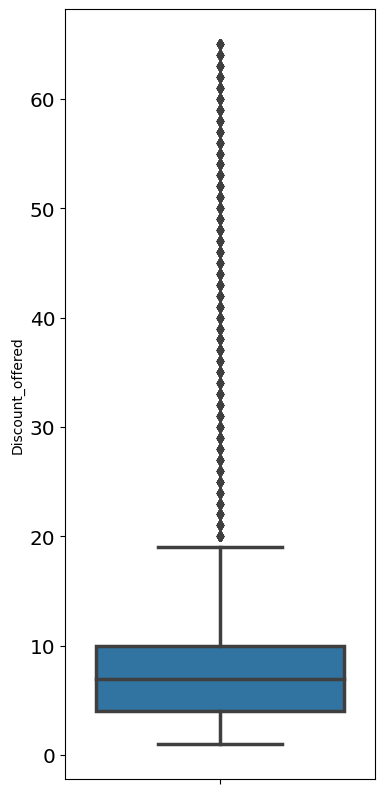

In [100]:
# Penghapusan outliers Discount_offered
plt.figure(figsize=(4,10))
sns.boxplot(y=X_train['Discount_offered'])

Karena outlier dapat dibilang sangat banyak dan memiliki korelasi kuat dengan feature target, maka tidak akan dilakukan penghapusan karena akan menghilangkan banyak sekali informasi

Sebagai gantinya, akan dilakukan **Winsorize** yaitu mengganti extream value dengan nilai quantile 95,
hal ini dilakukan agar machine tetap bisa mempelajari adanya korelasi tanpa merusak model

> Refrensi : [Handle many outliers](https://blog.devgenius.io/too-many-outliers-winsorization-6f120e7e8257)

In [101]:
print('Mean before: ', X_train['Discount_offered'].mean())
X_train['Discount_offered'] = winsorize(X_train['Discount_offered'], 
                                        (0, 0.21))
print('Mean after: ', X_train['Discount_offered'].mean())

Mean before:  13.399975040559092
Mean after:  8.193435667041058


<AxesSubplot:ylabel='Discount_offered'>

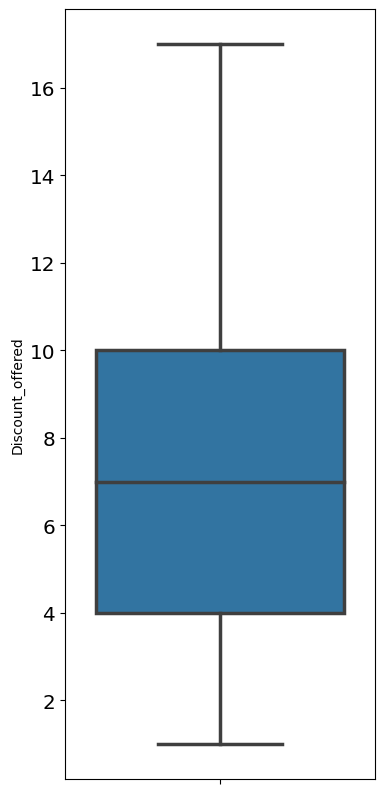

In [102]:
plt.figure(figsize=(4,10))
sns.boxplot(y=X_train['Discount_offered'])

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

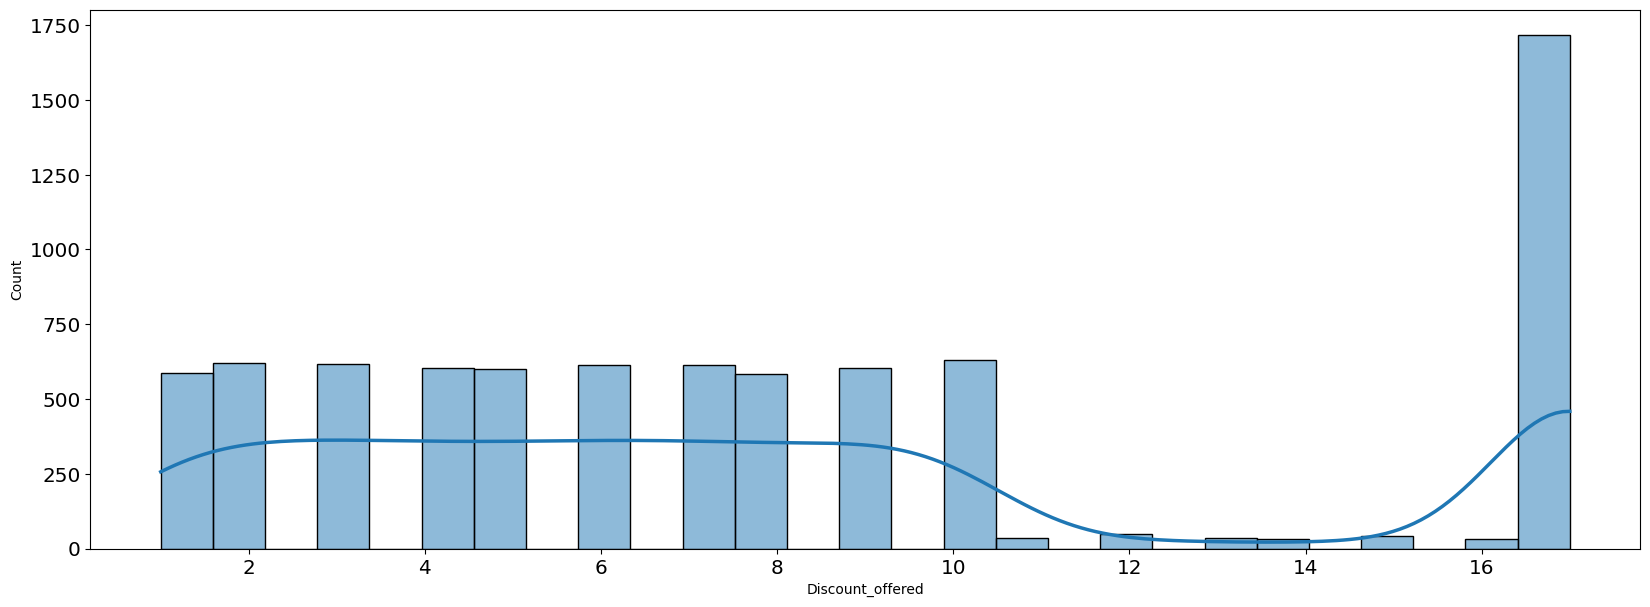

In [103]:
sns.histplot(kde=True, data=X_train['Discount_offered'])

## Feature Scaling

In [104]:
mm = MinMaxScaler()
for col in ['Customer_care_calls', 'Customer_rating', 
            'Cost_of_the_Product', 'Prior_purchases', 
            'Discount_offered', 'Weight_in_gms']:
    scaler = mm.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])
    X[col] = scaler.transform(X[[col]])

In [105]:
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
        'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
X_train[nums].head()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
5933                  0.2             0.00             0.406542   
5177                  0.2             0.25             0.607477   
8406                  0.2             0.00             0.663551   
8731                  0.6             0.25             0.663551   
9754                  0.4             1.00             0.219626   

      Prior_purchases  Discount_offered  Weight_in_gms  
5933         0.000000            0.5625       0.525493  
5177         0.666667            0.4375       0.617093  
8406         0.000000            0.2500       0.489993  
8731         0.000000            0.2500       0.686925  
9754         0.333333            0.0625       0.626004

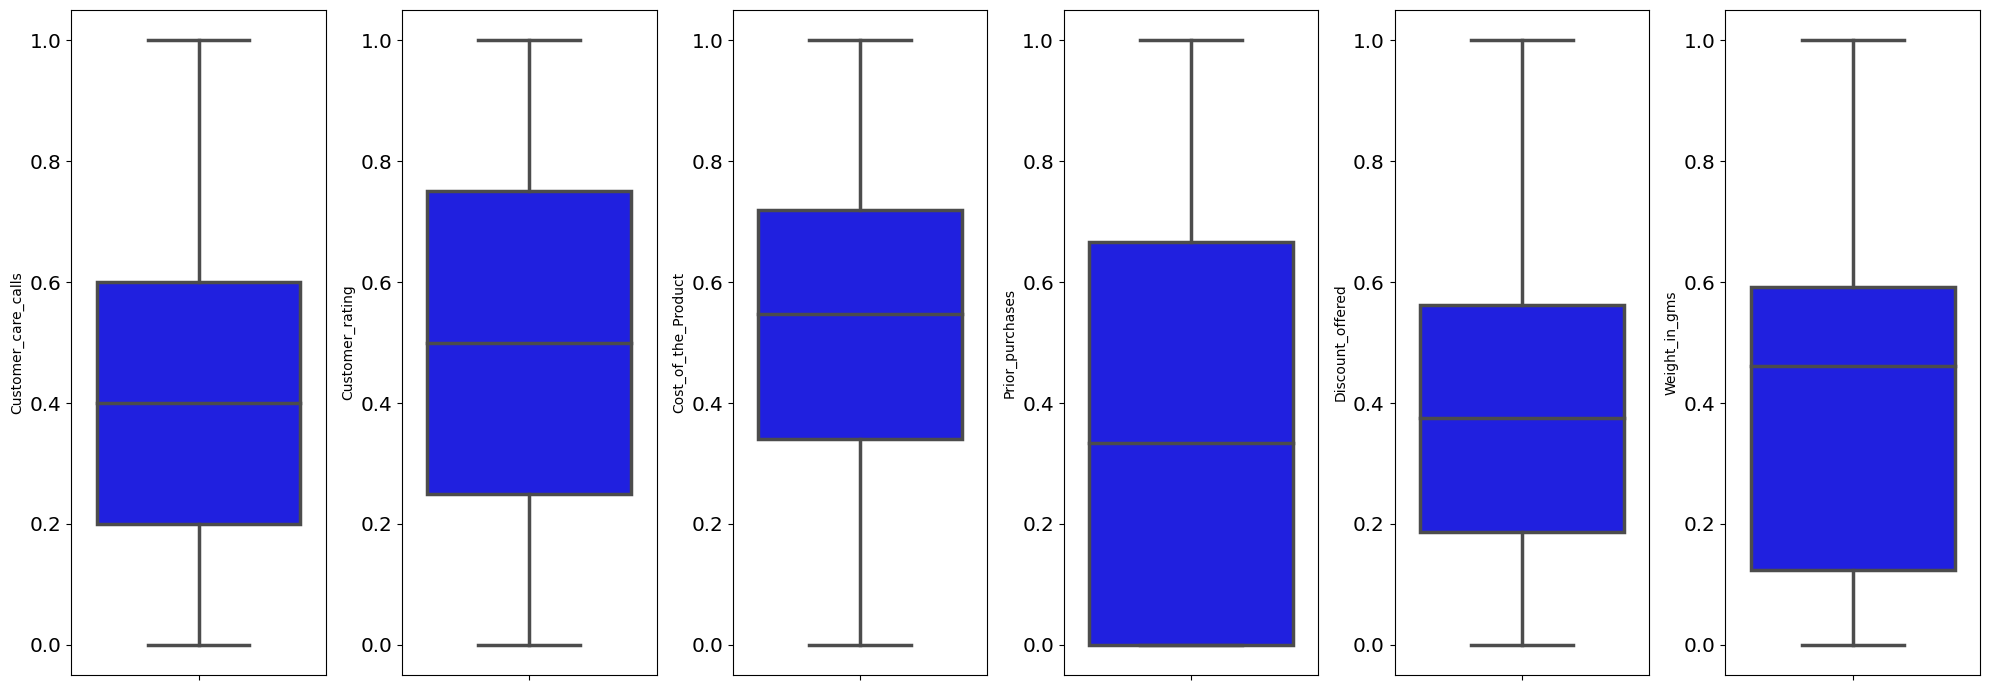

In [106]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=X_train[nums[i]], color='blue', orient='v')
    plt.tight_layout()

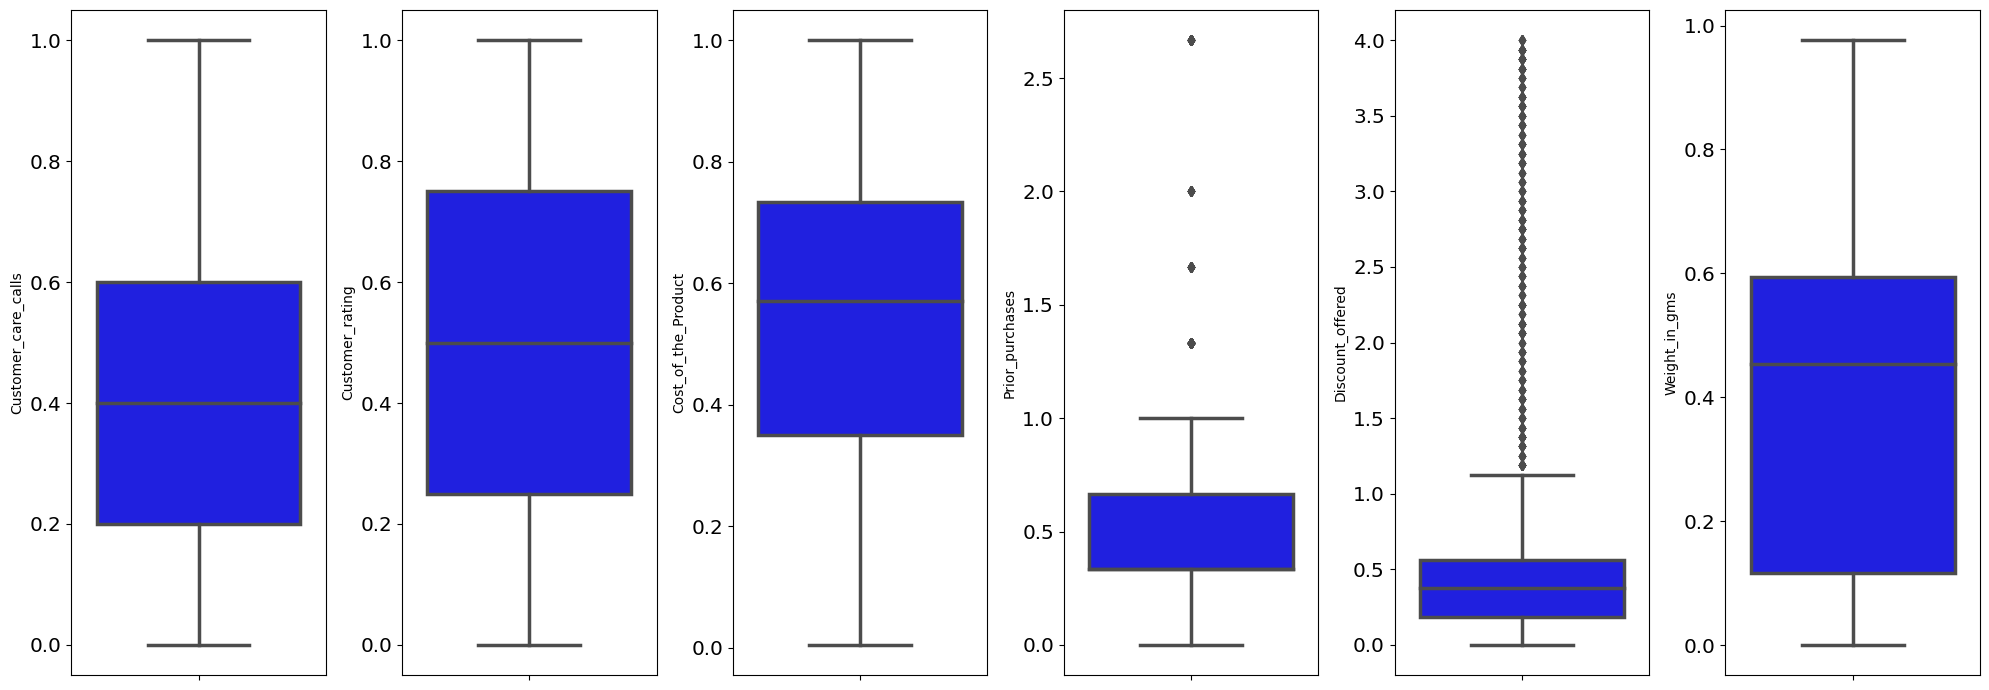

In [107]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=X_test[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [108]:
X_train[nums].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          8013.000000      8013.000000          8013.000000   
mean              0.409809         0.495133             0.531382   
std               0.229020         0.355215             0.225584   
min               0.000000         0.000000             0.000000   
25%               0.200000         0.250000             0.341121   
50%               0.400000         0.500000             0.546729   
75%               0.600000         0.750000             0.719626   
max               1.000000         1.000000             1.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count      8013.000000       8013.000000    8013.000000  
mean          0.403511          0.449590       0.387084  
std           0.324005          0.337457       0.237992  
min           0.000000          0.000000       0.000000  
25%           0.000000          0.187500       0.124324  
50%           0.333333          0.375000       0.461505  
75%           0.666667          0.562500       0.591673  
max           1.000000          1.000000       1.000000

In [109]:
X_test[nums].describe()

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count          2200.000000      2200.000000          2200.000000   
mean              0.411727         0.503750             0.542961   
std               0.232879         0.347574             0.222882   
min               0.000000         0.000000             0.004673   
25%               0.200000         0.250000             0.350467   
50%               0.400000         0.500000             0.570093   
75%               0.600000         0.750000             0.733645   
max               1.000000         1.000000             1.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  
count      2200.000000       2200.000000    2200.000000  
mean          0.541970          0.788977       0.377658  
std           0.538973          1.034041       0.241902  
min           0.000000          0.000000       0.000292  
25%           0.333333          0.187500       0.116983  
50%           0.333333          0.375000       0.453543  
75%           0.666667          0.562500       0.593572  
max           2.666667          4.000000       0.976333

## Feature Encoding

In [110]:
#Label Encoding
mapping_prod_imp = {
    'low': 0,
    'medium': 1,
    'high': 2
}
X_train['Product_importance'] = X_train['Product_importance'].map(mapping_prod_imp)
X_test['Product_importance'] = X_test['Product_importance'].map(mapping_prod_imp)
X['Product_importance'] = X['Product_importance'].map(mapping_prod_imp)

In [111]:
# One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X = pd.get_dummies(X)

## Cek Class Imbalance

In [112]:
percentage = y_train.value_counts() / len(y_train) * 100
percentage

1    59.740422
0    40.259578
Name: Reached.on.Time_Y.N, dtype: float64

Berdasar hasil pengecekan kelas target diatas, perbandingan nilai yang ada berada dikisaran 40% - 60% sehingga dapat dianggap normal / **Tidak** imbalance

### Cek Bentuk Data

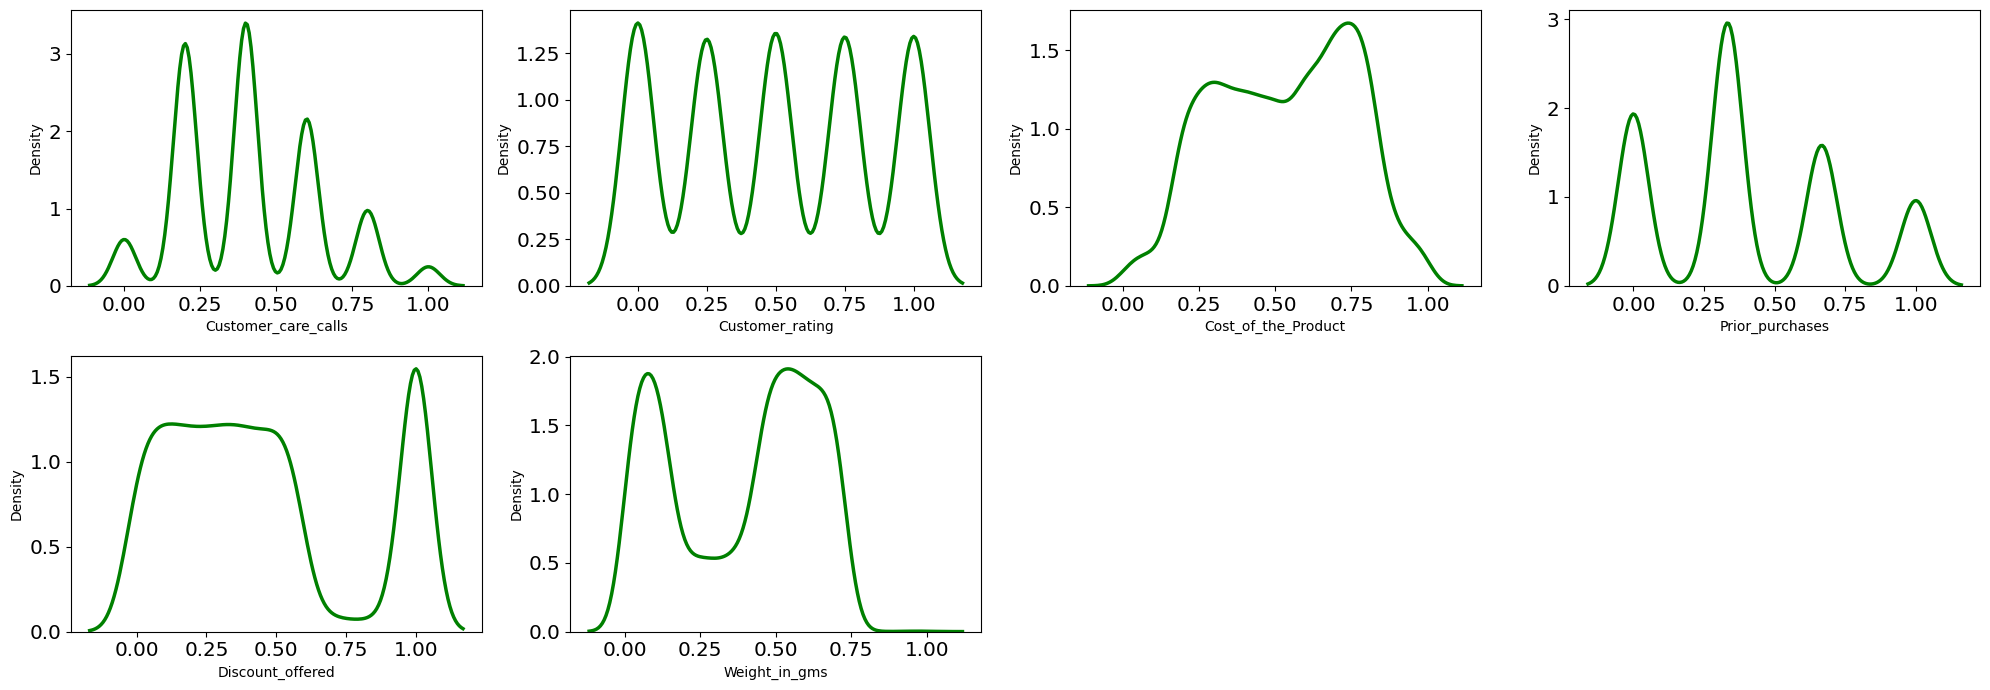

In [113]:
numerical = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for i in range(0, len(numerical)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.kdeplot(x=X_train[numerical[i]], color = 'green')
  plt.xlabel(numerical[i])
  plt.tight_layout()

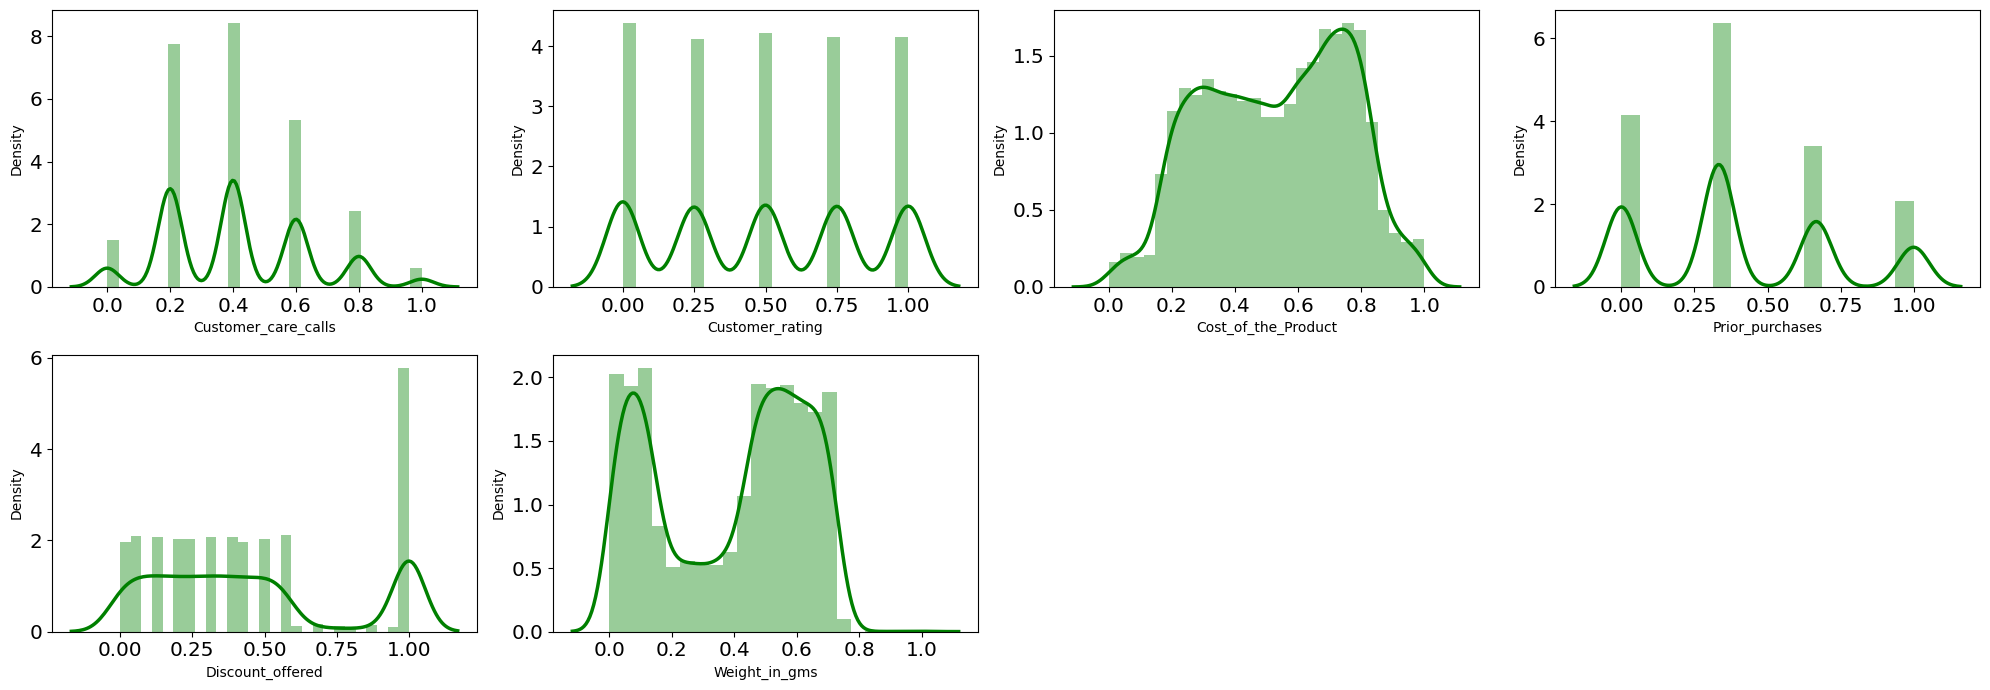

In [114]:
for i in range(0, len(numerical)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.distplot(x=X_train[numerical[i]], color = 'green')
  plt.xlabel(numerical[i])
  plt.tight_layout()

## Feature Engineering

### Feature Selection

Setelah dilihat dari persebaran datanya saat EDA melalui visualisasi, feature **Gender** dapat dihapus karena nilainya yang hampir balance pada semua aspek sehingga dapat dianggap tidak mempengaruhi apa pun

In [115]:
X_train = X_train.drop(['Gender_F', 'Gender_M'], axis=1)
X_test = X_test.drop(['Gender_F', 'Gender_M'], axis=1)
X = X.drop(['Gender_F', 'Gender_M'], axis=1)

In [116]:
X_test

Customer_care_calls  Customer_rating  Cost_of_the_Product  \
7392                  0.6             0.50             0.364486   
5258                  1.0             0.50             1.000000   
8220                  0.4             0.75             0.803738   
7786                  0.6             0.75             0.588785   
2592                  0.4             0.00             0.439252   
...                   ...              ...                  ...   
6865                  0.8             0.50             0.794393   
5323                  0.4             0.75             0.663551   
4298                  0.2             1.00             0.205607   
8821                  0.8             0.00             0.766355   
8060                  0.6             1.00             0.420561   

      Prior_purchases  Product_importance  Discount_offered  Weight_in_gms  \
7392         0.333333                   1            0.3125       0.593572   
5258         0.666667                   1            0.4375       0.125493   
8220         0.333333                   1            0.5625       0.515705   
7786         0.333333                   0            0.0000       0.559971   
2592         0.333333                   0            1.9375       0.259021   
...               ...                 ...               ...            ...   
6865         0.666667                   0            0.5000       0.127831   
5323         0.333333                   1            0.2500       0.543901   
4298         0.333333                   0            0.5000       0.545215   
8821         0.666667                   0            0.3125       0.111760   
8060         0.666667                   0            0.1250       0.480058   

      Warehouse_block_A  Warehouse_block_B  Warehouse_block_C  \
7392                  0                  0                  0   
5258                  1                  0                  0   
8220                  0                  0                  0   
7786                  0                  0                  1   
2592                  0                  0                  0   
...                 ...                ...                ...   
6865                  0                  0                  0   
5323                  0                  0                  0   
4298                  1                  0                  0   
8821                  0                  0                  0   
8060                  1                  0                  0   

      Warehouse_block_D  Warehouse_block_E  Mode_of_Shipment_Flight  \
7392                  1                  0                        0   
5258                  0                  0                        0   
8220                  1                  0                        1   
7786                  0                  0                        0   
2592                  1                  0                        0   
...                 ...                ...                      ...   
6865                  0                  1                        1   
5323                  0                  1                        0   
4298                  0                  0                        0   
8821                  0                  1                        0   
8060                  0                  0                        0   

      Mode_of_Shipment_Road  Mode_of_Shipment_Ship  
7392                      1                      0  
5258                      0                      1  
8220                      0                      0  
7786                      1                      0  
2592                      1                      0  
...                     ...                    ...  
6865                      0                      0  
5323                      1                      0  
4298                      0                      1  
8821                      0                      1  
8060                      1                    

### Feature Extraction

Karena semua feature dianggap sudah sesuai dan tidak ada feature kategorikal yang memiliki nilai unik yang sangat banyak, maka Feature Extraction dirasa **tidak diperlukan**

# Modelling

In [117]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    score = cross_validate(model, X, Y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [118]:
def class_report_train(model):
    y_pred_train = model.predict(X_train)
    print(classification_report(y_train, y_pred_train))


def class_report_test(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

## Logistic Regression

In [119]:
logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.64
Accuracy (Train Set): 0.64
Recall (Test Set): 0.69
Recall (Train Set): 0.71
Precision (Test Set): 0.70
Precision (Train Set): 0.69
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.70
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.73
recall (crossval train): 0.7041380381061203
recall (crossval test): 0.623704442442368


In [120]:
class_report_train(logreg)

              precision    recall  f1-score   support

           0       0.56      0.53      0.54      3226
           1       0.69      0.71      0.70      4787

    accuracy                           0.64      8013
   macro avg       0.62      0.62      0.62      8013
weighted avg       0.64      0.64      0.64      8013



In [121]:
class_report_test(logreg)

              precision    recall  f1-score   support

           0       0.55      0.56      0.55       887
           1       0.70      0.69      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.62      0.63      0.62      2200
weighted avg       0.64      0.64      0.64      2200



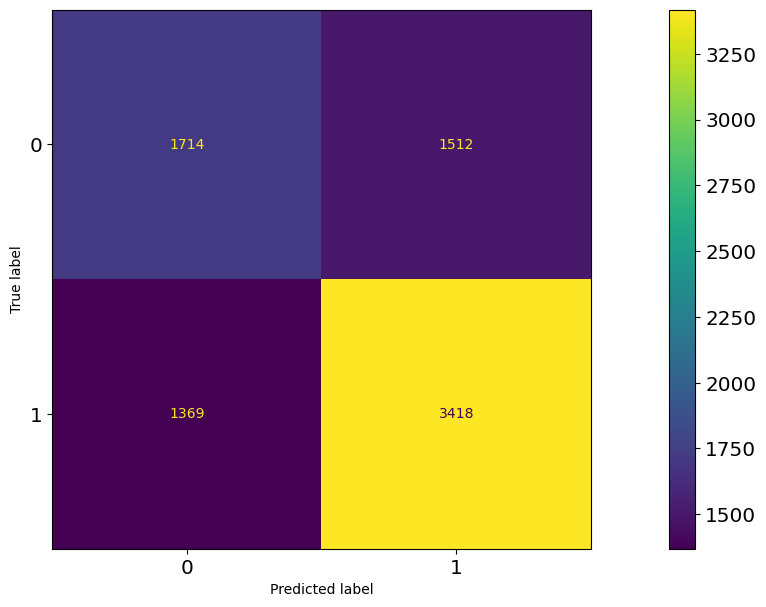

In [122]:
#Confusion Matrix Train vs Prediction
cm1_logreg = confusion_matrix(y_train, logreg.predict(X_train), labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1_logreg,
                              display_labels=logreg.classes_)
disp.plot()
plt.show()

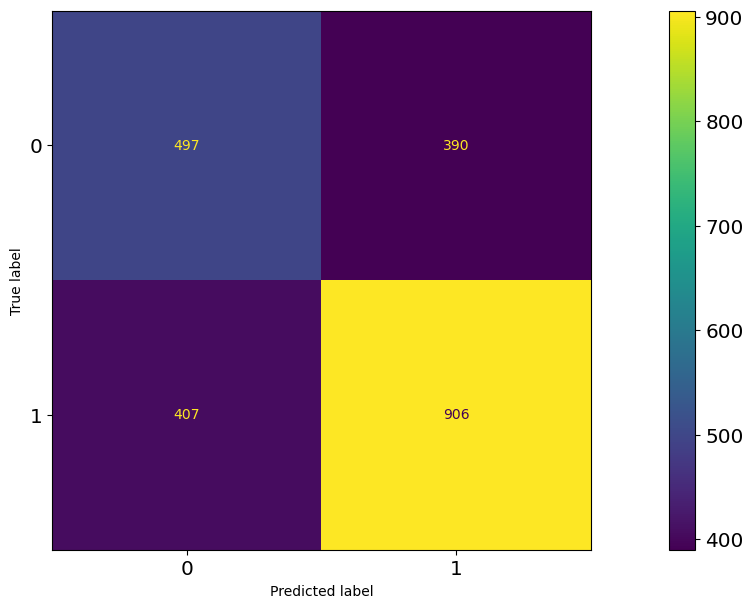

In [123]:
#Confusion Matrix Test vs Prediction
cm2_logreg = confusion_matrix(y_test, logreg.predict(X_test), labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2_logreg,
                              display_labels=logreg.classes_)
disp.plot()
plt.show()

In [124]:
#Percobaan 1
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state = 42)
rs1_logreg = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
rs1_logreg.fit(X_train, y_train)
eval_classification(rs1_logreg)

Accuracy (Test Set): 0.60
Accuracy (Train Set): 0.60
Recall (Test Set): 0.95
Recall (Train Set): 0.98
Precision (Test Set): 0.61
Precision (Train Set): 0.60
F1-Score (Test Set): 0.74
F1-Score (Train Set): 0.75
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.72
recall (crossval train): 0.8167453346754814
recall (crossval test): 0.6992869150892574


In [125]:
show_best_hyperparameter(rs1_logreg)

{'C': 0.002116161616161616, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


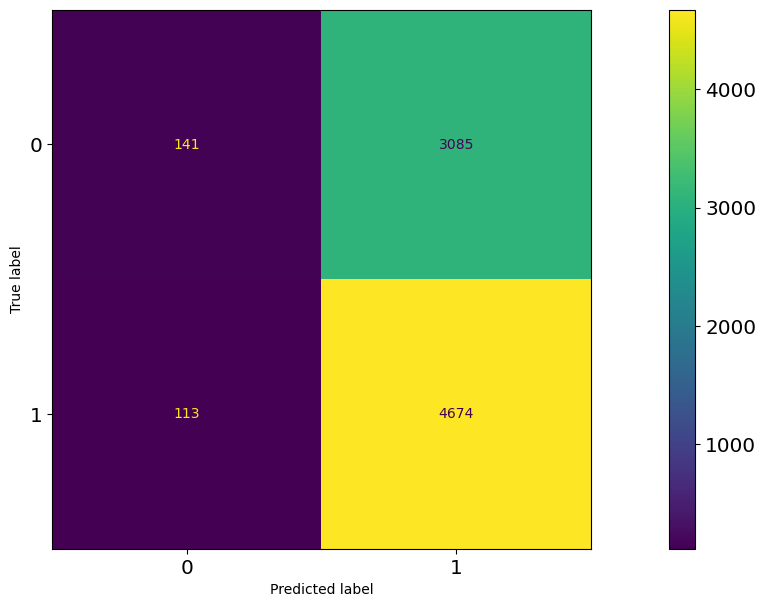

In [126]:
#confusion matrix train vs predict untuk percobaan 1
cm3_logreg = confusion_matrix(y_train, rs1_logreg.predict(X_train), labels=rs1_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3_logreg,
                              display_labels=rs1_logreg.classes_)
disp.plot()
plt.show()

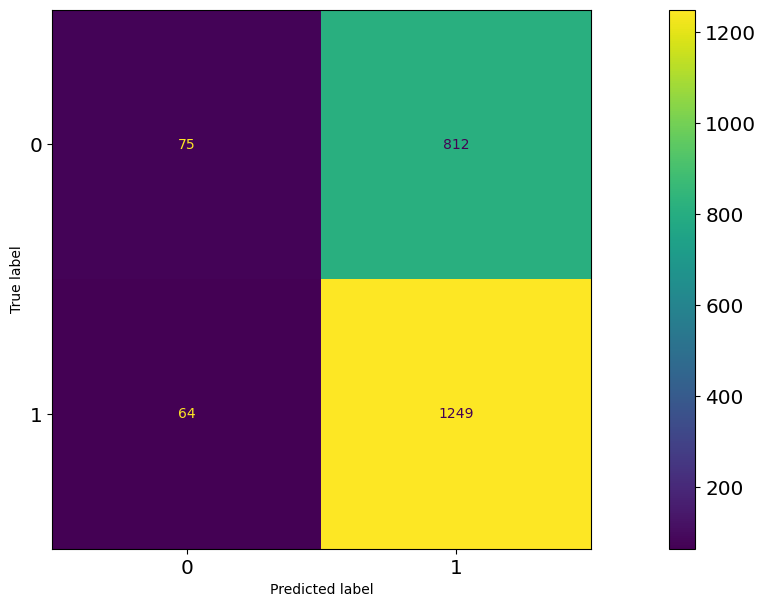

In [127]:
#confusion matrix test vs predict untuk percobaan 1
cm4_logreg = confusion_matrix(y_test, rs1_logreg.predict(X_test), labels=rs1_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4_logreg,
                              display_labels=rs1_logreg.classes_)
disp.plot()
plt.show()

In [128]:
#Percobaan 2: dengan Best HT
penalty = ['l2']
C = [float(x) for x in np.linspace(0.0026202020202020205, 0.01, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression(random_state = 42)
rs2_logreg = RandomizedSearchCV(logreg, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
rs2_logreg.fit(X_train, y_train)
eval_classification(rs2_logreg)

Accuracy (Test Set): 0.60
Accuracy (Train Set): 0.61
Recall (Test Set): 0.91
Recall (Train Set): 0.95
Precision (Test Set): 0.61
Precision (Train Set): 0.61
F1-Score (Test Set): 0.73
F1-Score (Train Set): 0.74
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.72
recall (crossval train): 0.7967842859863428
recall (crossval test): 0.684352070291457


In [129]:
class_report_train(rs2_logreg)

              precision    recall  f1-score   support

           0       0.56      0.10      0.17      3226
           1       0.61      0.95      0.74      4787

    accuracy                           0.61      8013
   macro avg       0.58      0.52      0.46      8013
weighted avg       0.59      0.61      0.51      8013



In [130]:
class_report_test(rs2_logreg)

              precision    recall  f1-score   support

           0       0.52      0.13      0.21       887
           1       0.61      0.91      0.73      1313

    accuracy                           0.60      2200
   macro avg       0.56      0.52      0.47      2200
weighted avg       0.57      0.60      0.52      2200



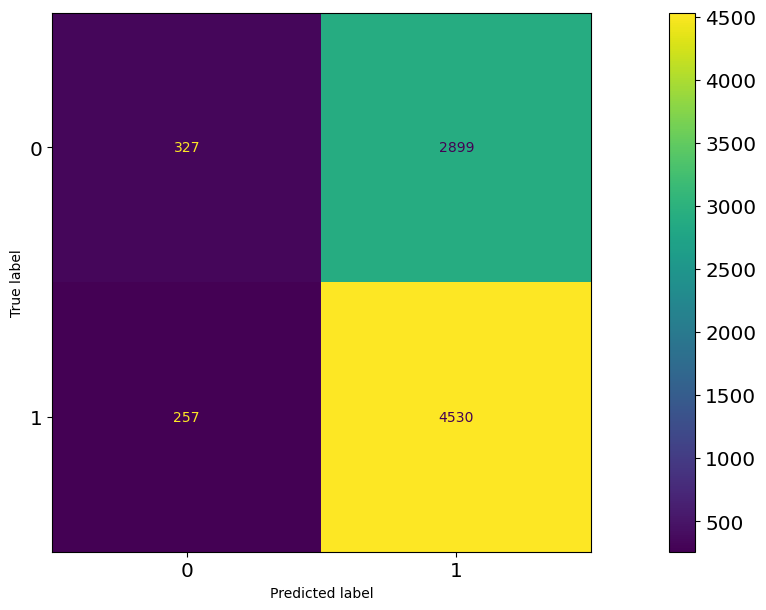

In [131]:
#confusion matrix train vs predict untuk percobaan 2
cm5_logreg = confusion_matrix(y_train, rs2_logreg.predict(X_train), labels=rs2_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5_logreg,
                              display_labels=rs2_logreg.classes_)
disp.plot()
plt.show()

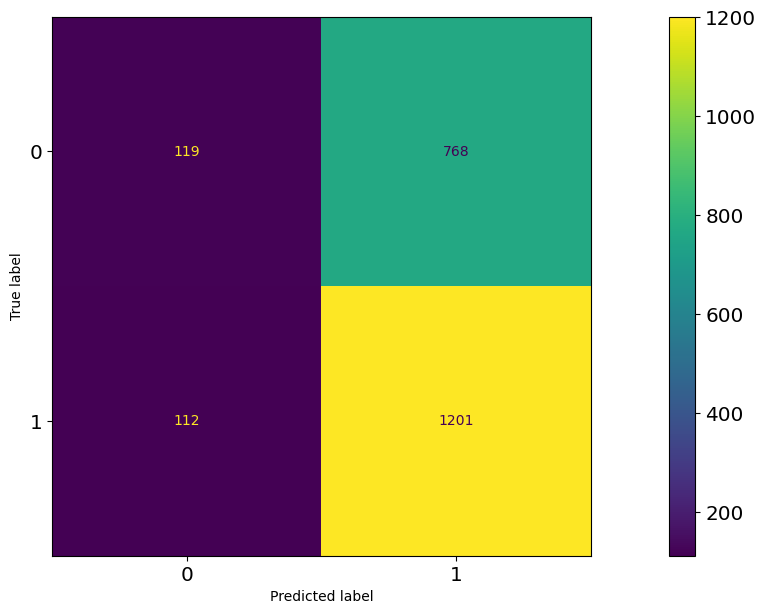

In [132]:
#confusion matrix test vs predict untuk percobaan 2
cm6_logreg = confusion_matrix(y_test, rs2_logreg.predict(X_test), labels=rs2_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6_logreg,
                              display_labels=rs2_logreg.classes_)
disp.plot()
plt.show()

param value: 0.0026202020202020205; train: 0.9463129308543973; test: 0.9146991622239147
param value: 0.002694745434139374; train: 0.940672655107583; test: 0.9086062452399086
param value: 0.0027692888480767273; train: 0.934614581157301; test: 0.9017517136329017
param value: 0.0028438322620140803; train: 0.9310632964278254; test: 0.897943640517898
param value: 0.0029183756759514337; train: 0.9268853143931481; test: 0.8956587966488957
param value: 0.002992919089888787; train: 0.9233340296636724; test: 0.8933739527798934
param value: 0.0030674625038261405; train: 0.9187382494255275; test: 0.884996191926885
param value: 0.003142005917763494; train: 0.9151869646960518; test: 0.8811881188118812
param value: 0.0032165493317008473; train: 0.9101733862544391; test: 0.8781416603198782
param value: 0.0032910927456382003; train: 0.9059954042197619; test: 0.8766184310738766
param value: 0.0033656361595755537; train: 0.901190724879883; test: 0.8705255140898706
param value: 0.003440179573512907; train

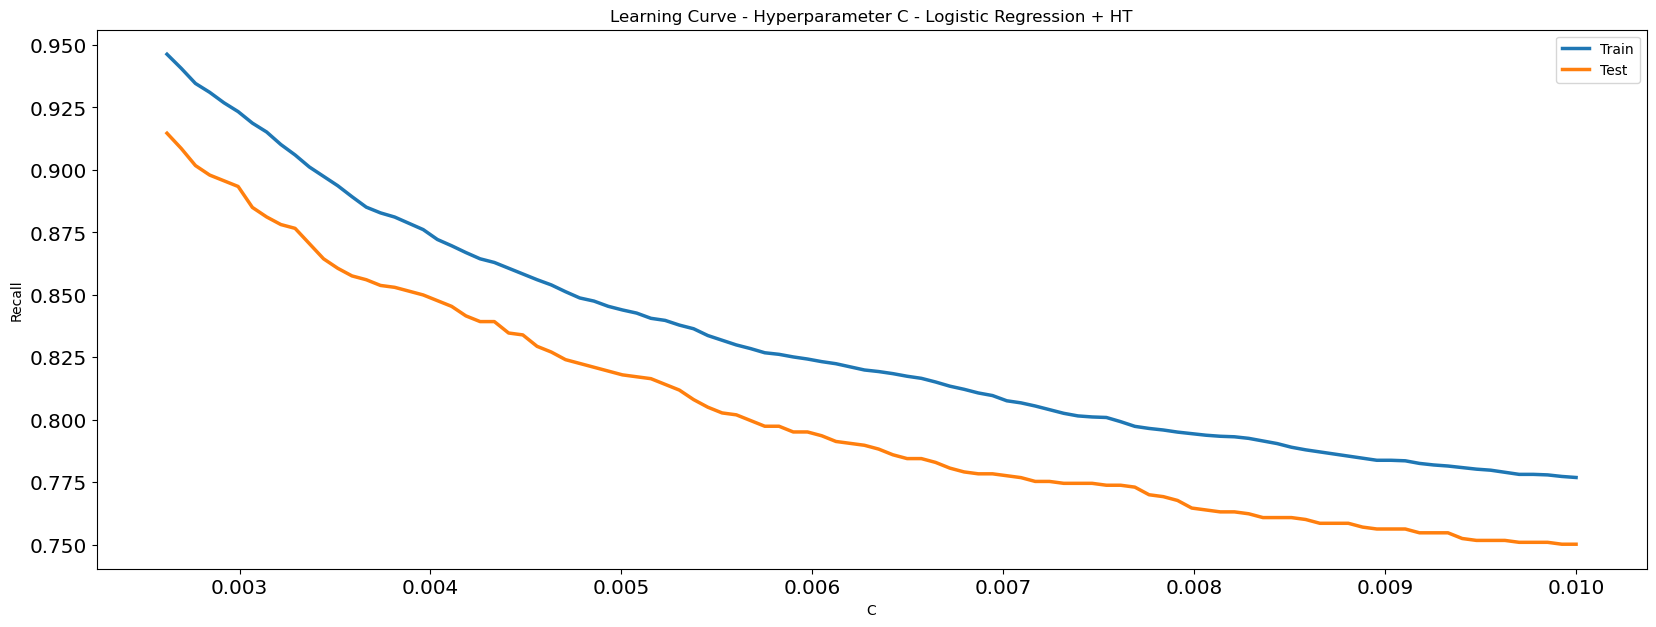

In [133]:
#Hyperparameter Tuning
param_values = [float(x) for x in np.linspace(0.0026202020202020205, 0.01, 100)]
train_scores = []
test_scores = []

for c in param_values:
    model = LogisticRegression(penalty='l2', C=c, random_state = 42)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval on test
    y_pred = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred)
    test_scores.append(test_recall)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: '+ str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Learning Curve - Hyperparameter C - Logistic Regression + HT')
plt.legend()
plt.show()

nilai c yang menciptakan model besfit berada di interval **0.001 - 0.00262** namun performa model menurun hingga 0.08 pada c = 0.00262.

In [134]:
logreg2 = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.0026202020202020205)
logreg2.fit(X_train, y_train)
eval_classification(logreg2)

Accuracy (Test Set): 0.60
Accuracy (Train Set): 0.61
Recall (Test Set): 0.91
Recall (Train Set): 0.95
Precision (Test Set): 0.61
Precision (Train Set): 0.61
F1-Score (Test Set): 0.73
F1-Score (Train Set): 0.74
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.72
recall (crossval train): 0.7967842859863428
recall (crossval test): 0.684352070291457


Feature: 0, Score: -0.10763
Feature: 1, Score: 0.02397
Feature: 2, Score: -0.07029
Feature: 3, Score: -0.15361
Feature: 4, Score: 0.05277
Feature: 5, Score: 0.73146
Feature: 6, Score: -0.38164
Feature: 7, Score: -0.02543
Feature: 8, Score: 0.01665
Feature: 9, Score: 0.00219
Feature: 10, Score: 0.02962
Feature: 11, Score: -0.02302
Feature: 12, Score: 0.01778
Feature: 13, Score: -0.00970
Feature: 14, Score: -0.00808


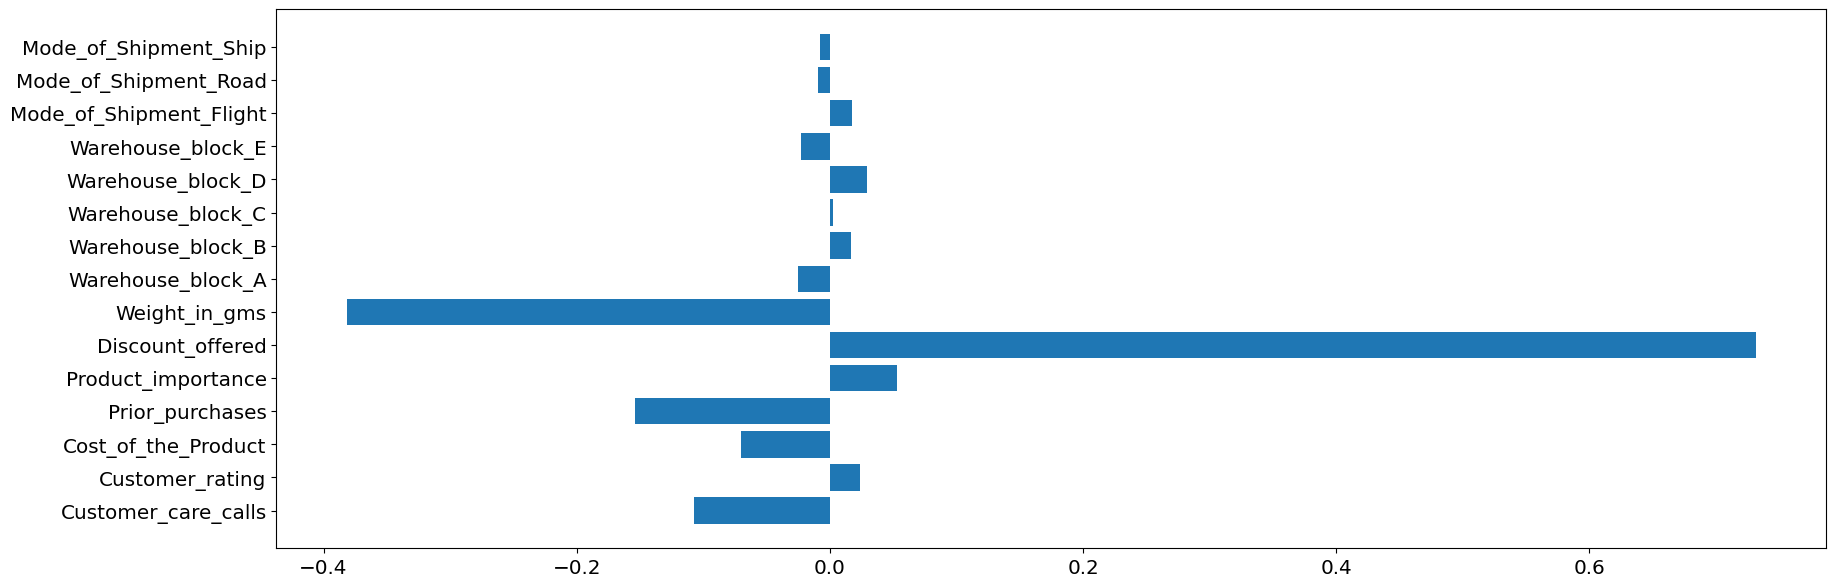

In [135]:
#percobaan 1
importance = rs1_logreg.best_estimator_.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in X_train], importance)
plt.show()

Feature: 0, Score: -0.12510
Feature: 1, Score: 0.02813
Feature: 2, Score: -0.07973
Feature: 3, Score: -0.17701
Feature: 4, Score: 0.05697
Feature: 5, Score: 0.83832
Feature: 6, Score: -0.44528
Feature: 7, Score: -0.02887
Feature: 8, Score: 0.01830
Feature: 9, Score: 0.00251
Feature: 10, Score: 0.03383
Feature: 11, Score: -0.02577
Feature: 12, Score: 0.02002
Feature: 13, Score: -0.01080
Feature: 14, Score: -0.00923


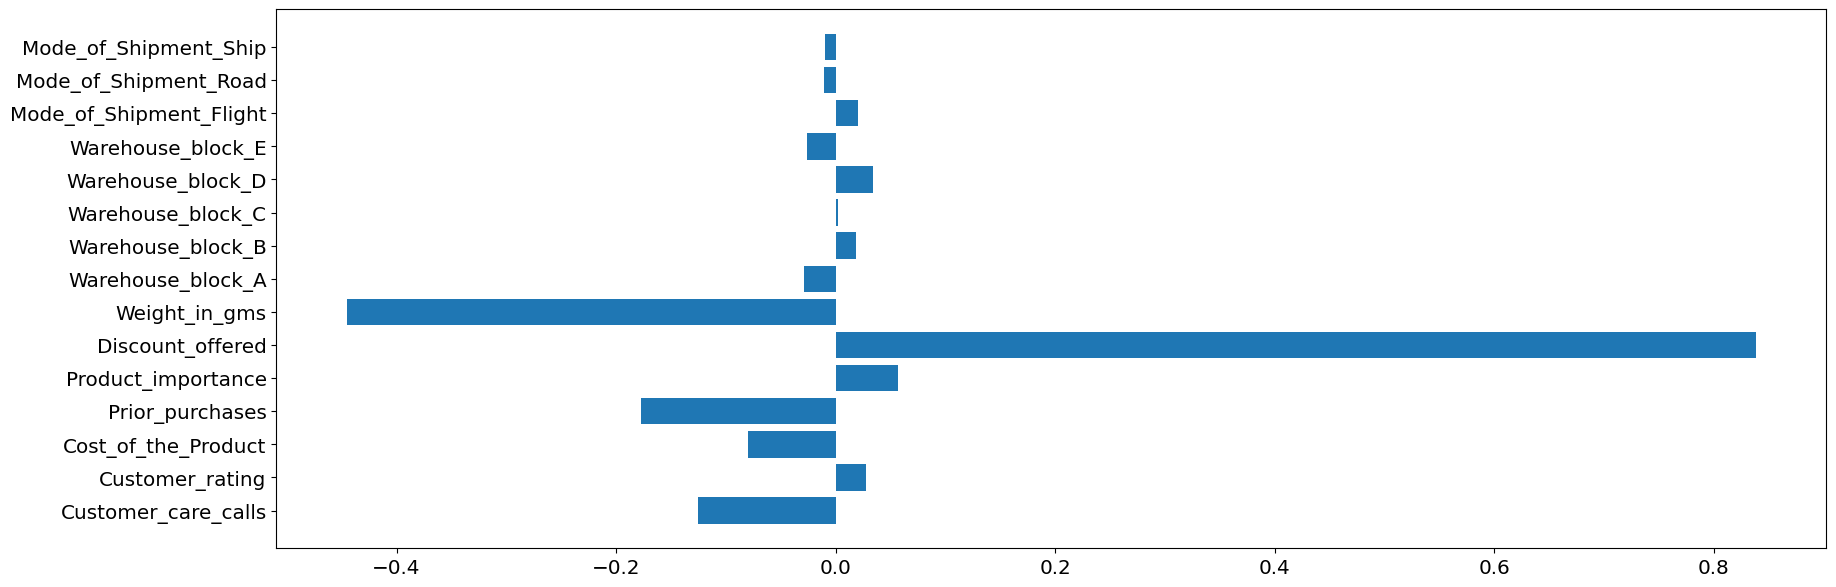

In [136]:
#percobaan 2
importance = rs2_logreg.best_estimator_.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in X_train], importance)
plt.show()

## KNN

In [137]:
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.78
Recall (Test Set): 0.68
Recall (Train Set): 0.79
Precision (Test Set): 0.72
Precision (Train Set): 0.84
F1-Score (Test Set): 0.70
F1-Score (Train Set): 0.81
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.86
recall (crossval train): 0.7795977473678483
recall (crossval test): 0.6141067049950774


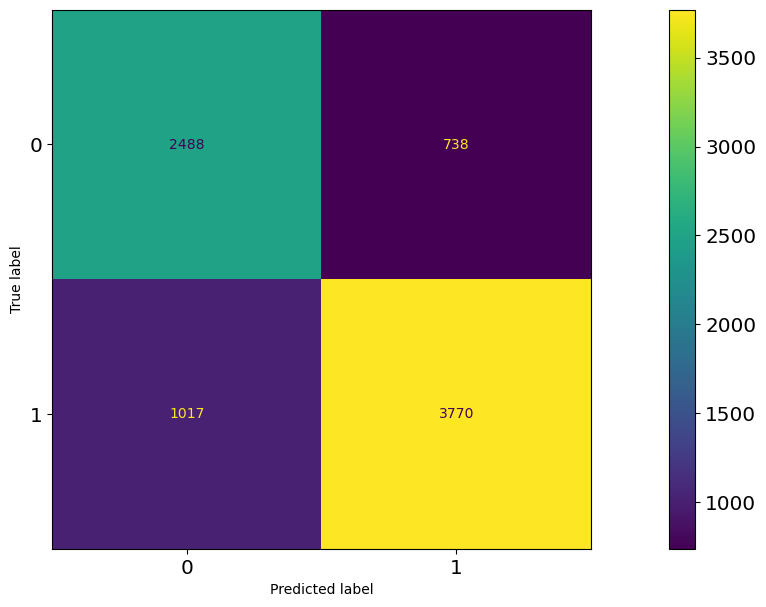

In [138]:
cm1 = confusion_matrix(y_train, knn.predict(X_train), labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

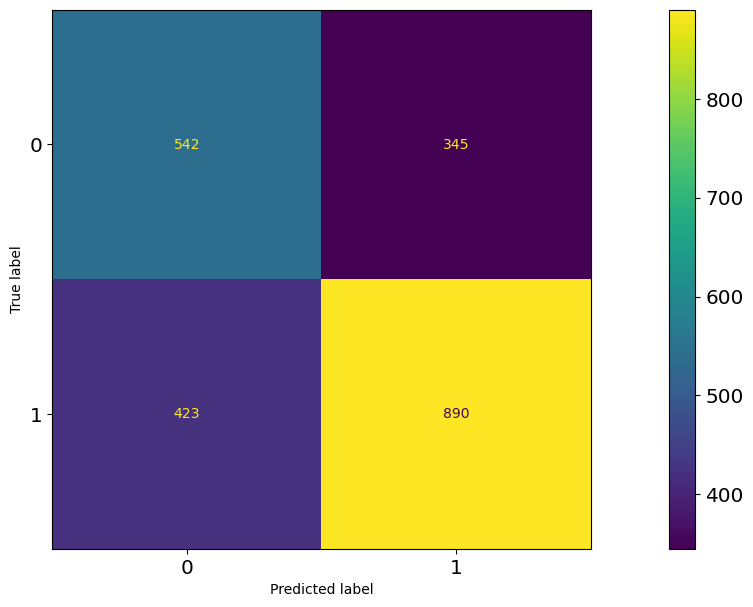

In [139]:
cm2 = confusion_matrix(y_test, knn.predict(X_test), labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

In [140]:
class_report_train(knn)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      3226
           1       0.84      0.79      0.81      4787

    accuracy                           0.78      8013
   macro avg       0.77      0.78      0.78      8013
weighted avg       0.79      0.78      0.78      8013



In [141]:
class_report_test(knn)

              precision    recall  f1-score   support

           0       0.56      0.61      0.59       887
           1       0.72      0.68      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.66      0.65      0.65      2200



**mencari nilai k dengan akurasi terbaik**

In [142]:
accuracies = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies.append(accuracy)
for k in range(1,25):
    print("k = ", k, " => Akurasi = ", np.round(accuracies[k-1], 3)) 

# Bebas memilih k, tapi jika k semakin besar & datanya besar maka akan semakin lambat proses runtime. 
# Jika perbedaan tipis, maka pilih k yang kecil saja
# Pilih k yang ganjil lebih baik agar tidak imbang.

k =  1  => Akurasi =  0.637
k =  2  => Akurasi =  0.647
k =  3  => Akurasi =  0.649
k =  4  => Akurasi =  0.653
k =  5  => Akurasi =  0.651
k =  6  => Akurasi =  0.653
k =  7  => Akurasi =  0.643
k =  8  => Akurasi =  0.648
k =  9  => Akurasi =  0.635
k =  10  => Akurasi =  0.645
k =  11  => Akurasi =  0.639
k =  12  => Akurasi =  0.648
k =  13  => Akurasi =  0.639
k =  14  => Akurasi =  0.645
k =  15  => Akurasi =  0.635
k =  16  => Akurasi =  0.647
k =  17  => Akurasi =  0.638
k =  18  => Akurasi =  0.655
k =  19  => Akurasi =  0.646
k =  20  => Akurasi =  0.65
k =  21  => Akurasi =  0.64
k =  22  => Akurasi =  0.66
k =  23  => Akurasi =  0.643
k =  24  => Akurasi =  0.655


**Nilai K terbaik untuk data train**

In [143]:
best_k = 1
best_accuracy = 0
best_recall = 0
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross valid untuk akurasi & recall
    accuracy_scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    recall_scores = cross_val_score(knn, X, Y, cv=5, scoring='recall_macro')
    # mean akurasi & recall
    mean_accuracy = np.mean(accuracy_scores)
    mean_recall = np.mean(recall_scores)
    # K & score terbaik
    if mean_accuracy > best_accuracy:
        best_k = k
        best_accuracy = mean_accuracy
    if mean_recall > best_recall:
        best_recall = mean_recall

print("Best k for KNN model:", best_k)
print("Best accuracy:", best_accuracy)
print("Best recall:", best_recall)

Best k for KNN model: 2
Best accuracy: 0.6197662987308281
Best recall: 0.6484605971772164


In [144]:
knn10 = KNeighborsClassifier(n_neighbors = 10)

**K = 10 DATA TRAIN**

In [145]:
knn10.fit(X_train, y_train)
y_train10 = knn10.predict(X_train)

In [146]:
class_report_train(knn10)

              precision    recall  f1-score   support

           0       0.62      0.83      0.71      3226
           1       0.85      0.65      0.74      4787

    accuracy                           0.73      8013
   macro avg       0.74      0.74      0.72      8013
weighted avg       0.76      0.73      0.73      8013



In [147]:
class_report_test(knn10)

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       887
           1       0.76      0.60      0.67      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.66      0.64      2200
weighted avg       0.67      0.65      0.65      2200



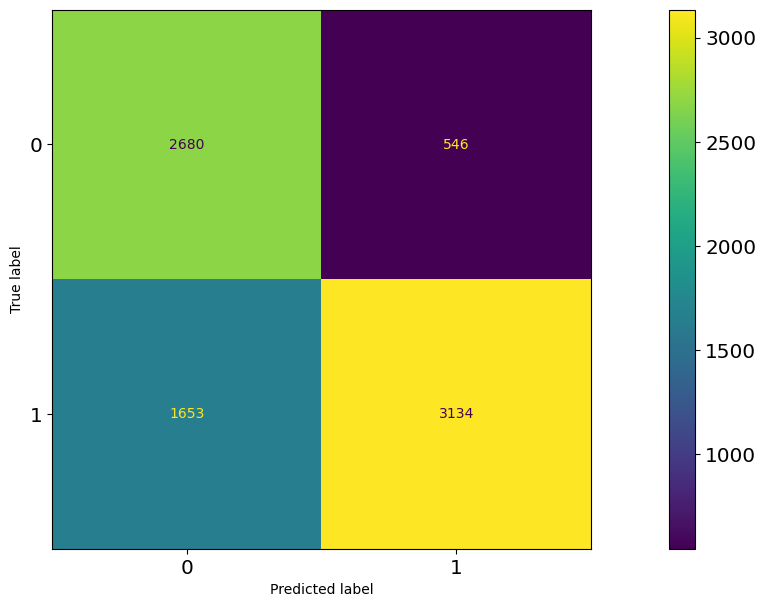

In [148]:
cm = confusion_matrix(y_train, knn10.predict(X_train), labels=knn10.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn10.classes_)
disp.plot()
plt.show()

**K = 10 DATA TEST**

In [149]:
y_pred = knn10.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.72      0.62       887
           1       0.76      0.60      0.67      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.66      0.64      2200
weighted avg       0.67      0.65      0.65      2200



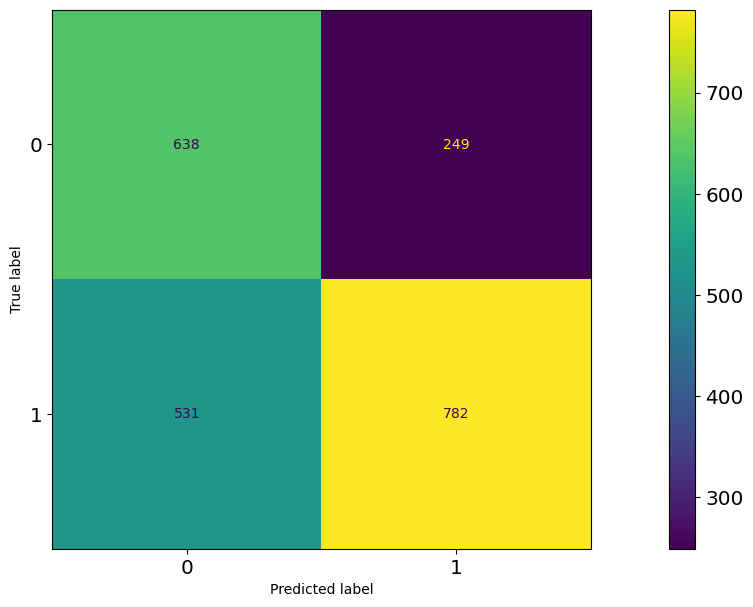

In [150]:
cm = confusion_matrix(y_test, knn10.predict(X_test), labels=knn10.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn10.classes_)
disp.plot()
plt.show()

**FIX OVERFIT**

In [151]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

eval_classification(knn_model)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.73
Recall (Test Set): 0.60
Recall (Train Set): 0.65
Precision (Test Set): 0.76
Precision (Train Set): 0.85
F1-Score (Test Set): 0.67
F1-Score (Train Set): 0.74
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.82
recall (crossval train): 0.6563687279520455
recall (crossval test): 0.5257138976092731


In [152]:
hyperparameters = {'n_neighbors': range(1, 30),
                   'weights': ['uniform', 'distance'],
                   'p': [1, 2]} # jarak Euclidean (p=2) dan jarak Manhattan (p=1)

knn_hyper = KNeighborsClassifier()

# Masukin RandomizedSearchCV
rs = RandomizedSearchCV(knn_hyper, hyperparameters, scoring='recall', n_iter=50, cv=5, random_state=42)

# Fit RandomizedSearchCV
rs.fit(X_train, y_train)

# Print best hyperparameters and evaluation metrics
print('Best hyperparameters:', rs.best_params_)

Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 3}


In [153]:
knnmodel_hype = KNeighborsClassifier(n_neighbors=rs.best_params_['n_neighbors'], 
                                      weights=rs.best_params_['weights'], 
                                      p=rs.best_params_['p'])
# Training model dengan data training
knnmodel_hype.fit(X_train, y_train)

# Evaluasi performa model pada data test
y_pred = knnmodel_hype.predict(X_test)
eval_classification(knnmodel_hype)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 1.00
Recall (Test Set): 0.69
Recall (Train Set): 1.00
Precision (Test Set): 0.71
Precision (Train Set): 1.00
F1-Score (Test Set): 0.70
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.70
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.6349882971411588


In [154]:
class_report_train(knnmodel_hype)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3226
           1       1.00      1.00      1.00      4787

    accuracy                           1.00      8013
   macro avg       1.00      1.00      1.00      8013
weighted avg       1.00      1.00      1.00      8013



In [155]:
class_report_test(knnmodel_hype)

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       887
           1       0.71      0.69      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.65      0.65      2200



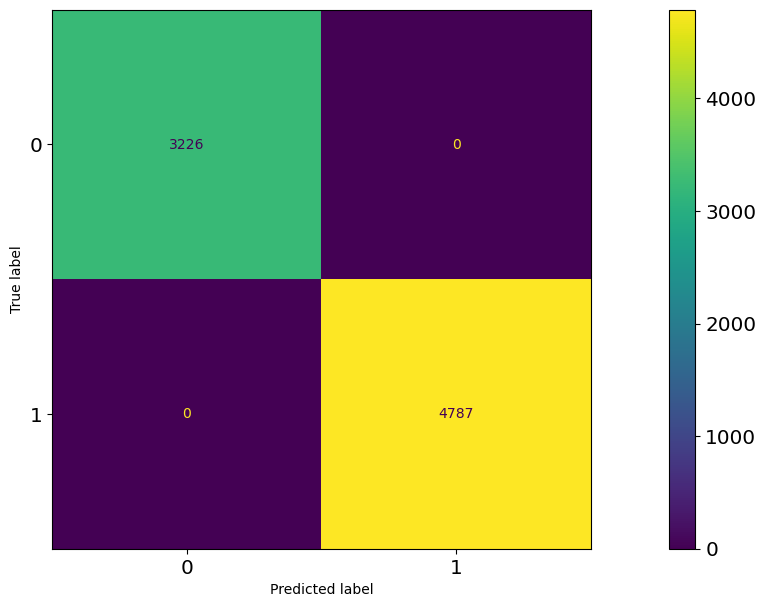

In [156]:
cm = confusion_matrix(y_train, knnmodel_hype.predict(X_train), labels=knnmodel_hype.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnmodel_hype.classes_)
disp.plot()
plt.show()

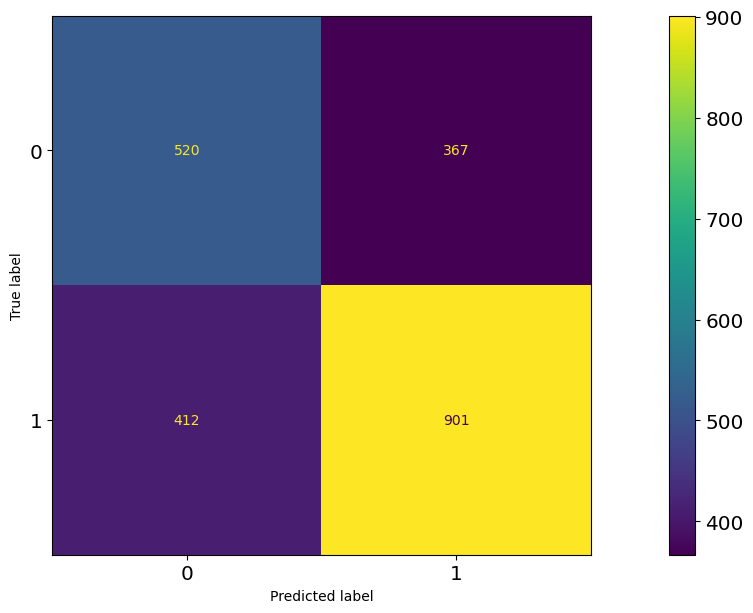

In [157]:
cm = confusion_matrix(y_test, knnmodel_hype.predict(X_test), labels=knnmodel_hype.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnmodel_hype.classes_)
disp.plot()
plt.show()

**dengan setting HT distance measure p = 3**

In [158]:
n_neighbors = [int(x) for x in np.linspace(1, 100, 50)]
weights = ['uniform', 'distance']
p = [1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights = weights, algorithm = algorithm)

knn.fit(X_train, y_train)
rs1_knn = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=42, cv=5)
rs1_knn.fit(X_train, y_train)
eval_classification(rs1_knn)

Accuracy (Test Set): 0.63
Accuracy (Train Set): 0.66
Recall (Test Set): 0.70
Recall (Train Set): 0.73
Precision (Test Set): 0.68
Precision (Train Set): 0.71
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.74
recall (crossval train): 0.7250888084809242
recall (crossval test): 0.5901730815670685


In [159]:
show_best_hyperparameter(rs1_knn)

{'algorithm': 'kd_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 87, 'p': 2, 'weights': 'uniform'}


In [160]:
n_neighbors = [int(x) for x in np.linspace(81, 87, 50)]
weights = ['uniform']
p = [2]
algorithm = ['kd_tree']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights = weights, algorithm = algorithm)

knn.fit(X_train, y_train)
rs2_knn = RandomizedSearchCV(knn, hyperparameters, scoring='recall', random_state=42, cv=5)
rs2_knn.fit(X_train, y_train)
eval_classification(rs2_knn)

Accuracy (Test Set): 0.63
Accuracy (Train Set): 0.66
Recall (Test Set): 0.70
Recall (Train Set): 0.73
Precision (Test Set): 0.68
Precision (Train Set): 0.71
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.72
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.74
recall (crossval train): 0.659764289795141
recall (crossval test): 0.5263157589211078


In [161]:
class_report_train(rs2_knn)

              precision    recall  f1-score   support

           0       0.58      0.55      0.57      3226
           1       0.71      0.73      0.72      4787

    accuracy                           0.66      8013
   macro avg       0.64      0.64      0.64      8013
weighted avg       0.66      0.66      0.66      8013



In [162]:
class_report_test(rs2_knn)

              precision    recall  f1-score   support

           0       0.54      0.51      0.53       887
           1       0.68      0.70      0.69      1313

    accuracy                           0.63      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.62      0.63      0.62      2200



## Decision Tree

In [163]:
dt = DecisionTreeClassifier(random_state=42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 1.00
Recall (Test Set): 0.72
Recall (Train Set): 1.00
Precision (Test Set): 0.70
Precision (Train Set): 1.00
F1-Score (Test Set): 0.71
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.63
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.6752139719131388


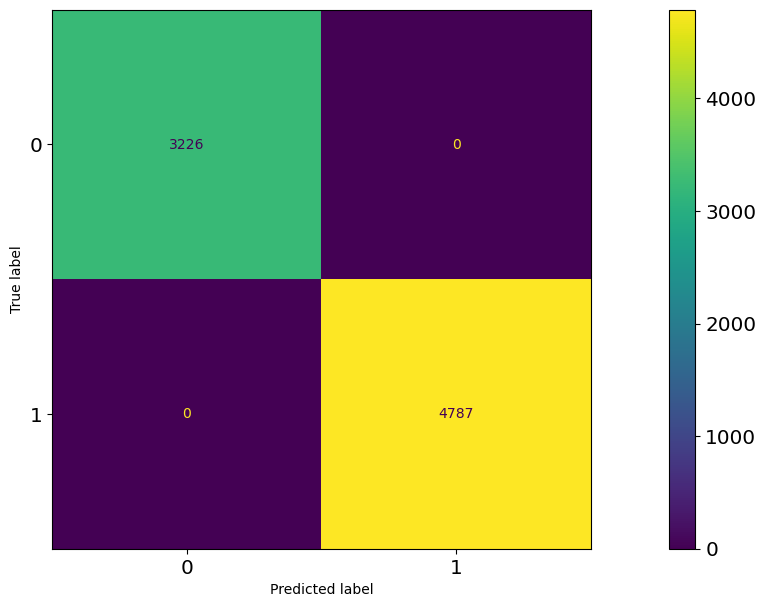

In [164]:
#confusion matrix train tanpa HT
cm1_dt = confusion_matrix(y_train, dt.predict(X_train), labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1_dt, display_labels=dt.classes_)

disp.plot()

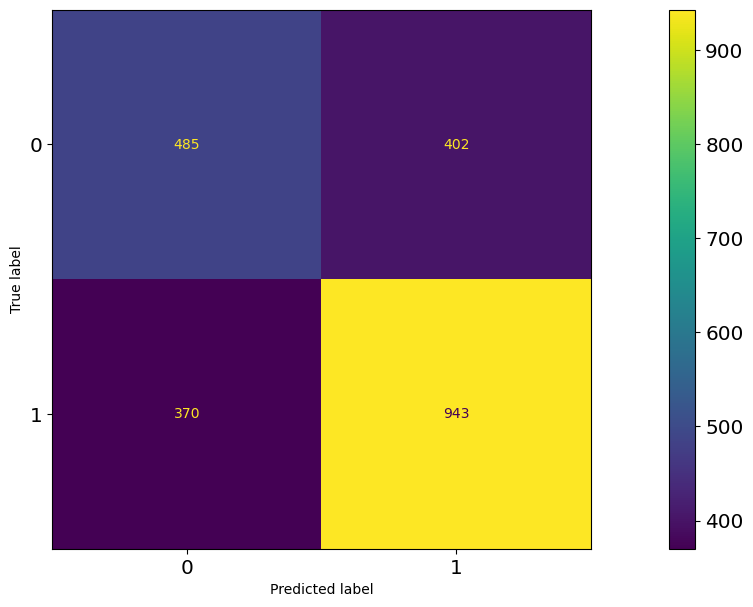

In [165]:
#confusion matrix test tanpa HT
cm2_dt = confusion_matrix(y_test, dt.predict(X_test), labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2_dt, display_labels=dt.classes_)

disp.plot()

In [166]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

In [167]:
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
rs1_dt = RandomizedSearchCV(dt, hyperparameters, random_state = 42, cv=5, scoring='recall')
rs1_dt.fit(X_train, y_train)
eval_classification(rs1_dt)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.75
Recall (Test Set): 0.68
Recall (Train Set): 0.76
Precision (Test Set): 0.72
Precision (Train Set): 0.81
F1-Score (Test Set): 0.70
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.84
recall (crossval train): 0.764590944128556
recall (crossval test): 0.6075389398695966


In [168]:
show_best_hyperparameter(rs1_dt)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 34, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [169]:
# List of hyperparameter
max_depth = [34] # Maximum number of levels in tree
min_samples_split = [10] # Minimum number of samples required to split a node
min_samples_leaf = [10] # Minimum number of samples required at each leaf node
max_features = ['auto'] # Number of features to consider at every split
criterion = ['entropy']
splitter = ['best']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

In [170]:
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
rs2_dt = RandomizedSearchCV(dt, hyperparameters, random_state = 42, cv=5, scoring='recall')
rs2_dt.fit(X_train, y_train)
eval_classification(rs2_dt)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.75
Recall (Test Set): 0.68
Recall (Train Set): 0.76
Precision (Test Set): 0.72
Precision (Train Set): 0.81
F1-Score (Test Set): 0.70
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.84
recall (crossval train): 0.7402480507114291
recall (crossval test): 0.5959639068972564


In [171]:
dt2 = DecisionTreeClassifier(random_state=42, max_depth = 34, min_samples_split = 10, min_samples_leaf = 10, max_features = 'auto', criterion = 'entropy', splitter = 'best')
dt2.fit(X_train, y_train)
eval_classification(dt2)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.75
Recall (Test Set): 0.68
Recall (Train Set): 0.76
Precision (Test Set): 0.72
Precision (Train Set): 0.81
F1-Score (Test Set): 0.70
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.84
recall (crossval train): 0.7402480507114291
recall (crossval test): 0.5959639068972564


In [172]:
class_report_train(rs2_dt)

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      3226
           1       0.81      0.76      0.79      4787

    accuracy                           0.75      8013
   macro avg       0.74      0.75      0.74      8013
weighted avg       0.76      0.75      0.75      8013



In [173]:
class_report_test(rs2_dt)

              precision    recall  f1-score   support

           0       0.56      0.61      0.59       887
           1       0.72      0.68      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.65      0.65      2200



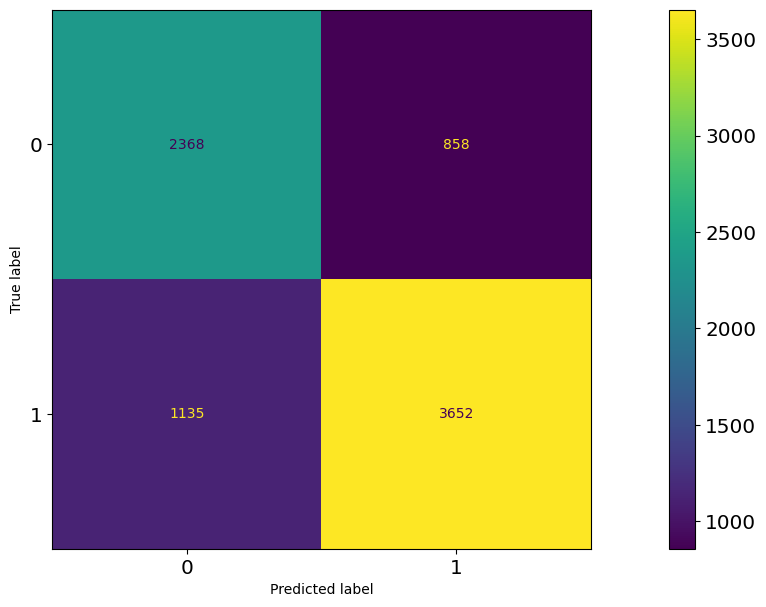

In [174]:
#confusion matrix train dengan HT
cm3_dt = confusion_matrix(y_train, rs2_dt.predict(X_train), labels=rs2_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3_dt, display_labels=rs2_dt.classes_)

disp.plot()

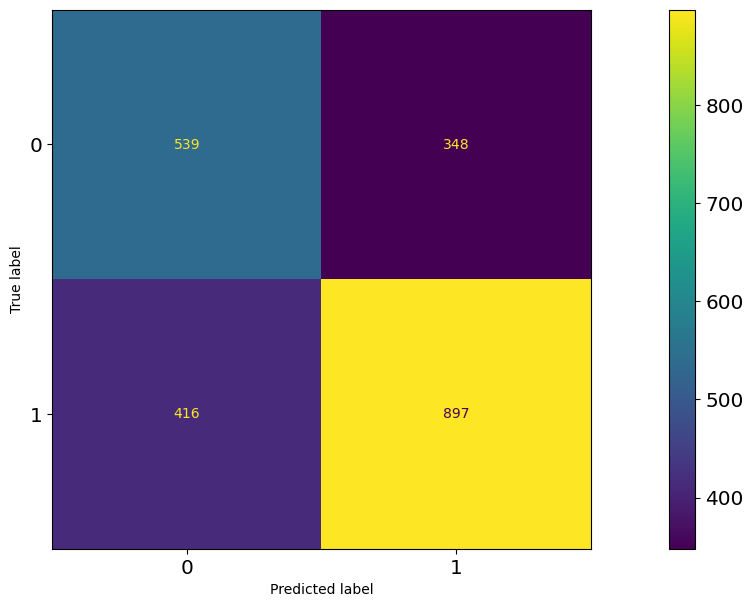

In [175]:
#confusion matrix test dengan HT
cm4_dt = confusion_matrix(y_test, rs2_dt.predict(X_test), labels=rs2_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4_dt, display_labels=rs2_dt.classes_)

disp.plot()

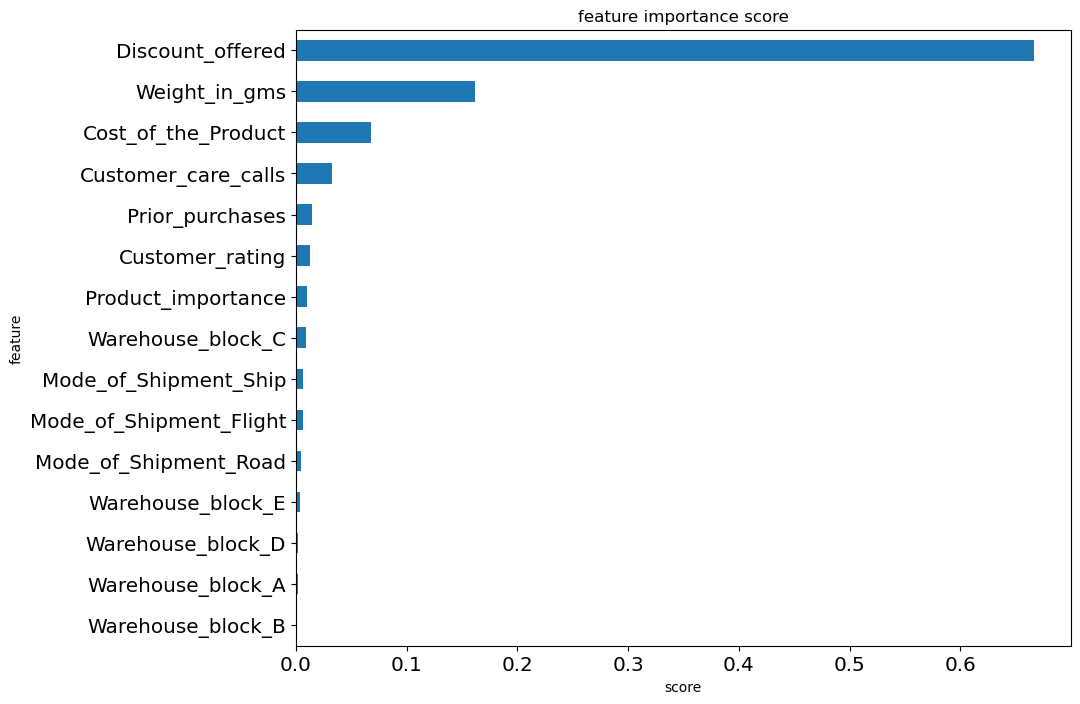

In [176]:
#feature importance dari fit model menggunakan HT
show_feature_importance(rs2_dt.best_estimator_)

## Random Forest

In [177]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.67
Accuracy (Train Set): 1.00
Recall (Test Set): 0.67
Recall (Train Set): 1.00
Precision (Test Set): 0.75
Precision (Train Set): 1.00
F1-Score (Test Set): 0.71
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.75
roc_auc (train-proba): 1.00
recall (crossval train): 1.0
recall (crossval test): 0.5794919008786432


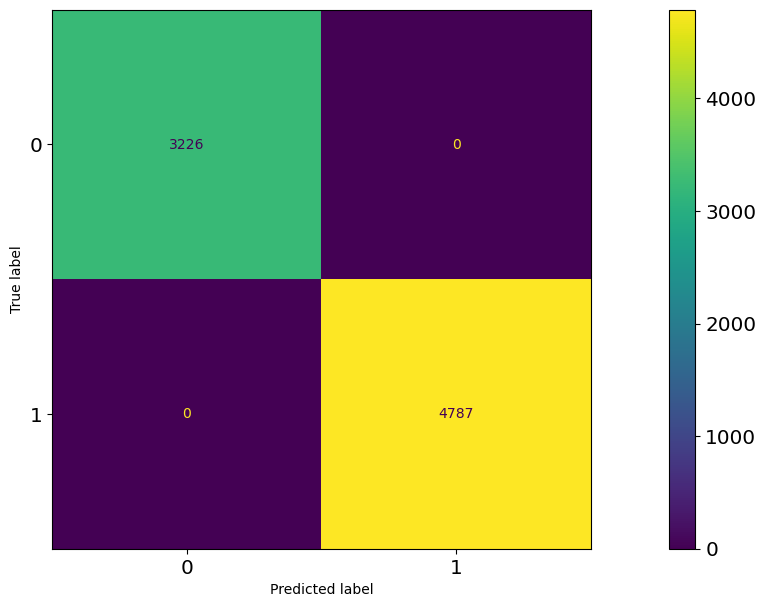

In [178]:
#Confusion Matrix train vs prediction
cm1_rf = confusion_matrix(y_train, rf.predict(X_train), labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1_rf,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

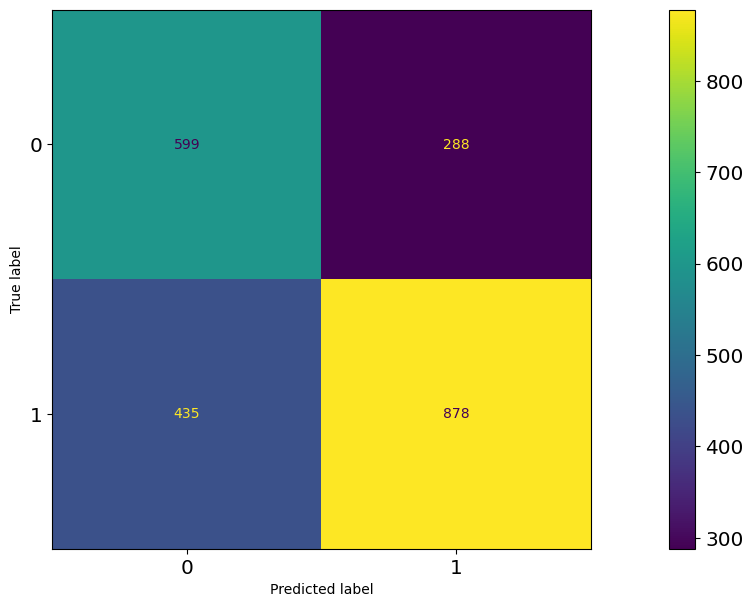

In [179]:
#Confusion Matrix test vs prediction
cm2_rf = confusion_matrix(y_test, rf.predict(X_test), labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2_rf,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [180]:
#Percobaan 1 Hyperparameter Tuning
n_estimator = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimator, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

model = RandomForestClassifier(random_state=42)
rs_rf = RandomizedSearchCV(model, hyperparameters, scoring = 'recall', random_state=42, cv=5)
rs_rf.fit(X_train, y_train)

eval_classification(rs_rf)

Accuracy (Test Set): 0.67
Accuracy (Train Set): 0.94
Recall (Test Set): 0.63
Recall (Train Set): 0.92
Precision (Test Set): 0.77
Precision (Train Set): 0.98
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.95
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.99
recall (crossval train): 0.8069153267858278
recall (crossval test): 0.5226466572548436


In [181]:
show_best_hyperparameter(rs_rf)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 46, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 74, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


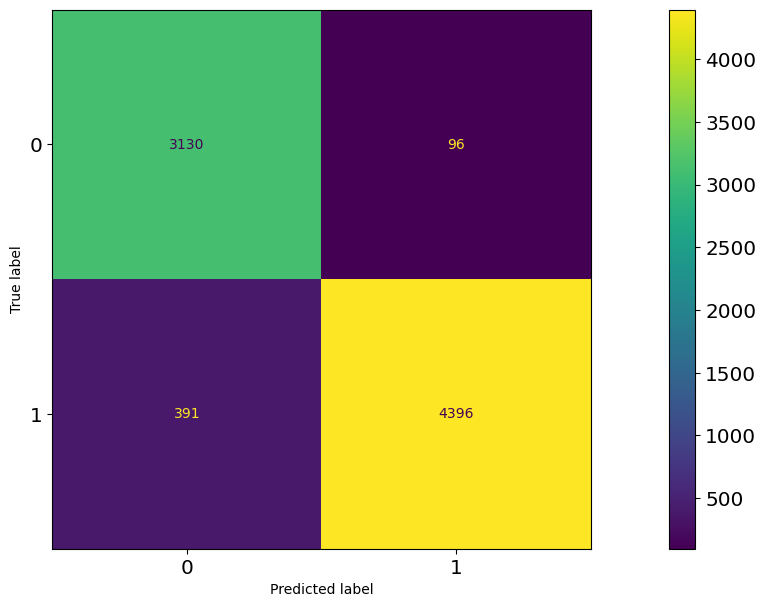

In [182]:
#Confusion Matrix train vs prediction
cm3_rf = confusion_matrix(y_train, rs_rf.predict(X_train), labels=rs_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3_rf,
                              display_labels=rs_rf.classes_)
disp.plot()
plt.show()

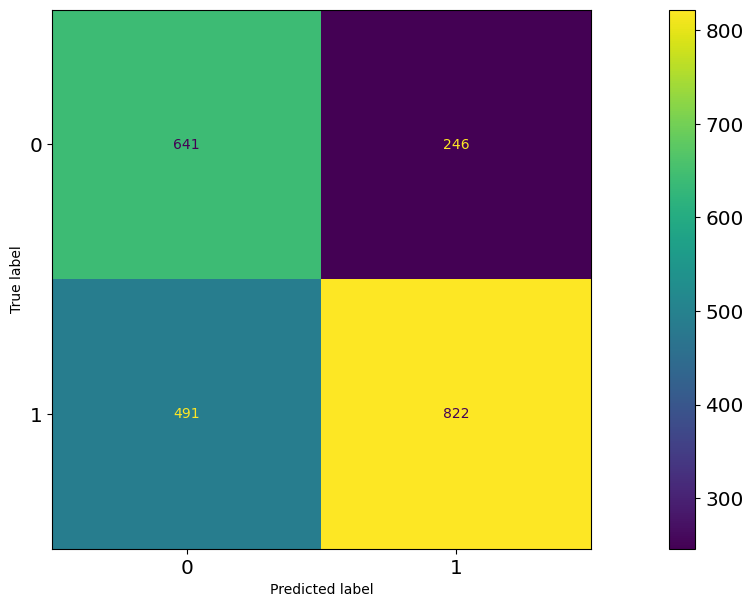

In [183]:
#Confusion Matrix test vs prediction
cm4_rf = confusion_matrix(y_test, rs_rf.predict(X_test), labels=rs_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm4_rf,
                              display_labels= rs_rf.classes_)
disp.plot()
plt.show()

param value: 1; train: 0.8880300814706497; test: 0.7281035795887281
param value: 5; train: 0.9680384374347191; test: 0.7128712871287128
param value: 9; train: 0.9862126592855651; test: 0.7075399847677075
param value: 13; train: 0.9933152287445164; test: 0.6991622239146992
param value: 17; train: 0.997075412575726; test: 0.69002284843869
param value: 21; train: 0.9987466053895968; test: 0.7014470677837015
param value: 25; train: 0.9989555044913306; test: 0.6961157654226962
param value: 29; train: 0.9989555044913306; test: 0.6892612338156893
param value: 33; train: 0.9993733026947984; test: 0.6877380045696877
param value: 37; train: 0.9997911008982662; test: 0.6945925361766946
param value: 41; train: 0.9997911008982662; test: 0.6961157654226962
param value: 45; train: 0.9997911008982662; test: 0.6968773800456969
param value: 49; train: 1.0; test: 0.7014470677837015
param value: 53; train: 1.0; test: 0.6915460776846916
param value: 57; train: 1.0; test: 0.6854531607006854
param value: 61;

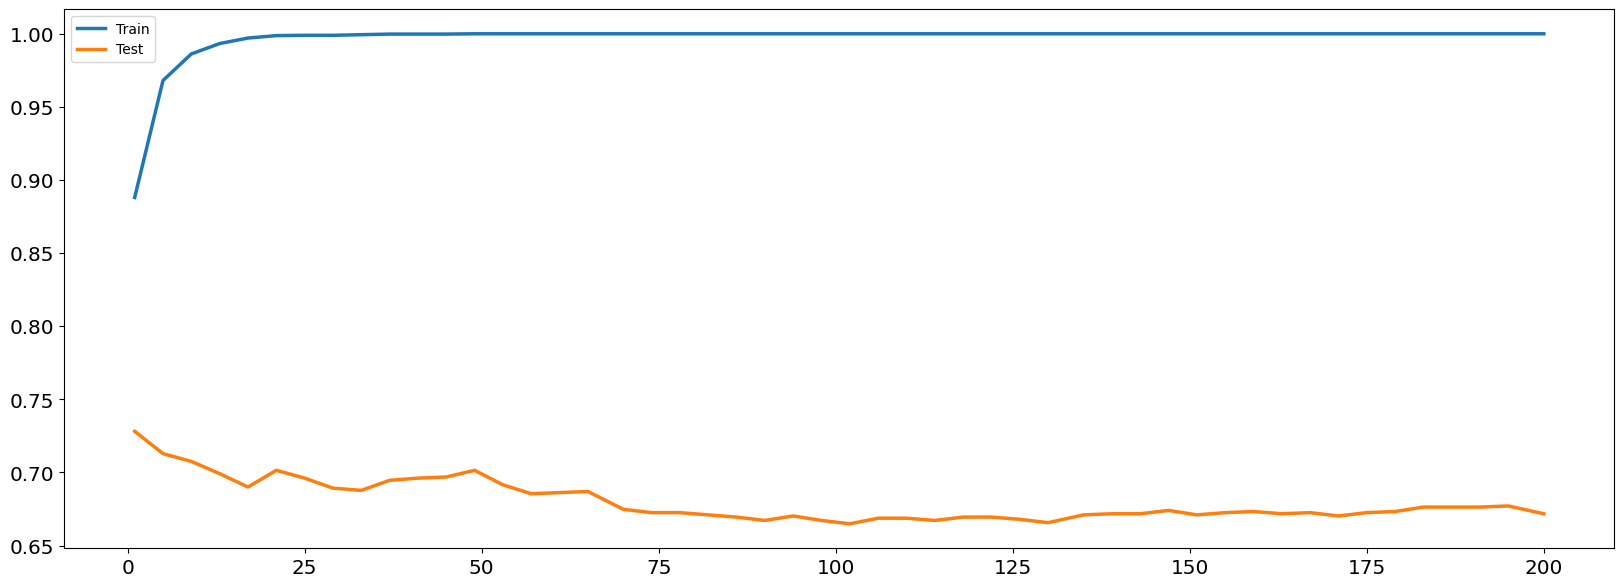

In [184]:
#Learning Curve

# n_estimator
param_values = [int(x) for x in np.linspace(1, 200, 50)]

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=c)
    model.fit(X_train, y_train)

    # eval train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval test
    y_pred_test = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()

param value: 2; train: 0.8119908084395238; test: 0.805026656511805
param value: 4; train: 0.6118654689784834; test: 0.6290936785986291
param value: 6; train: 0.5736369333611866; test: 0.5856816450875857
param value: 8; train: 0.6461249216628369; test: 0.5963442498095963
param value: 10; train: 0.7319824524754543; test: 0.6481340441736482
param value: 12; train: 0.8238980572383539; test: 0.6534653465346535
param value: 14; train: 0.8974305410486735; test: 0.6892612338156893
param value: 16; train: 0.945268435345728; test: 0.6999238385376999
param value: 18; train: 0.9676206392312513; test: 0.6999238385376999
param value: 20; train: 0.9780655943179445; test: 0.6945925361766946
param value: 22; train: 0.983288071861291; test: 0.693069306930693
param value: 24; train: 0.9822435763526217; test: 0.6976389946686976
param value: 26; train: 0.9853770628786296; test: 0.7083015993907082
param value: 28; train: 0.9857948610820974; test: 0.7006854531607006
param value: 30; train: 0.9866304574890328

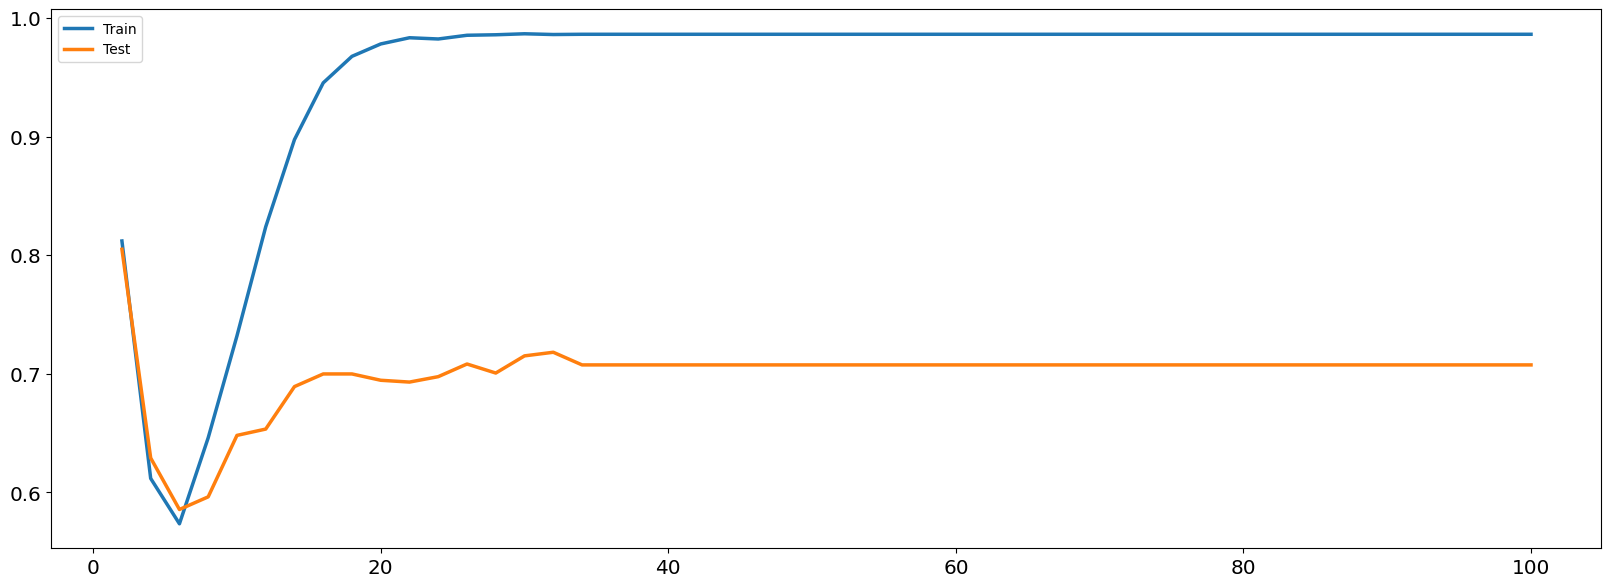

In [185]:
# max_depth
param_values = [int(x) for x in np.linspace(2, 100, 50)]

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=9, max_depth=c)
    model.fit(X_train, y_train)

    # eval train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval test
    y_pred_test = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()

param value: 2; train: 0.8119908084395238; test: 0.805026656511805
param value: 2; train: 0.8119908084395238; test: 0.805026656511805
param value: 3; train: 0.8119908084395238; test: 0.805026656511805
param value: 4; train: 0.8119908084395238; test: 0.805026656511805
param value: 5; train: 0.8119908084395238; test: 0.805026656511805
param value: 6; train: 0.8119908084395238; test: 0.805026656511805
param value: 7; train: 0.8119908084395238; test: 0.805026656511805
param value: 8; train: 0.8119908084395238; test: 0.805026656511805
param value: 9; train: 0.8119908084395238; test: 0.805026656511805
param value: 10; train: 0.8119908084395238; test: 0.805026656511805
param value: 11; train: 0.8119908084395238; test: 0.805026656511805
param value: 12; train: 0.8119908084395238; test: 0.805026656511805
param value: 13; train: 0.8119908084395238; test: 0.805026656511805
param value: 14; train: 0.8119908084395238; test: 0.805026656511805
param value: 15; train: 0.8119908084395238; test: 0.80502

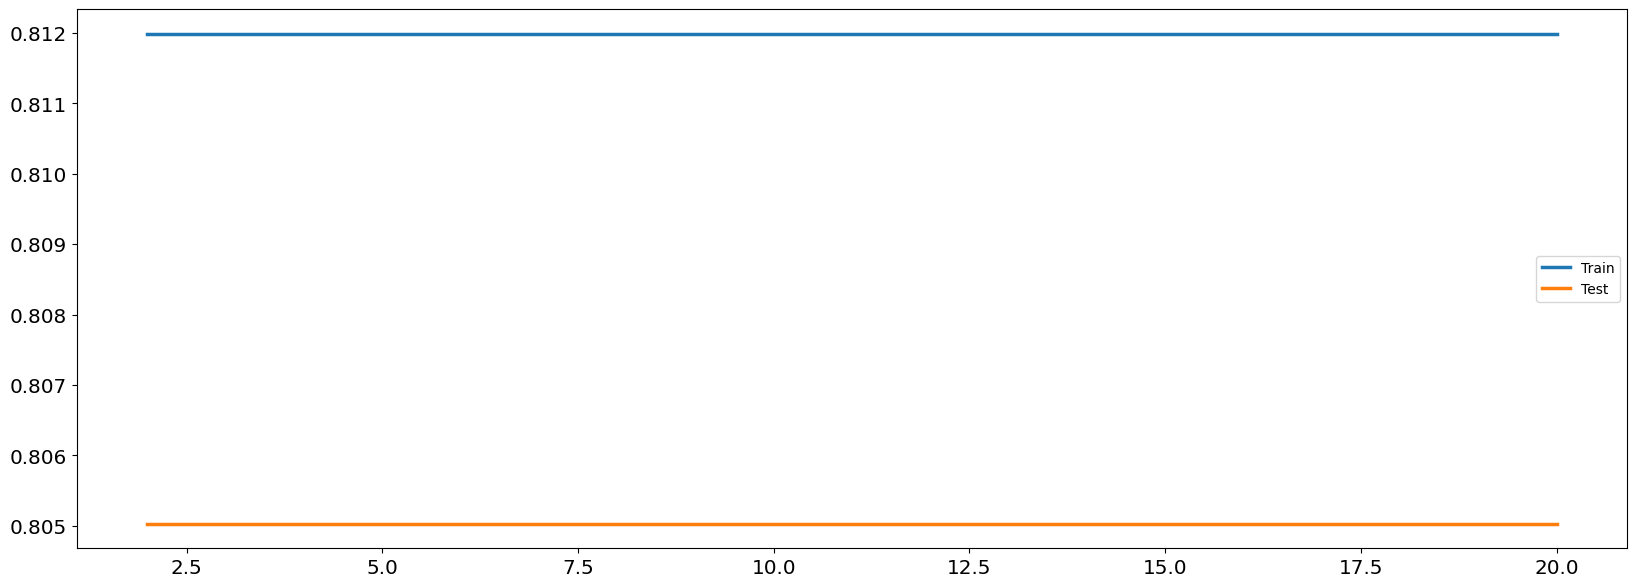

In [186]:
# min_sample_split
param_values = [int(x) for x in np.linspace(2, 20, 20)]

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=9, max_depth=2, min_samples_split=c)
    model.fit(X_train, y_train)

    # eval train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval test
    y_pred_test = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()

param value: 2; train: 0.8119908084395238; test: 0.805026656511805
param value: 2; train: 0.8119908084395238; test: 0.805026656511805
param value: 3; train: 0.8119908084395238; test: 0.805026656511805
param value: 4; train: 0.8119908084395238; test: 0.805026656511805
param value: 5; train: 0.8119908084395238; test: 0.805026656511805
param value: 6; train: 0.8119908084395238; test: 0.805026656511805
param value: 7; train: 0.8119908084395238; test: 0.805026656511805
param value: 8; train: 0.8119908084395238; test: 0.805026656511805
param value: 9; train: 0.8119908084395238; test: 0.805026656511805
param value: 10; train: 0.8119908084395238; test: 0.805026656511805
param value: 11; train: 0.8119908084395238; test: 0.805026656511805
param value: 12; train: 0.8119908084395238; test: 0.805026656511805
param value: 13; train: 0.8119908084395238; test: 0.805026656511805
param value: 14; train: 0.8119908084395238; test: 0.805026656511805
param value: 15; train: 0.8119908084395238; test: 0.80502

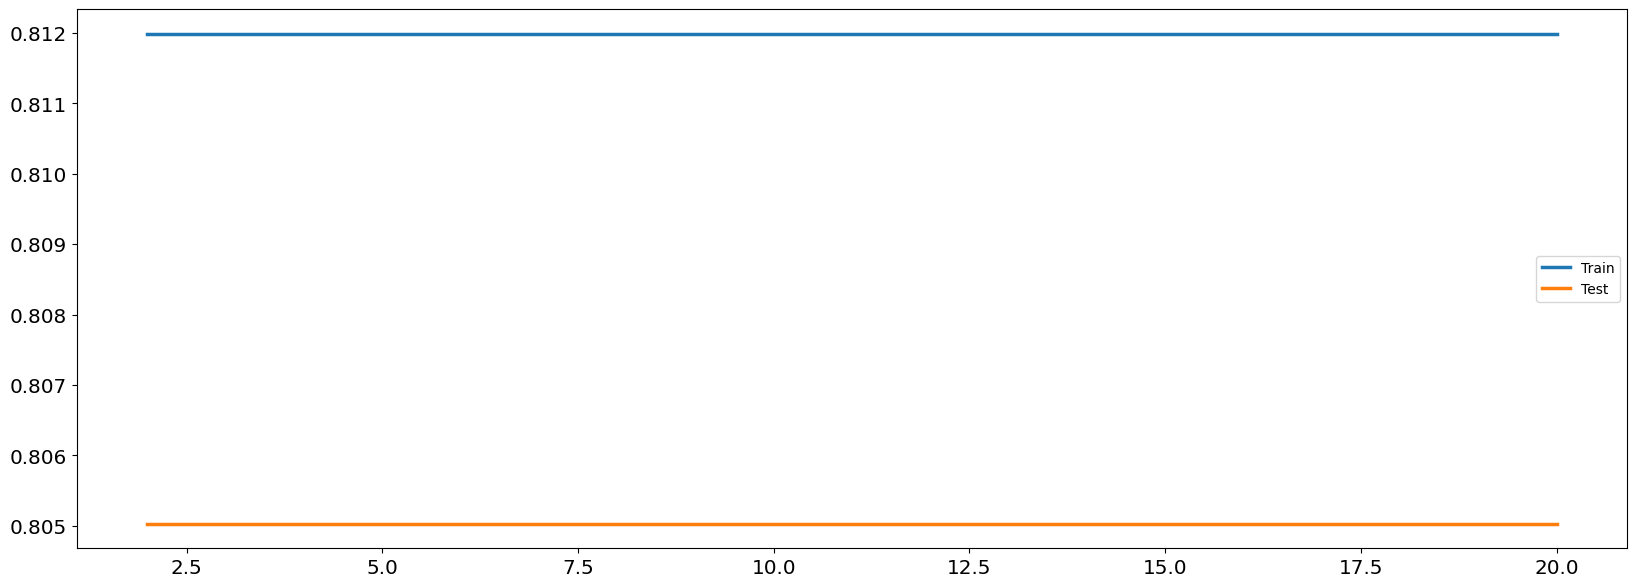

In [187]:
# min_sample_leaf
param_values = [int(x) for x in np.linspace(2, 20, 20)]

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=9, max_depth=2, min_samples_split=4, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval train
    y_pred_train = model.predict(X_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_scores.append(train_recall)

    # eval test
    y_pred_test = model.predict(X_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_scores.append(test_recall)

    print('param value: ' + str(c) + '; train: ' + str(train_recall) + '; test: ' + str(test_recall))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()

In [188]:
#last experiment n_estimators=9, max_depth=2, min_samples_split=4, min_samples_leaf=13
rf_2 = RandomForestClassifier(random_state=42, n_estimators=9, max_depth=2, min_samples_split=4, min_samples_leaf=13)

rf_2.fit(X_train, y_train)
eval_classification(rf_2)

Accuracy (Test Set): 0.65
Accuracy (Train Set): 0.65
Recall (Test Set): 0.81
Recall (Train Set): 0.81
Precision (Test Set): 0.67
Precision (Train Set): 0.67
F1-Score (Test Set): 0.73
F1-Score (Train Set): 0.73
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.75
recall (crossval train): 0.8082143228954122
recall (crossval test): 0.6148707577136701


In [189]:
class_report_train(rf_2)

              precision    recall  f1-score   support

           0       0.59      0.41      0.48      3226
           1       0.67      0.81      0.73      4787

    accuracy                           0.65      8013
   macro avg       0.63      0.61      0.61      8013
weighted avg       0.64      0.65      0.63      8013



In [190]:
class_report_test(rf_2)

              precision    recall  f1-score   support

           0       0.59      0.41      0.49       887
           1       0.67      0.81      0.73      1313

    accuracy                           0.65      2200
   macro avg       0.63      0.61      0.61      2200
weighted avg       0.64      0.65      0.63      2200



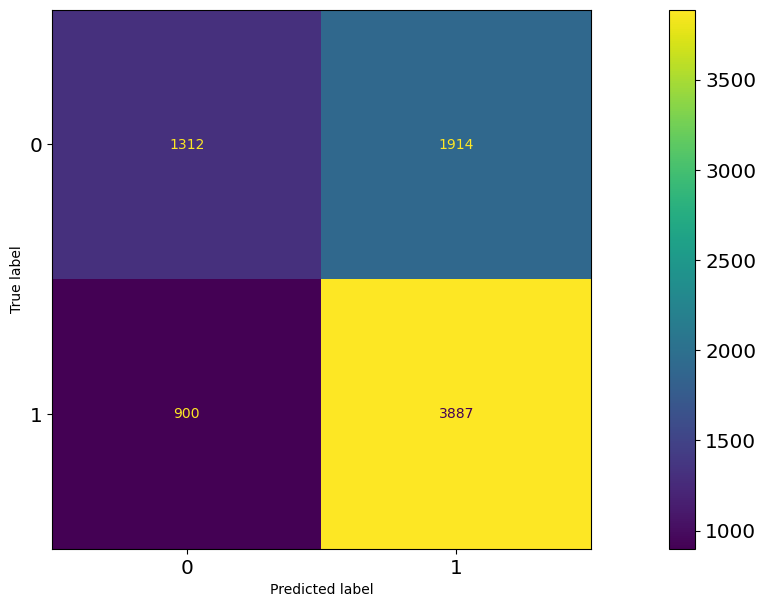

In [191]:
cm5_rf = confusion_matrix(y_train, rf_2.predict(X_train), labels=rf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5_rf, display_labels=rf_2.classes_)

disp.plot()

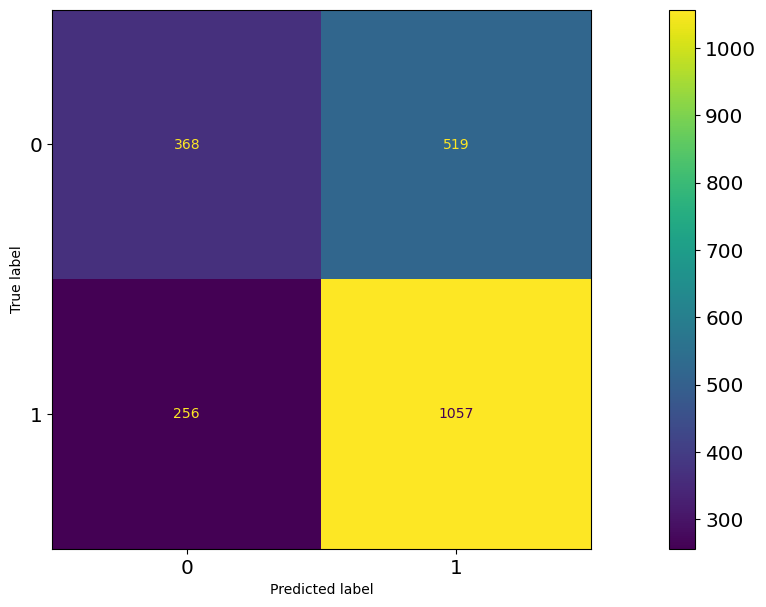

In [192]:
cm6_rf = confusion_matrix(y_test, rf_2.predict(X_test), labels=rf_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6_rf, display_labels=rf_2.classes_)

disp.plot()

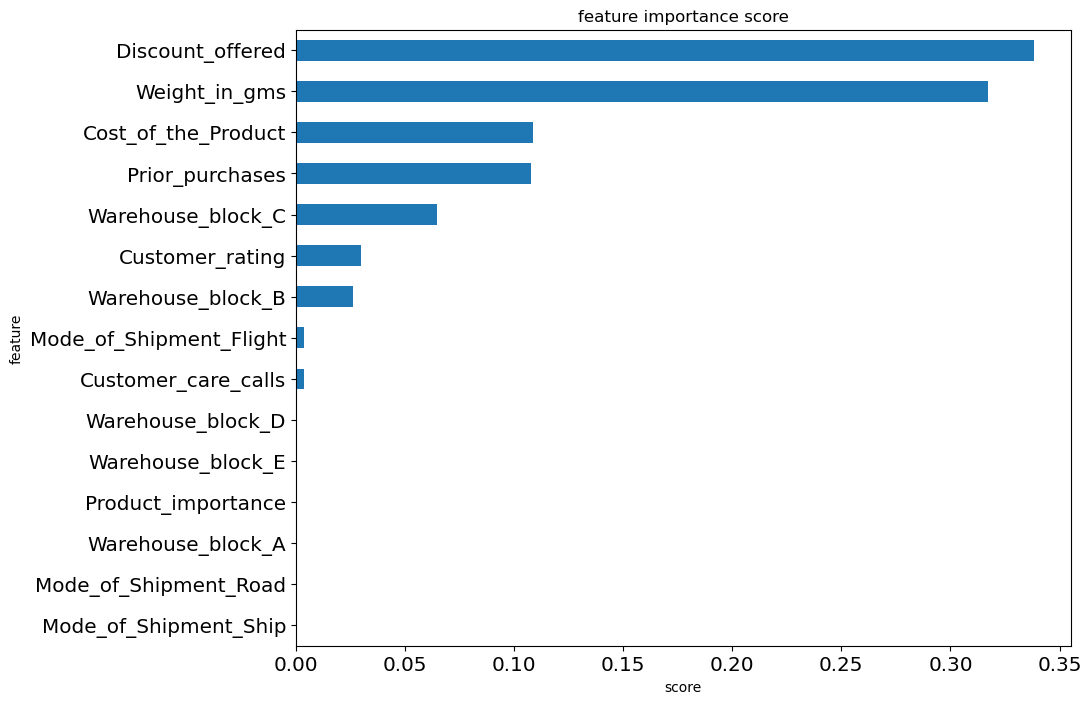

In [193]:
show_feature_importance(rf_2)

## Shap Value for Best Model

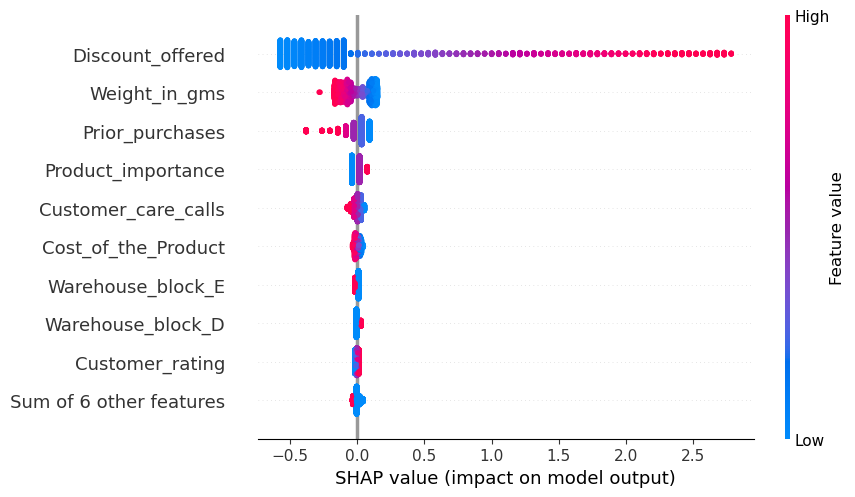

In [194]:
import shap
#model1 : rs2_logreg (data testing)
the_model = rs2_logreg.best_estimator_
explainer = shap.LinearExplainer(the_model, X_test)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values, max_display = 10)

## Lift & Gain Analysis

In [195]:
#Getting the prediction probability of class 1 and order it by descending order
X_test['Prob']  = logreg2.predict_proba(X_test)[:,1]
X_test = X_test.sort_values(by = 'Prob', ascending = False)
X_test['Late'] = y_test

In [196]:
#Divide the data into decile
X_test['Decile'] = pd.qcut(X_test['Prob'], 10, 
                           labels=[i for i in range (10, 0, -1)])

In [197]:
#Calculate the actual late in each decile
res = pd.crosstab(X_test['Decile'], 
                  X_test['Late'])[1].reset_index().rename(columns = {1: 'Number of Responses'})
lg = X_test['Decile'].value_counts(sort = False).reset_index().rename(columns = {'Decile': 'Number of Cases', 'index': 'Decile'})
lg = pd.merge(lg, res, on = 'Decile').sort_values(by = 'Decile', ascending = False).reset_index(drop = True)

In [198]:
#Calculate the cumulative
lg['Cumulative Responses'] = lg['Number of Responses'].cumsum()
#Calculate the percentage of positive in each decile compared to the total nu
lg['% of Events'] = np.round(((lg['Number of Responses']/lg['Number of Responses'].sum())*100),2)
#Calculate the Gain in each decile
lg['Gain'] = lg['% of Events'].cumsum()

In [199]:
lg['Decile'] = lg['Decile'].astype('int')
lg['lift'] = np.round((lg['Gain']/(lg['Decile']*10)),2)

In [200]:
lg

Decile  Number of Cases  Number of Responses  Cumulative Responses  \
0       1              220                  220                   220   
1       2              220                  220                   440   
2       3              220                  166                   606   
3       4              220                  101                   707   
4       5              220                  103                   810   
5       6              220                   99                   909   
6       7              220                   91                  1000   
7       8              220                  110                  1110   
8       9              220                   99                  1209   
9      10              220                  104                  1313   

   % of Events    Gain  lift  
0        16.76   16.76  1.68  
1        16.76   33.52  1.68  
2        12.64   46.16  1.54  
3         7.69   53.85  1.35  
4         7.84   61.69  1.23  
5         7.54   69.23  1.15  
6         6.93   76.16  1.09  
7         8.38   84.54  1.06  
8         7.54   92.08  1.02  
9         7.92  100.00  1.00

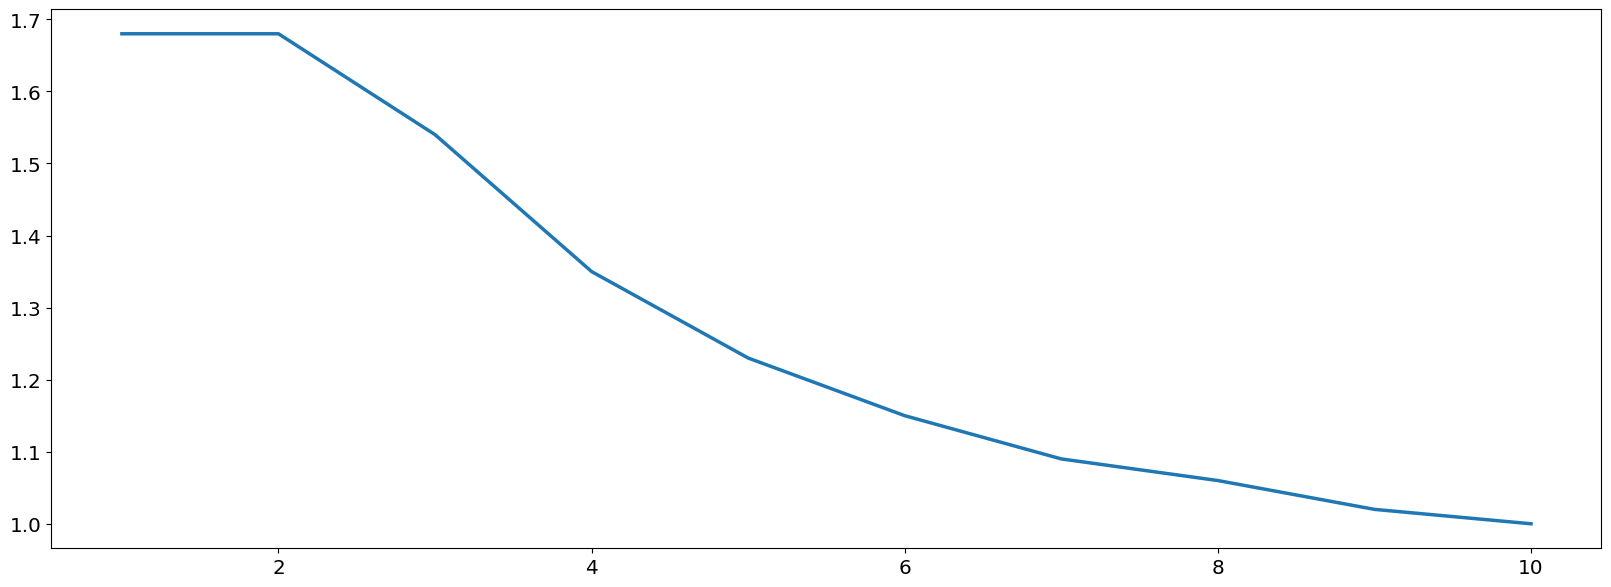

In [201]:
plt.plot(lg['Decile'], lg['lift'])
plt.show()

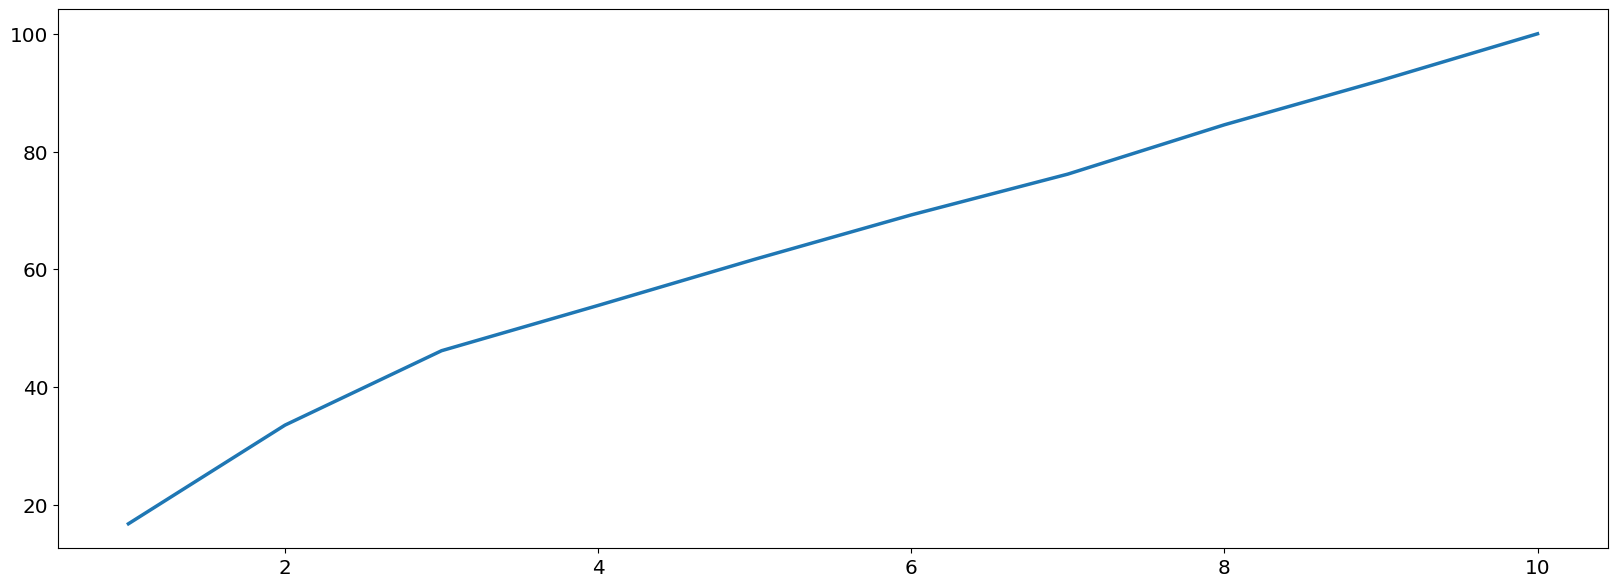

In [202]:
plt.plot(lg['Decile'], lg['Gain'])
plt.show()

### Business Simulation

In [203]:
dft = df.copy()

In [204]:
#On Time Rate Growth Calculation 
Total = dft['ID'].count()
Late =  dft[dft['Reached.on.Time_Y.N']==1]['ID'].count()
OnTime =  dft[dft['Reached.on.Time_Y.N']==0]['ID'].count()
PredRate = 0.91
PredLate = round(Late*PredRate)
PredOnTime = Late-PredLate

print('----- Existing -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print()
print('----- After Modeling -----')
print('\t\t\t','count', 'percentage')
print('Delivery : \t\t', Total)
print('Late : \t\t\t', Late, ',', round(Late/Total*100,1),'%')
print('  Predicted Late : \t', round(PredLate), ',', round(PredLate/Late*100,1),'%')
print('  Predicted On Time : \t', round(PredOnTime), ',', round(PredOnTime/Late*100,1),'%')
print('Late After Pred : \t', Late-PredLate, ',', round((Late-PredLate)/Total*100,1),'%')
print('On Time : \t\t', OnTime, ',', round(OnTime/Total*100,1),'%')
print('On Time After Pred : \t', OnTime+PredLate, ',', round((OnTime+PredLate)/Total*100,1),'%')
print('On Time Growth rate : \t', round(((((OnTime+PredLate))-OnTime)/((OnTime + PredLate)))*100,1), '%')

----- Existing -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
On Time : 		 4436 , 40.3 %

----- After Modeling -----
			 count percentage
Delivery : 		 10999
Late : 			 6563 , 59.7 %
  Predicted Late : 	 5972 , 91.0 %
  Predicted On Time : 	 591 , 9.0 %
Late After Pred : 	 591 , 5.4 %
On Time : 		 4436 , 40.3 %
On Time After Pred : 	 10408 , 94.6 %
On Time Growth rate : 	 57.4 %


In [205]:
dft['Price Discount'] = (dft['Discount_offered'] / 100) * dft['Cost_of_the_Product']

In [206]:
dft.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Price Discount  
0                44           1233                    1           77.88  
1                59           3088                    1          127.44  
2                48           3374                    1           87.84  
3                10           1177                    1           17.60  
4                46           2484                    1           84.64

In [207]:
#Potential Revenue Loss Saved Calculation
TotalIncome = dft['Cost_of_the_Product'].sum()
TotalDiscount = dft['Price Discount'].sum()
TotalRevenue = TotalIncome - TotalDiscount
AvgRevenue = round(TotalRevenue / Total, 2)

print('Total Income : \t\t$', '{:,}'.format(TotalIncome)) #dikasi margin (turun)
print('Total Discount : \t$', '{:,}'.format(TotalDiscount))
print('Total Revenue : \t$', '{:,}'.format(TotalRevenue))
print('Average Revenue : \t$', '{:,}'.format(AvgRevenue))
print()
print('Potential Revenue')
print('Late : \t\t\t$', '{:,.2f}'.format(AvgRevenue * Late))
print('Predicted Late : \t$', '{:,.2f}'.format(AvgRevenue * PredLate))

Total Income : 		$ 2,311,955
Total Discount : 	$ 297,334.61999999994
Total Revenue : 	$ 2,014,620.3800000001
Average Revenue : 	$ 183.16

Potential Revenue
Late : 			$ 1,202,079.08
Predicted Late : 	$ 1,093,831.52


In [208]:
# Filtering customers late & give 5 rating
dft[(dft['Reached.on.Time_Y.N']==1) & (dft['Customer_rating']==1)]

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
5          6               F           Flight                    3   
7          8               F           Flight                    4   
21        22               B             Ship                    3   
25        26               F             Ship                    3   
26        27               A             Ship                    4   
...      ...             ...              ...                  ...   
10972  10973               C           Flight                    4   
10982  10983               A             Ship                    5   
10984  10985               C             Ship                    5   
10985  10986               F             Ship                    5   
10994  10995               A             Ship                    4   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
5                    1                  162                3   
7                    1                  233                2   
21                   1                  232                4   
25                   1                  225                4   
26                   1                  172                3   
...                ...                  ...              ...   
10972                1                  249                5   
10982                1                  275                5   
10984                1                  257                5   
10985                1                  229                5   
10994                1                  252                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
5                 medium      F                12           1417   
7                    low      F                48           2804   
21                medium      F                51           2899   
25                   low      M                29           3496   
26                  high      F                24           1066   
...                  ...    ...               ...            ...   
10972                low      F                10           1762   
10982                low      M                 7           1623   
10984             medium      M                 1           1102   
10985                low      F                10           1040   
10994             medium      F                 1           1538   

       Reached.on.Time_Y.N  Price Discount  
5                        1           19.44  
7                        1          111.84  
21                       1          118.32  
25                       1           65.25  
26                       1           41.28  
...                    ...             ...  
10972                    1           24.90  
10982                    1           19.25  
10984                    1            2.57  
10985                    1           22.90  
10994                    1            2.52  

[1313 rows x 13 columns]

In [209]:
#20% from late customer give 5 rating
late5percent=(1313/6563)*100
late5percent

20.006094773731526

In [210]:
#Rating Growth Calculation 
TotalRating = dft['Customer_rating'].sum()
AvgRating = round(TotalRating / Total, 2)
print('Total Rating : \t\t\t', '{:,}'.format(TotalRating))
print('Average Rating : \t\t', AvgRating)
print()
print('Predicted Late Rating : \t', '{:,}'.format(TotalRating), '+' , '{:,}'.format(PredLate-round(PredLate*0.2)), '=', '{:,}'.format(TotalRating + PredLate-round(PredLate*0.2)) )
print('Predicted Late Estimated Rating goes up by 1 (except Rating = 5)')
print()
print('Avg Rating after Prediction : \t', round(((TotalRating + PredLate-round(PredLate*0.2))/Total), 2))
print('Rating Growth rate : \t\t', round((((TotalRating + PredLate-round(PredLate*0.2))/Total)/((TotalRating)/Total)-1)*100,1), '%')

Total Rating : 			 32,893
Average Rating : 		 2.99

Predicted Late Rating : 	 32,893 + 4,778 = 37,671
Predicted Late Estimated Rating goes up by 1 (except Rating = 5)

Avg Rating after Prediction : 	 3.42
Rating Growth rate : 		 14.5 %
